<a href="https://colab.research.google.com/github/Aamiruem/-project3/blob/main/COMPLETE_Final_Project_Optimizing_Agricultural_Production.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predict Optimizing Agriculture Production

### Importing the Libraries

In [68]:
# for manipulations
import numpy as np
import pandas as pd

# for data visualizations
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

# for interactivity
import ipywidgets
from ipywidgets import interact

In [69]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Reading the Dataset

In [70]:
# lets read the dataset
data = pd.read_csv('/content/Crop_recommendation.csv')

# lets check teh shape of the dataset
print("Shape of the Dataset :", data.shape)

Shape of the Dataset : (2200, 8)


In [71]:
data = pd.read_csv("/content/Crop_recommendation (2).csv")

In [72]:
data = pd.read_csv("/content/data.csv")

In [73]:
# lets check the head of the dataset
data.head()

N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice

#### Description for each of the columns in the Dataset

- N - ratio of Nitrogen content in soil
- P - ratio of Phosphorous content in soil
- K - ration of Potassium content in soil
- temperature - temperature in degree Celsius
- humidity - relative humidity in %
- ph - ph value of the soil
- rainfall - rainfall in mm

In [74]:
# lets check if there is any missing value present in the dataset
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [75]:
# lets check the Crops present in this Dataset
data['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

In [76]:
data.describe()

N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.971693    64.551686  
50%       6.425045    94.867624  
75%       6.923643   124.267508  
max       9.935091   298.560117

In [77]:
data = pd.read_csv("/content/data.csv")

In [78]:
data.head()

N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice

In [79]:
data.head()

N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice

In [80]:
data.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [81]:
# Print the column names of the data frame
print(data.columns)

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')


In [82]:
# Check if the column name is spelled correctly
if "rice" not in data.columns:
    print("The column name 'rice' does not exist in the data frame.")

The column name 'rice' does not exist in the data frame.


In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [84]:
data.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [85]:
# data["rice"] = pd.to_numeric(data["ricee"], errors="coerce")

In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [87]:
data.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [88]:
@interact
def summary(crops = list(data['label'].value_counts().index)):
    x = data[data['label']== crops]
    z = data.drop(['label'],axis=1)
    y = []
    y.append(z)
    for i in z:
        print('Minimum', i, 'required', x[i].min())
        print('Average', i, 'required', x[i].mean())
        print('Maximum', i, 'required', x[i].max())
        print('--------------------------------------------------')

interactive(children=(Dropdown(description='crops', options=('rice', 'maize', 'jute', 'cotton', 'coconut', 'pa…

In [89]:
# data.skew()

In [90]:
print('Summer Crops:', data[(data['temperature']>30) & (data['humidity']>50)]['label'].unique())
print('Winter Crops:', data[(data['temperature']<20) & (data['humidity']>30)]['label'].unique())
print('Rainy Crops:', data[(data['rainfall']>200) & (data['humidity']>30)]['label'].unique())


Summer Crops: ['pigeonpeas' 'mothbeans' 'blackgram' 'mango' 'grapes' 'orange' 'papaya']
Winter Crops: ['maize' 'pigeonpeas' 'lentil' 'pomegranate' 'grapes' 'orange']
Rainy Crops: ['rice' 'papaya' 'coconut']


In [91]:
z = data.drop(['label'],axis=1)
z = data.loc[:,z.columns].values
x_data = pd.DataFrame(z)
x_data.head()

0     1     2          3          4         5           6
0  90.0  42.0  43.0  20.879744  82.002744  6.502985  202.935536
1  85.0  58.0  41.0  21.770462  80.319644  7.038096  226.655537
2  60.0  55.0  44.0  23.004459  82.320763  7.840207  263.964248
3  74.0  35.0  40.0  26.491096  80.158363  6.980401  242.864034
4  78.0  42.0  42.0  20.130175  81.604873  7.628473  262.717340

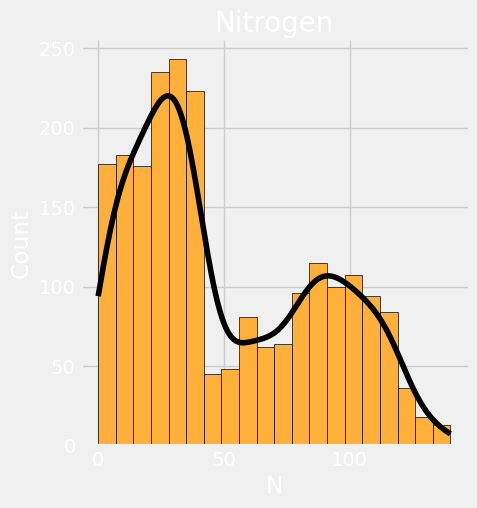

In [92]:
sns.displot(x=data['N'], bins=20,kde=True,edgecolor="black",color='black',facecolor='#ffb03b')
plt.title("Nitrogen",size=20)
plt.show()

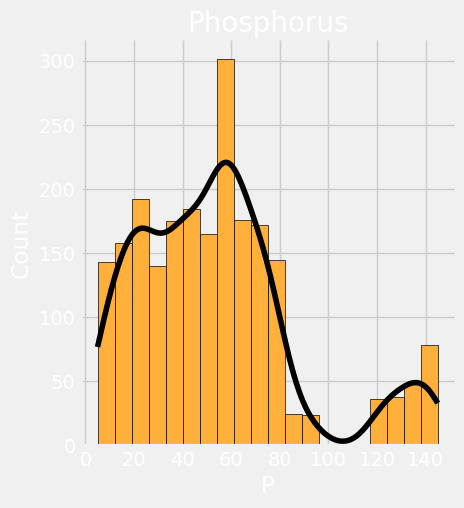

In [93]:
sns.displot(x=data['P'],bins=20,color='black',edgecolor='black',kde=True,facecolor='#ffb03b')
plt.title("Phosphorus", size=20)
plt.xticks(range(0,150,20))
plt.show()

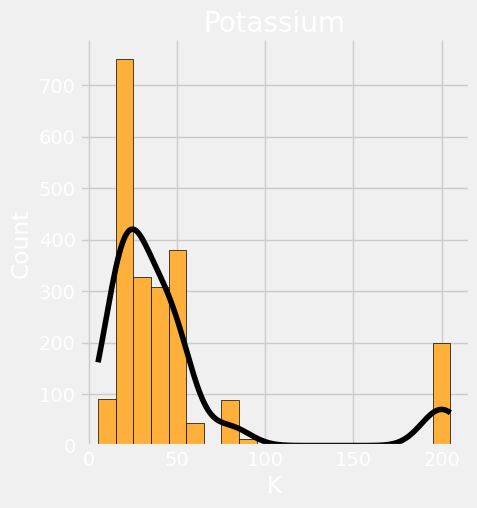

In [94]:
sns.displot(x=data['K'],kde=True, bins=20, facecolor='#ffb03b',edgecolor='black', color='black')
plt.title("Potassium",size=20)
plt.show()

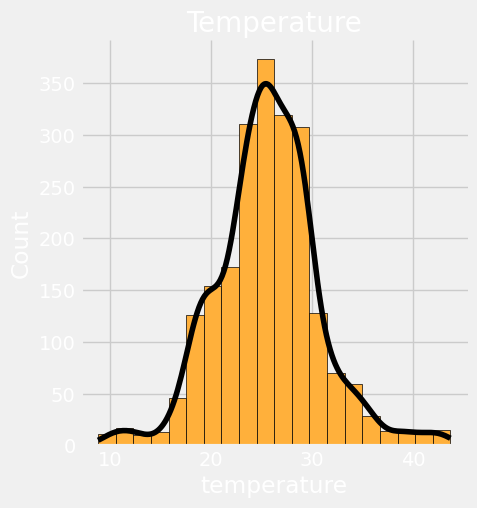

In [95]:
sns.displot(x=data['temperature'], bins=20,kde=True,edgecolor="black",color='black',facecolor='#ffb03b')
plt.title("Temperature",size=20)
plt.show()

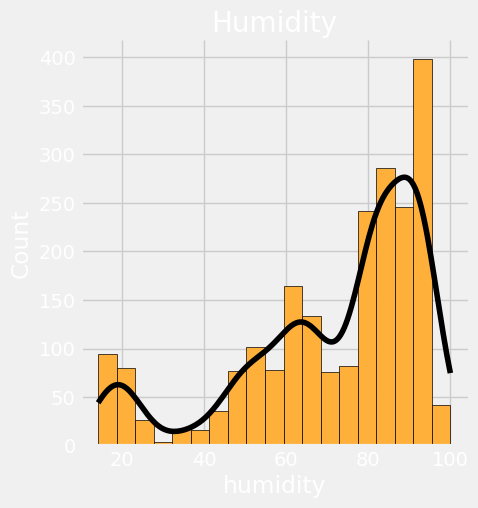

In [96]:
sns.displot(x=data['humidity'], color='black',facecolor='#ffb03b',kde=True,edgecolor='black')
plt.title("Humidity",size=20)
plt.show()

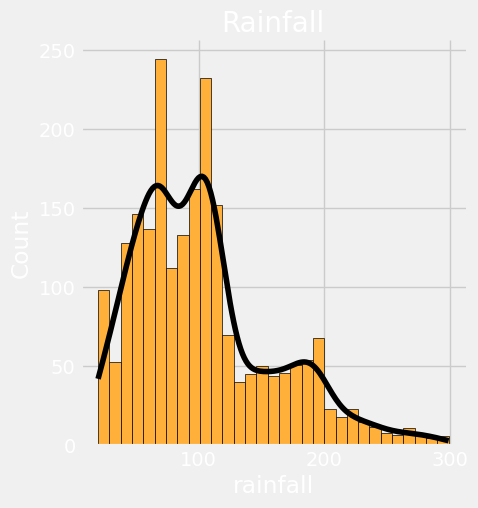

In [97]:
sns.displot(x=data['rainfall'], color='black',facecolor='#ffb03b',kde=True,edgecolor='black')
plt.title("Rainfall",size=20)
plt.show()

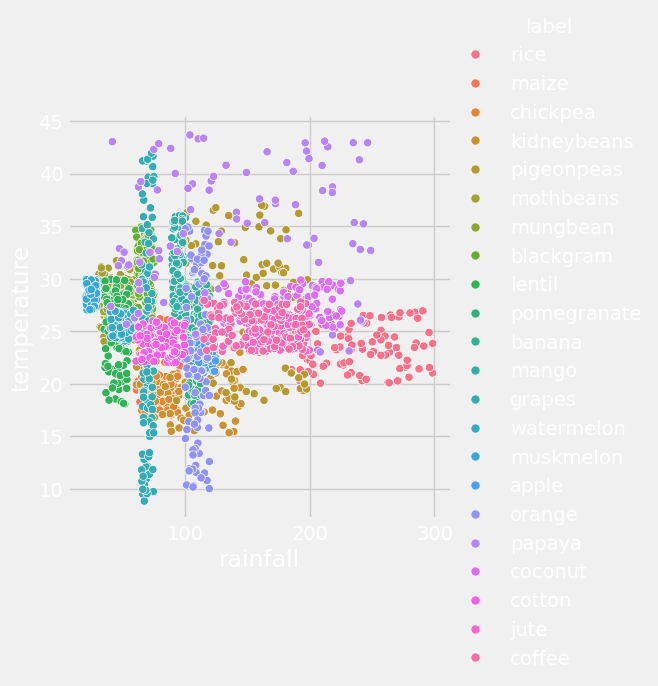

In [98]:
sns.relplot(x='rainfall',y='temperature',data=data,kind='scatter',hue='label',height=5)
plt.show()

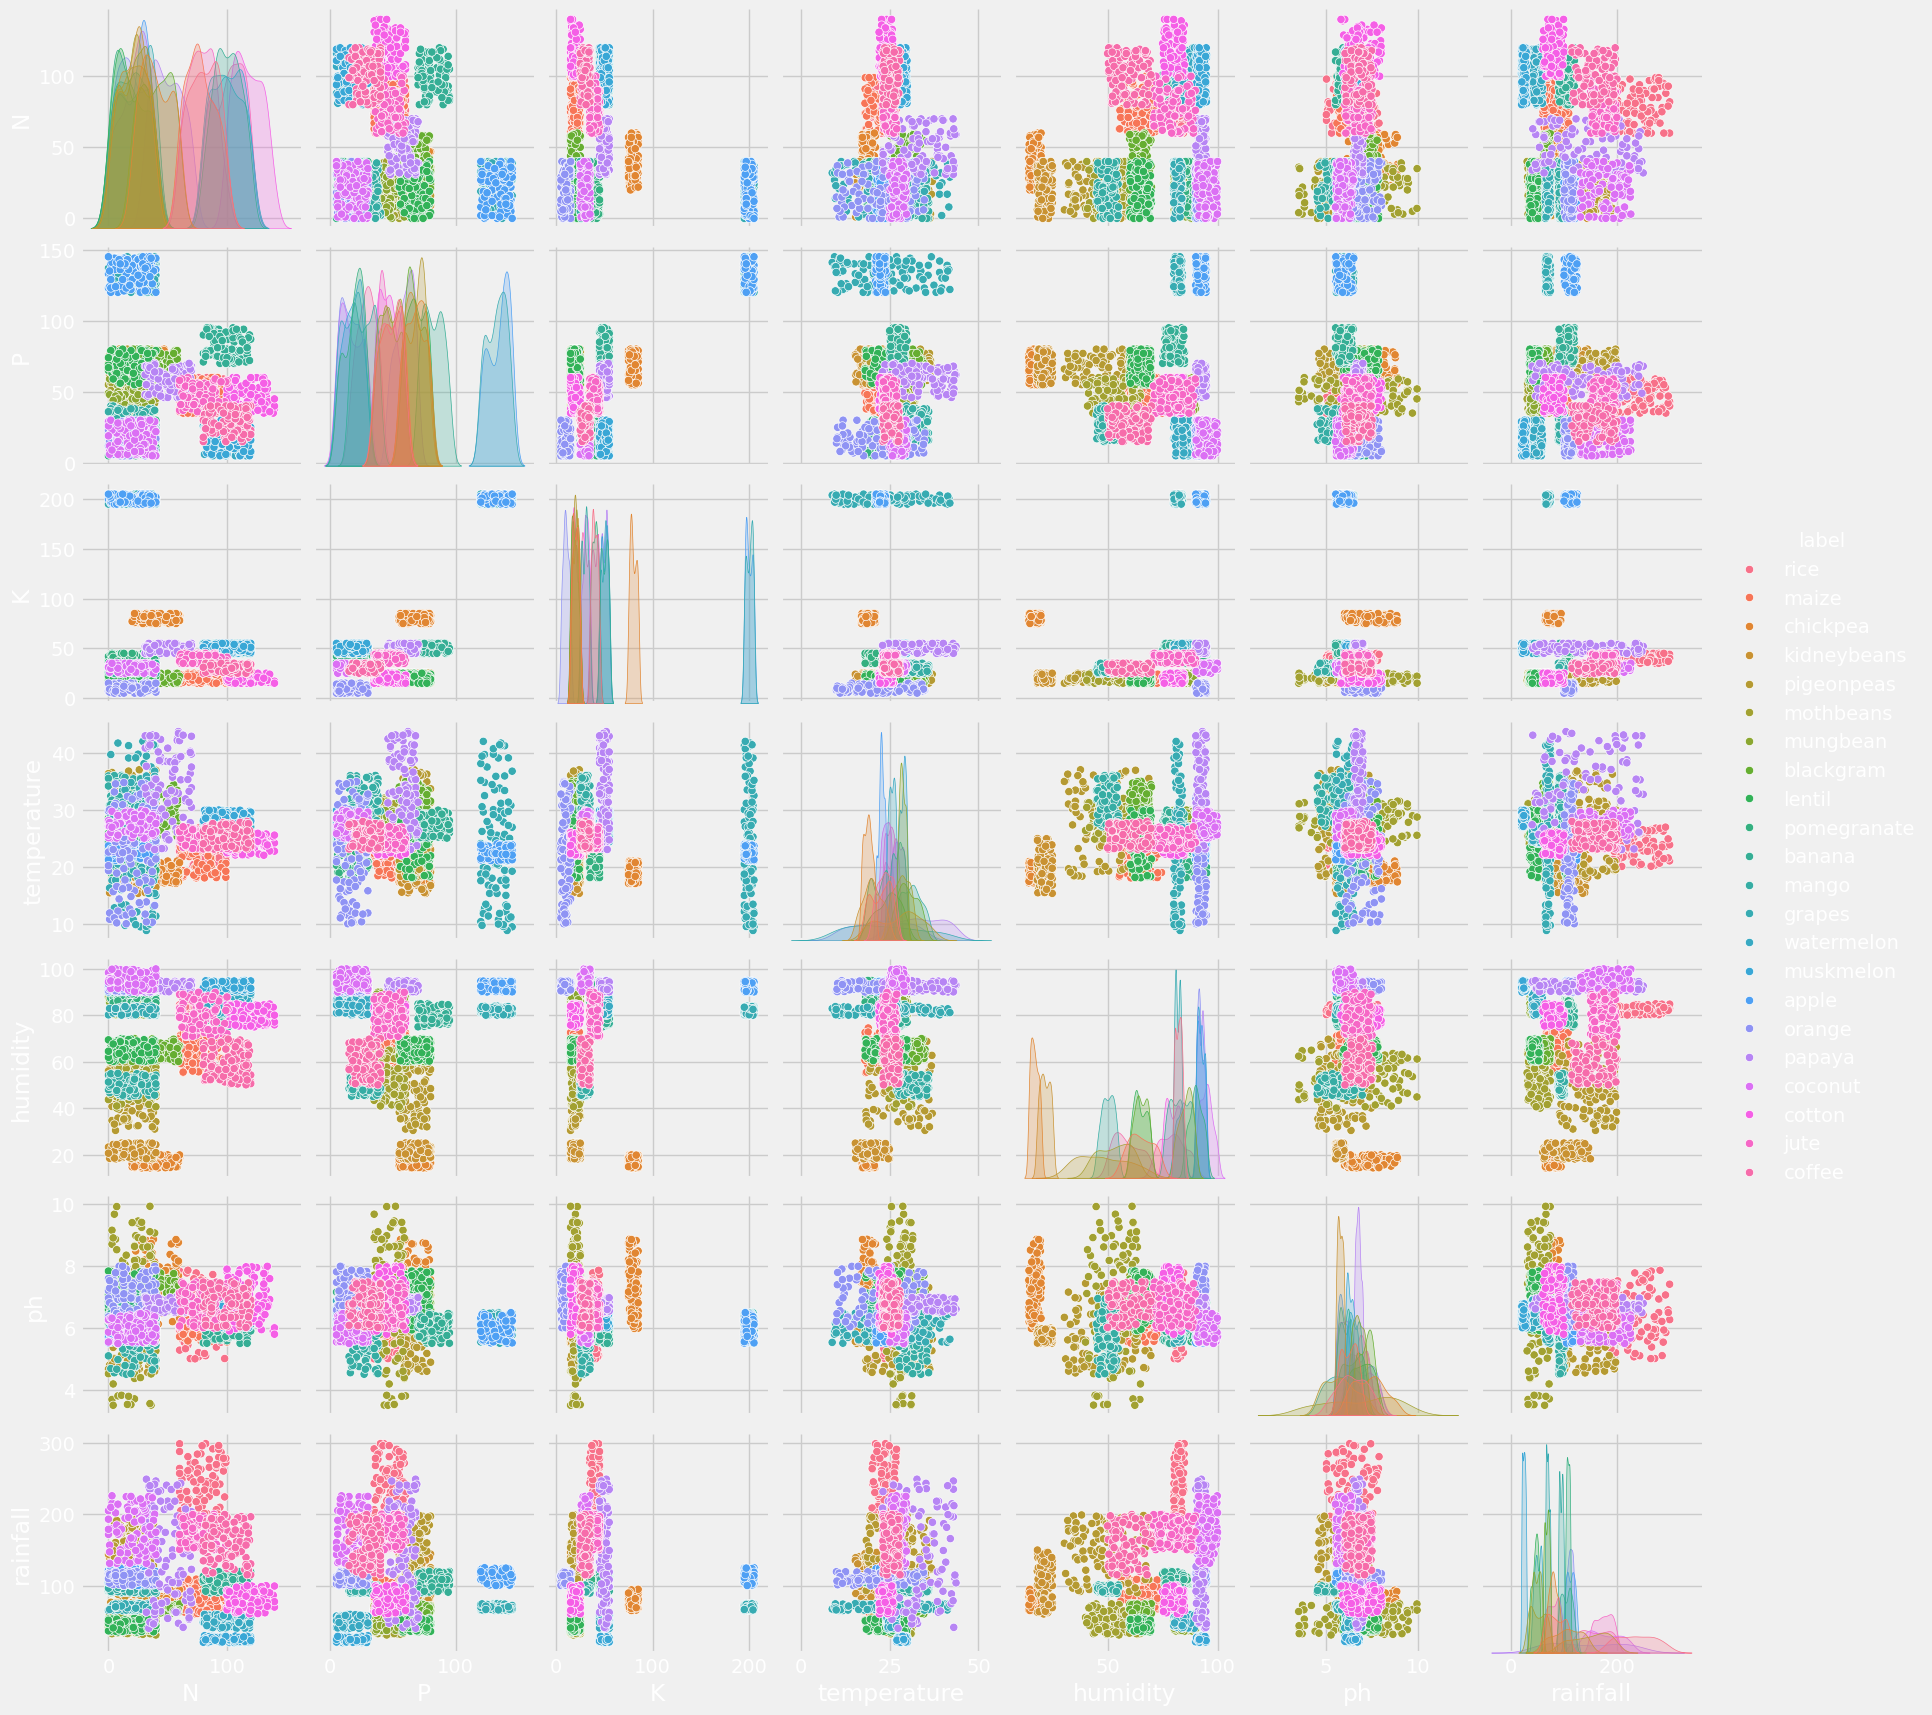

In [99]:
sns.pairplot(data=data,hue='label')
plt.show()

In [100]:
# Unique values in the label column

crops = data['label'].unique()
print(len(crops))
print(crops)
print(pd.value_counts(data['label']))

22
['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']
label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64


In [101]:
# Filtering each unique label and store it in a list df2 for to plot the box plot

df2=[]
for i in crops:
    df2.append(data[data['label'] == i])
df2[1].head()

N   P   K  temperature   humidity        ph    rainfall  label
100  71  54  16    22.613600  63.690706  5.749914   87.759539  maize
101  61  44  17    26.100184  71.574769  6.931757  102.266244  maize
102  80  43  16    23.558821  71.593514  6.657965   66.719955  maize
103  73  58  21    19.972160  57.682729  6.596061   60.651715  maize
104  61  38  20    18.478913  62.695039  5.970458   65.438354  maize

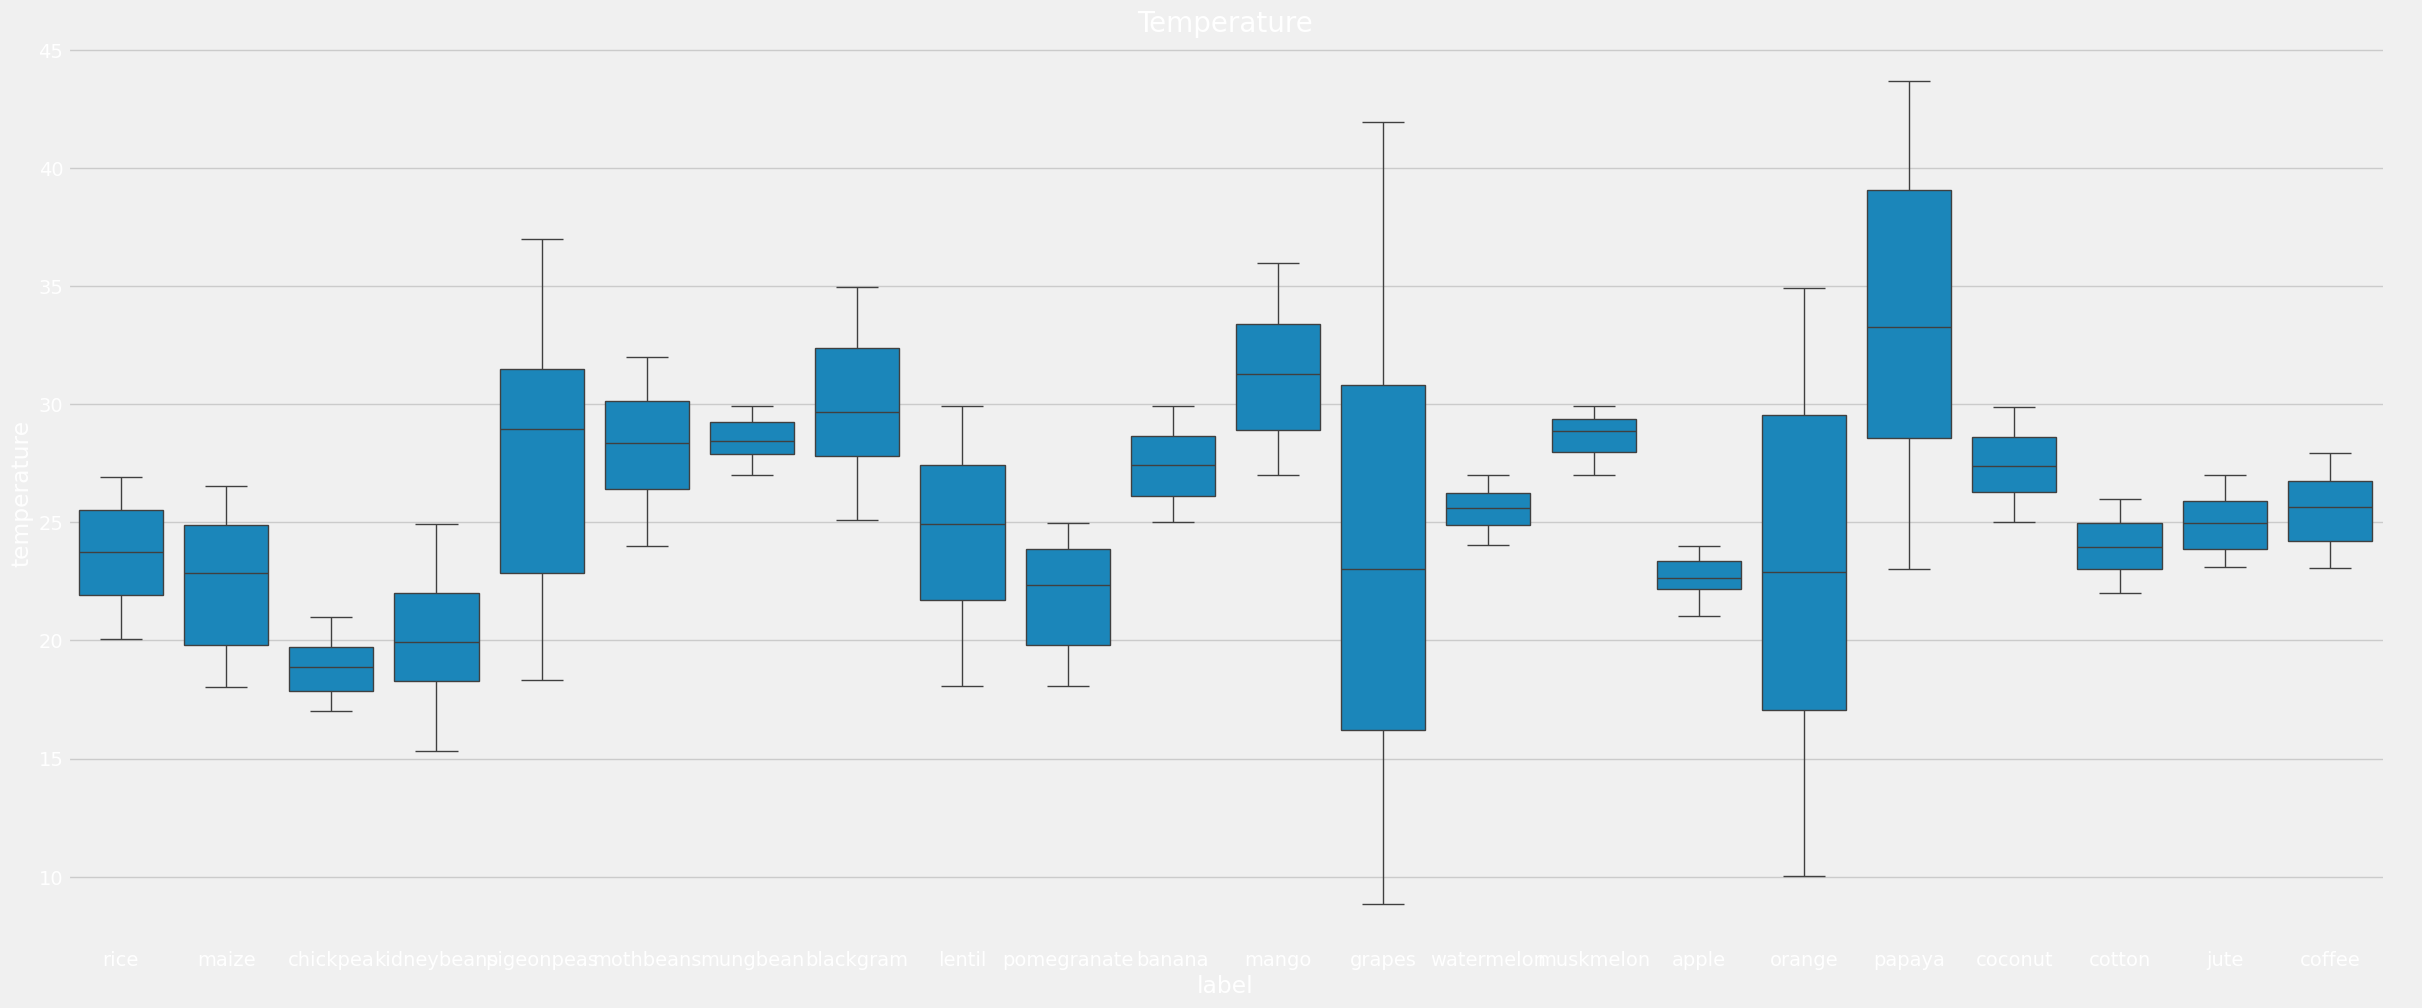

In [102]:
sns.catplot(data=data, x='label', y='temperature', kind='box', height=10, aspect=20/8.27)
# plt.xticks(rotation='vertical')
plt.title("Temperature", size=20)
plt.show()

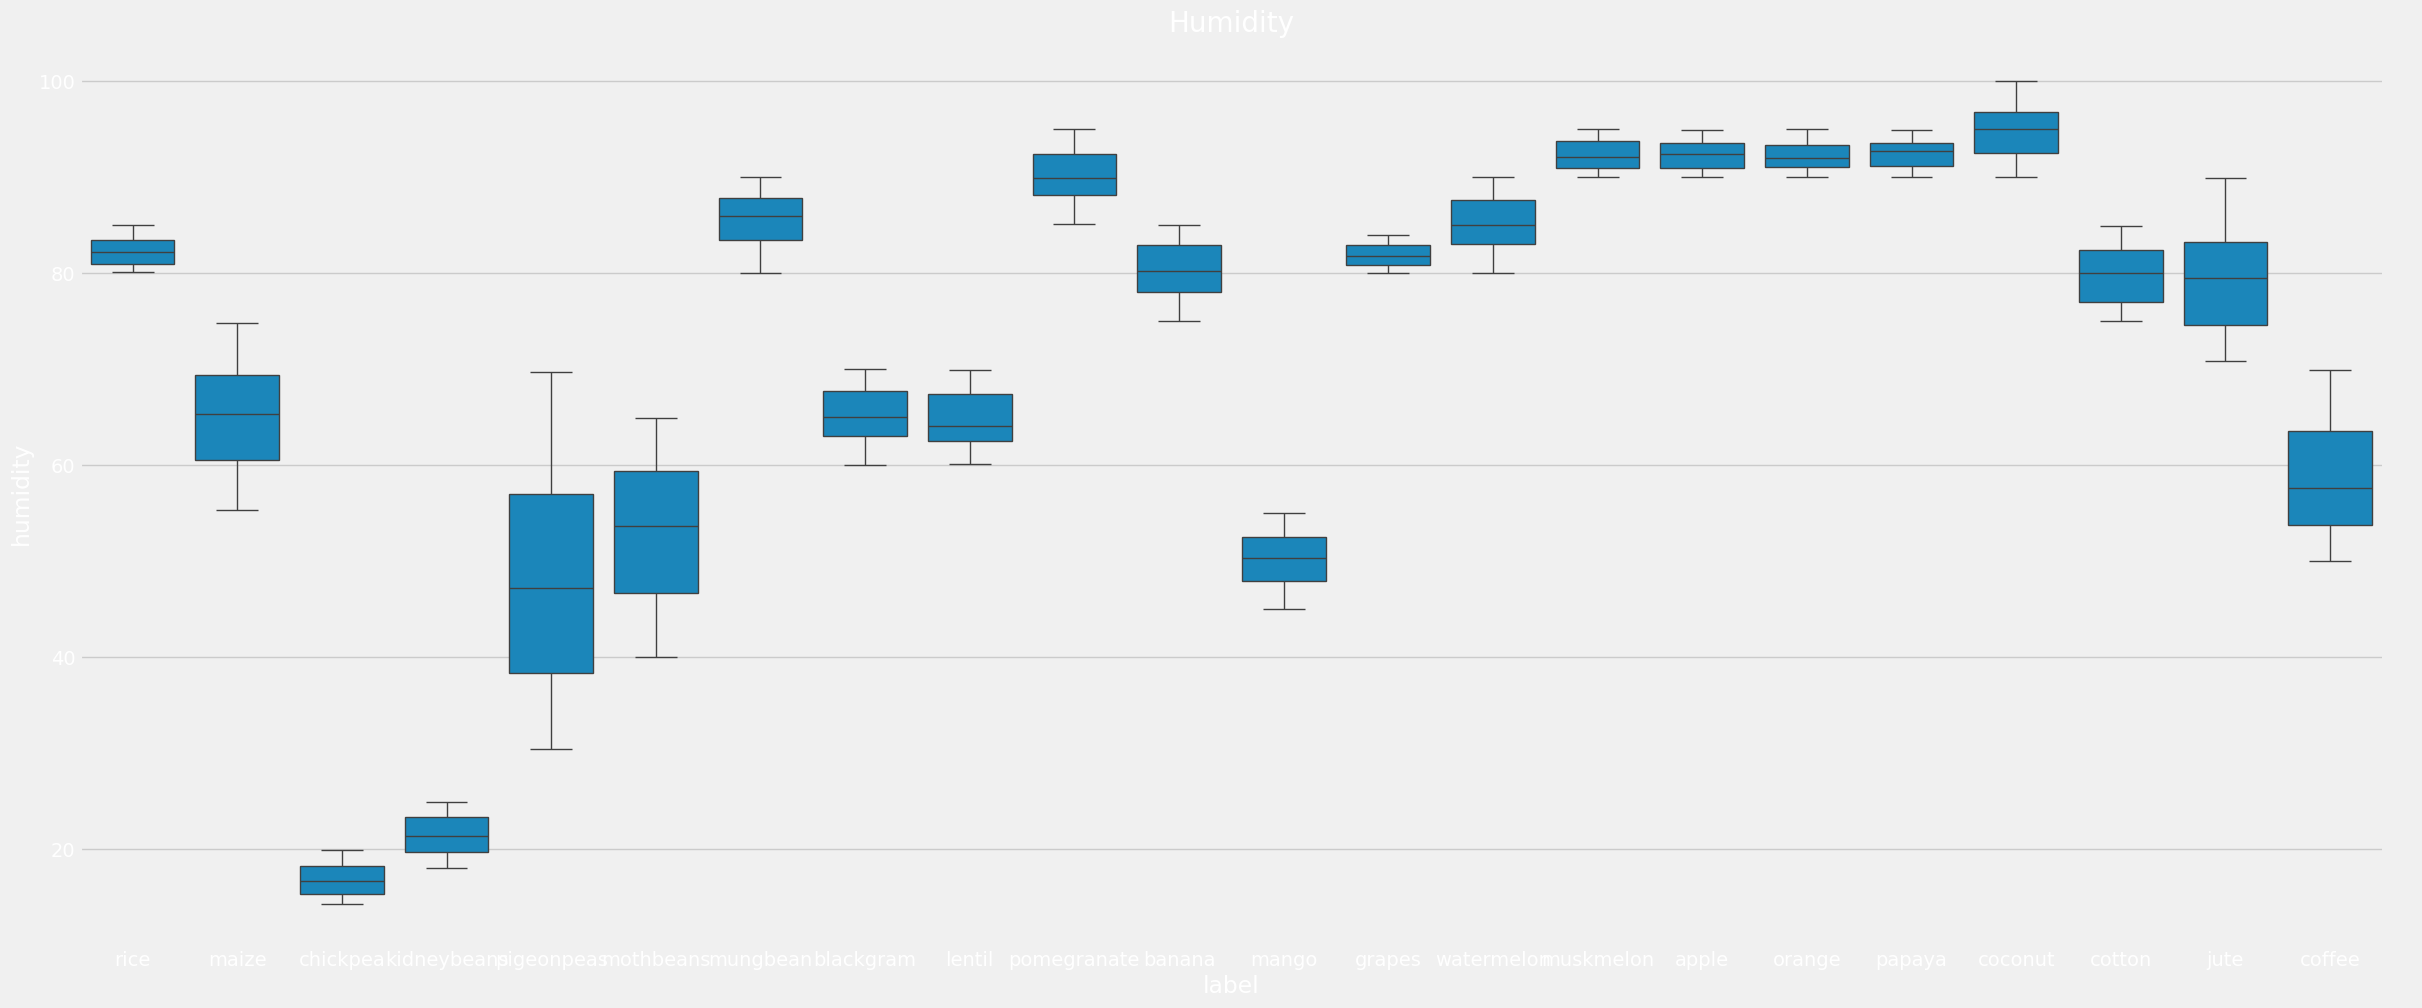

In [103]:
sns.catplot(data=data, x='label', y='humidity', kind='box', height=10, aspect=20/8.27)
# plt.xticks(rotation='vertical')
plt.title("Humidity", size=20)
plt.show()

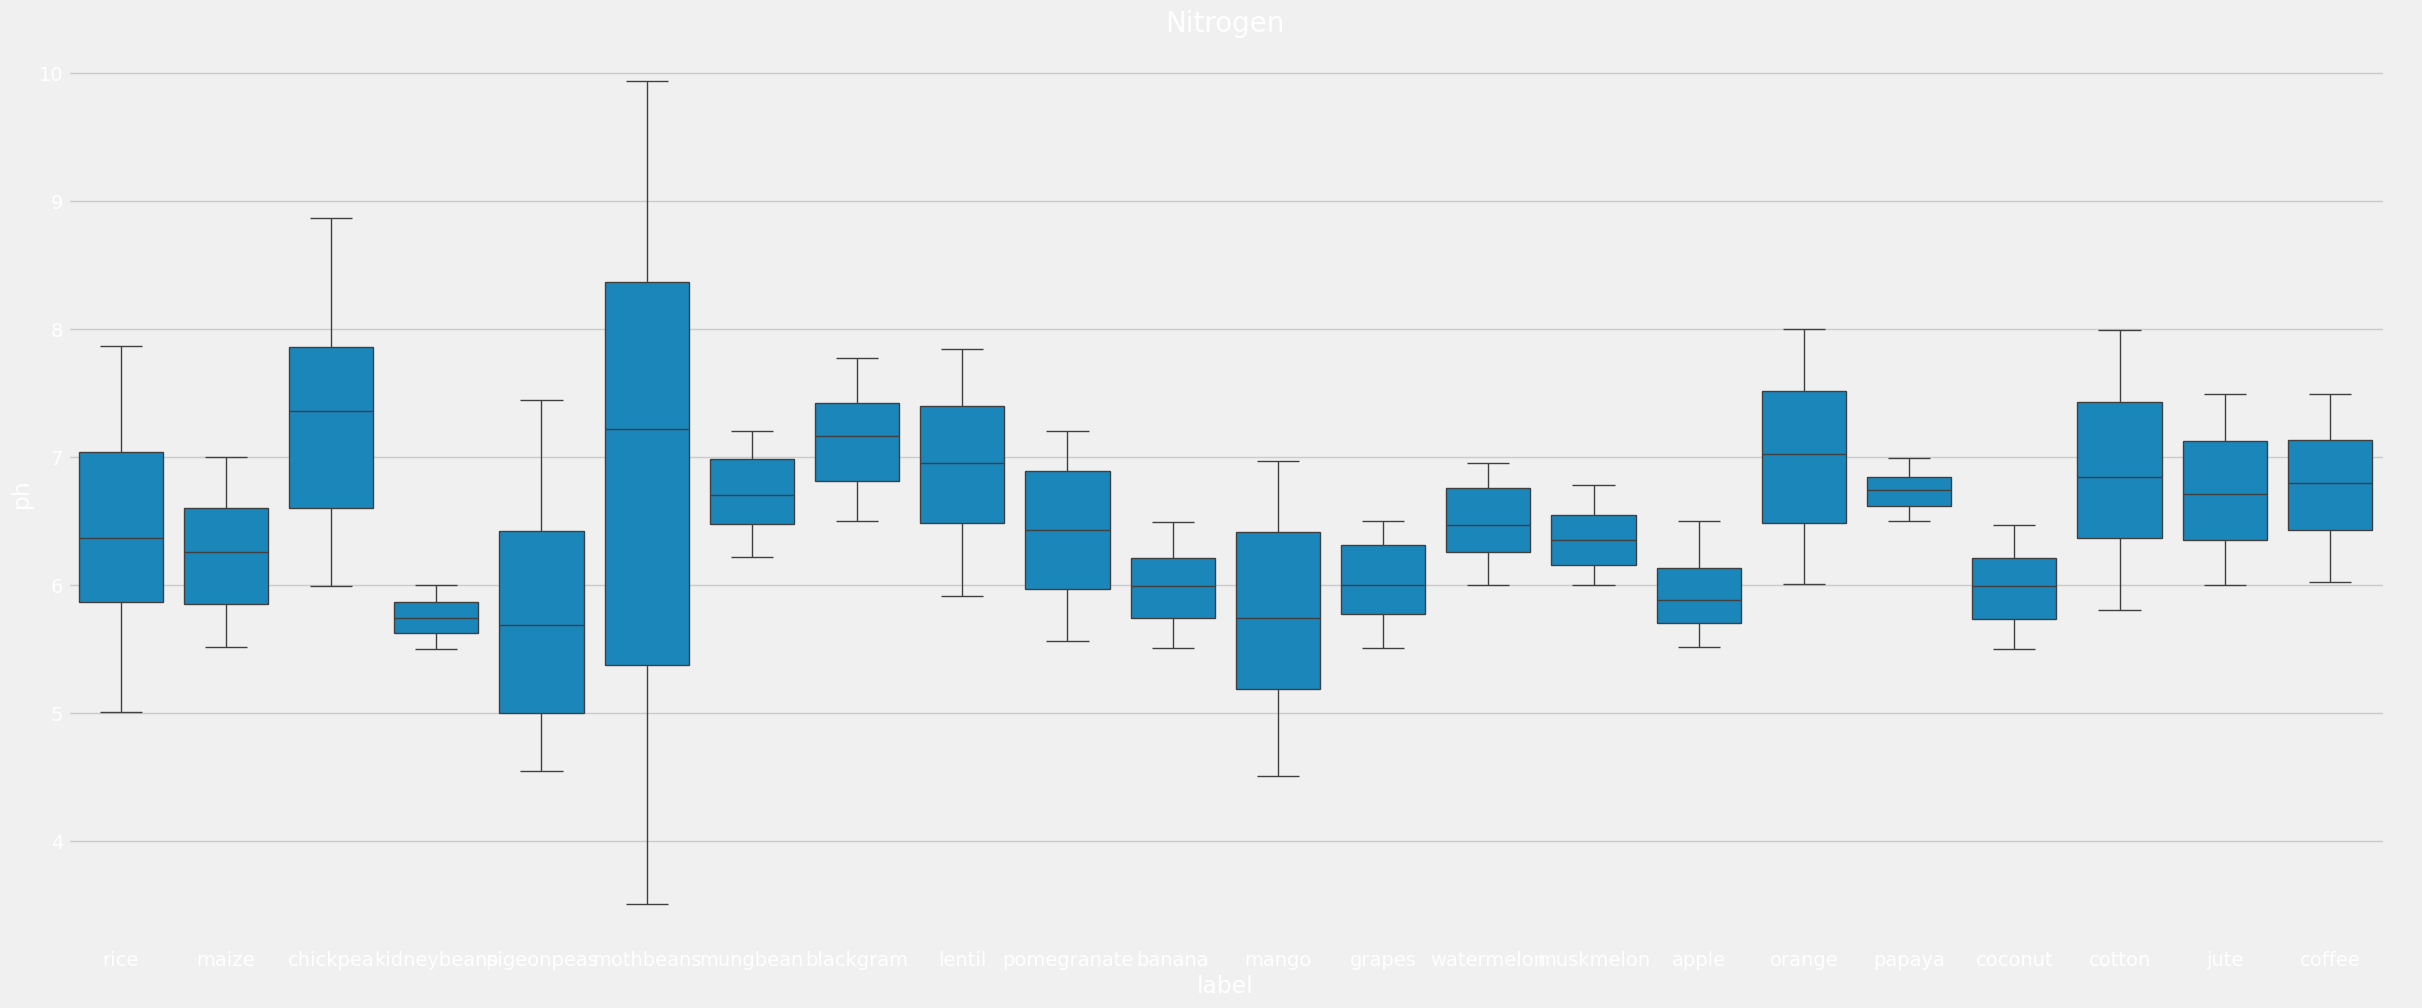

In [104]:
sns.catplot(data=data, x='label', y='ph', kind='box', height=10, aspect=20/8.27)
# plt.xticks(rotation='vertical')
plt.title("Nitrogen",size=20)
plt.show()

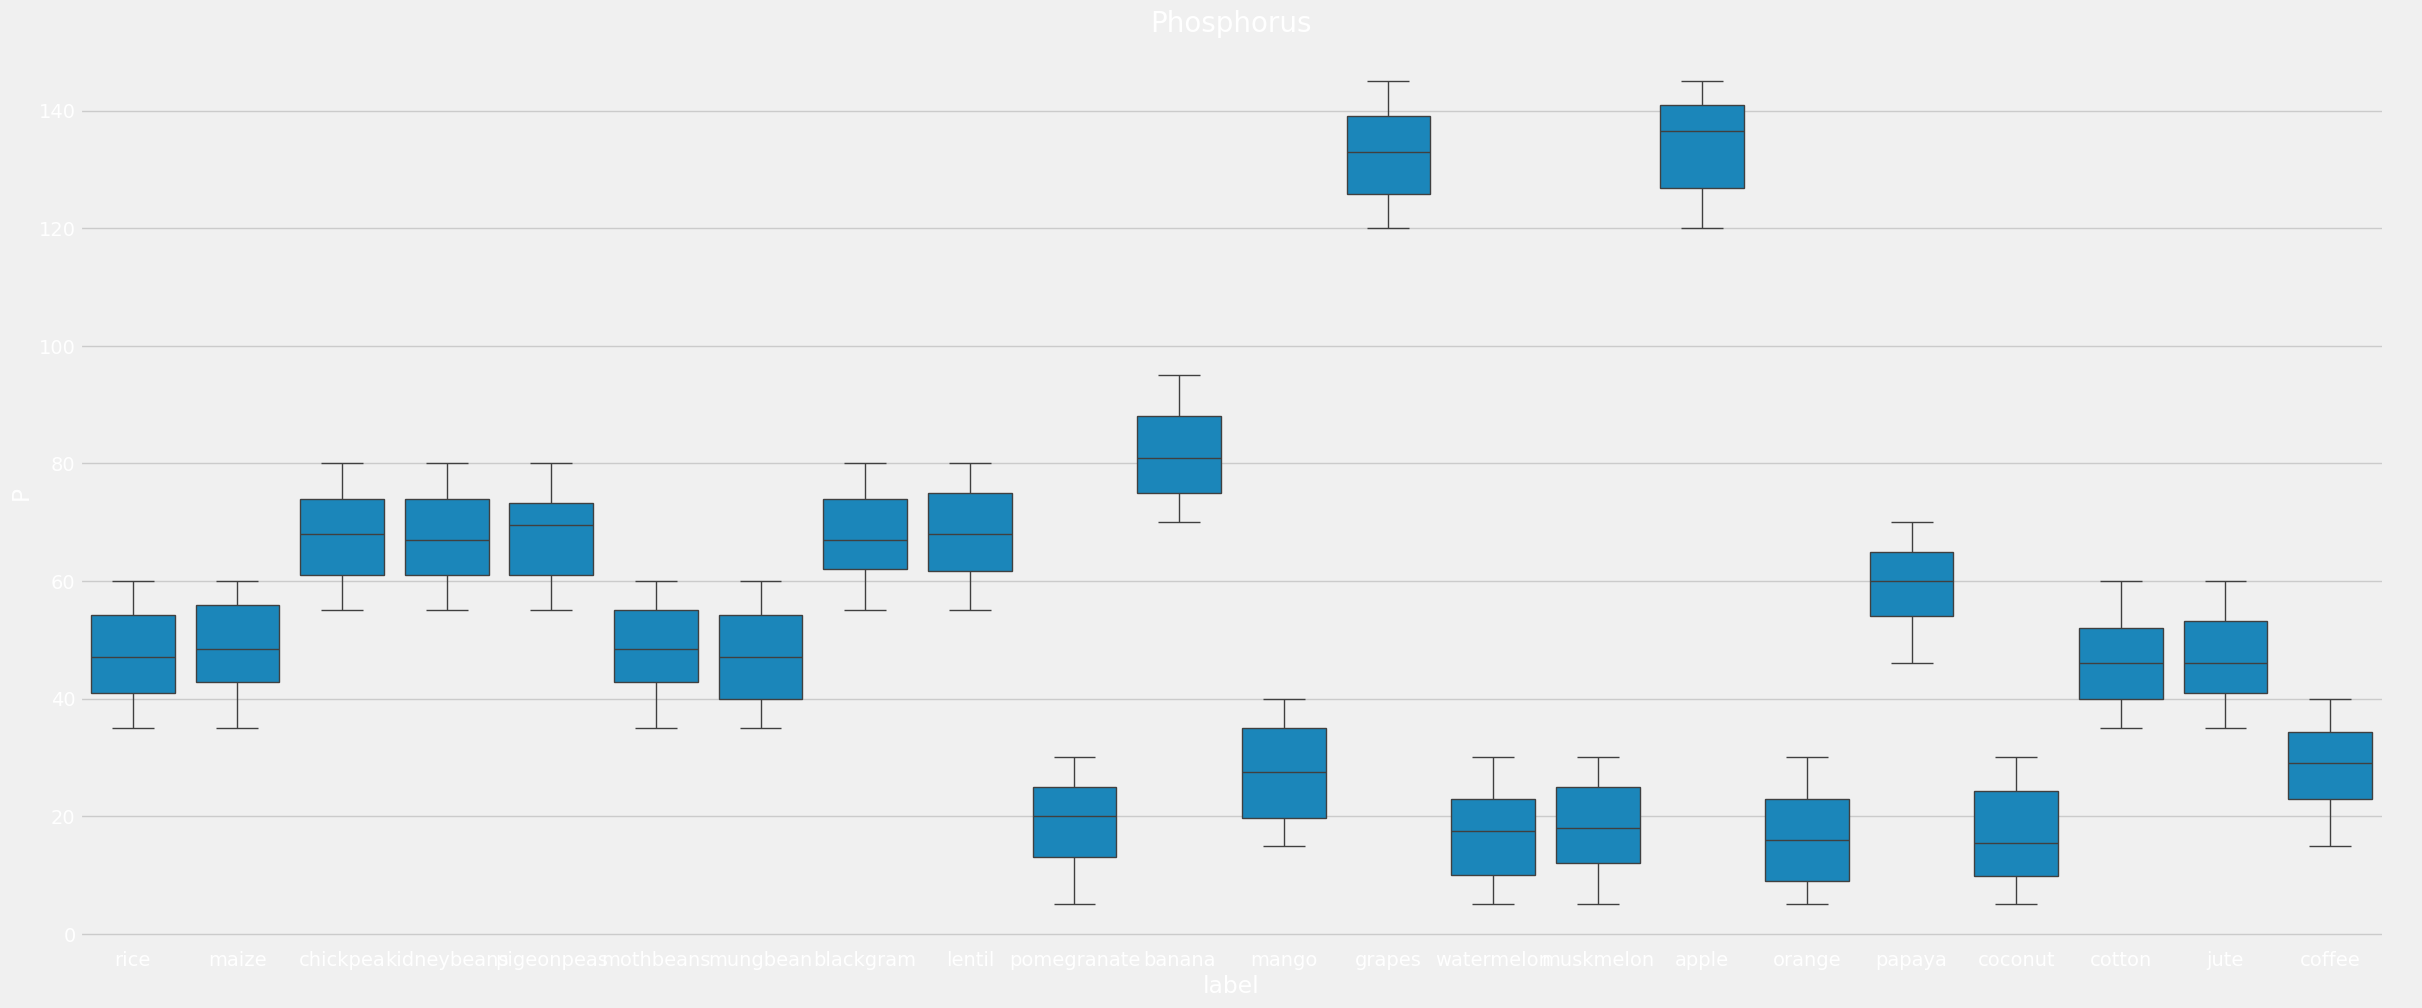

In [105]:
sns.catplot(data=data, x='label', y='P', kind='box', height=10, aspect=20/8.27)
# plt.xticks(rotation='vertical')
plt.title("Phosphorus",size=20)
plt.show()

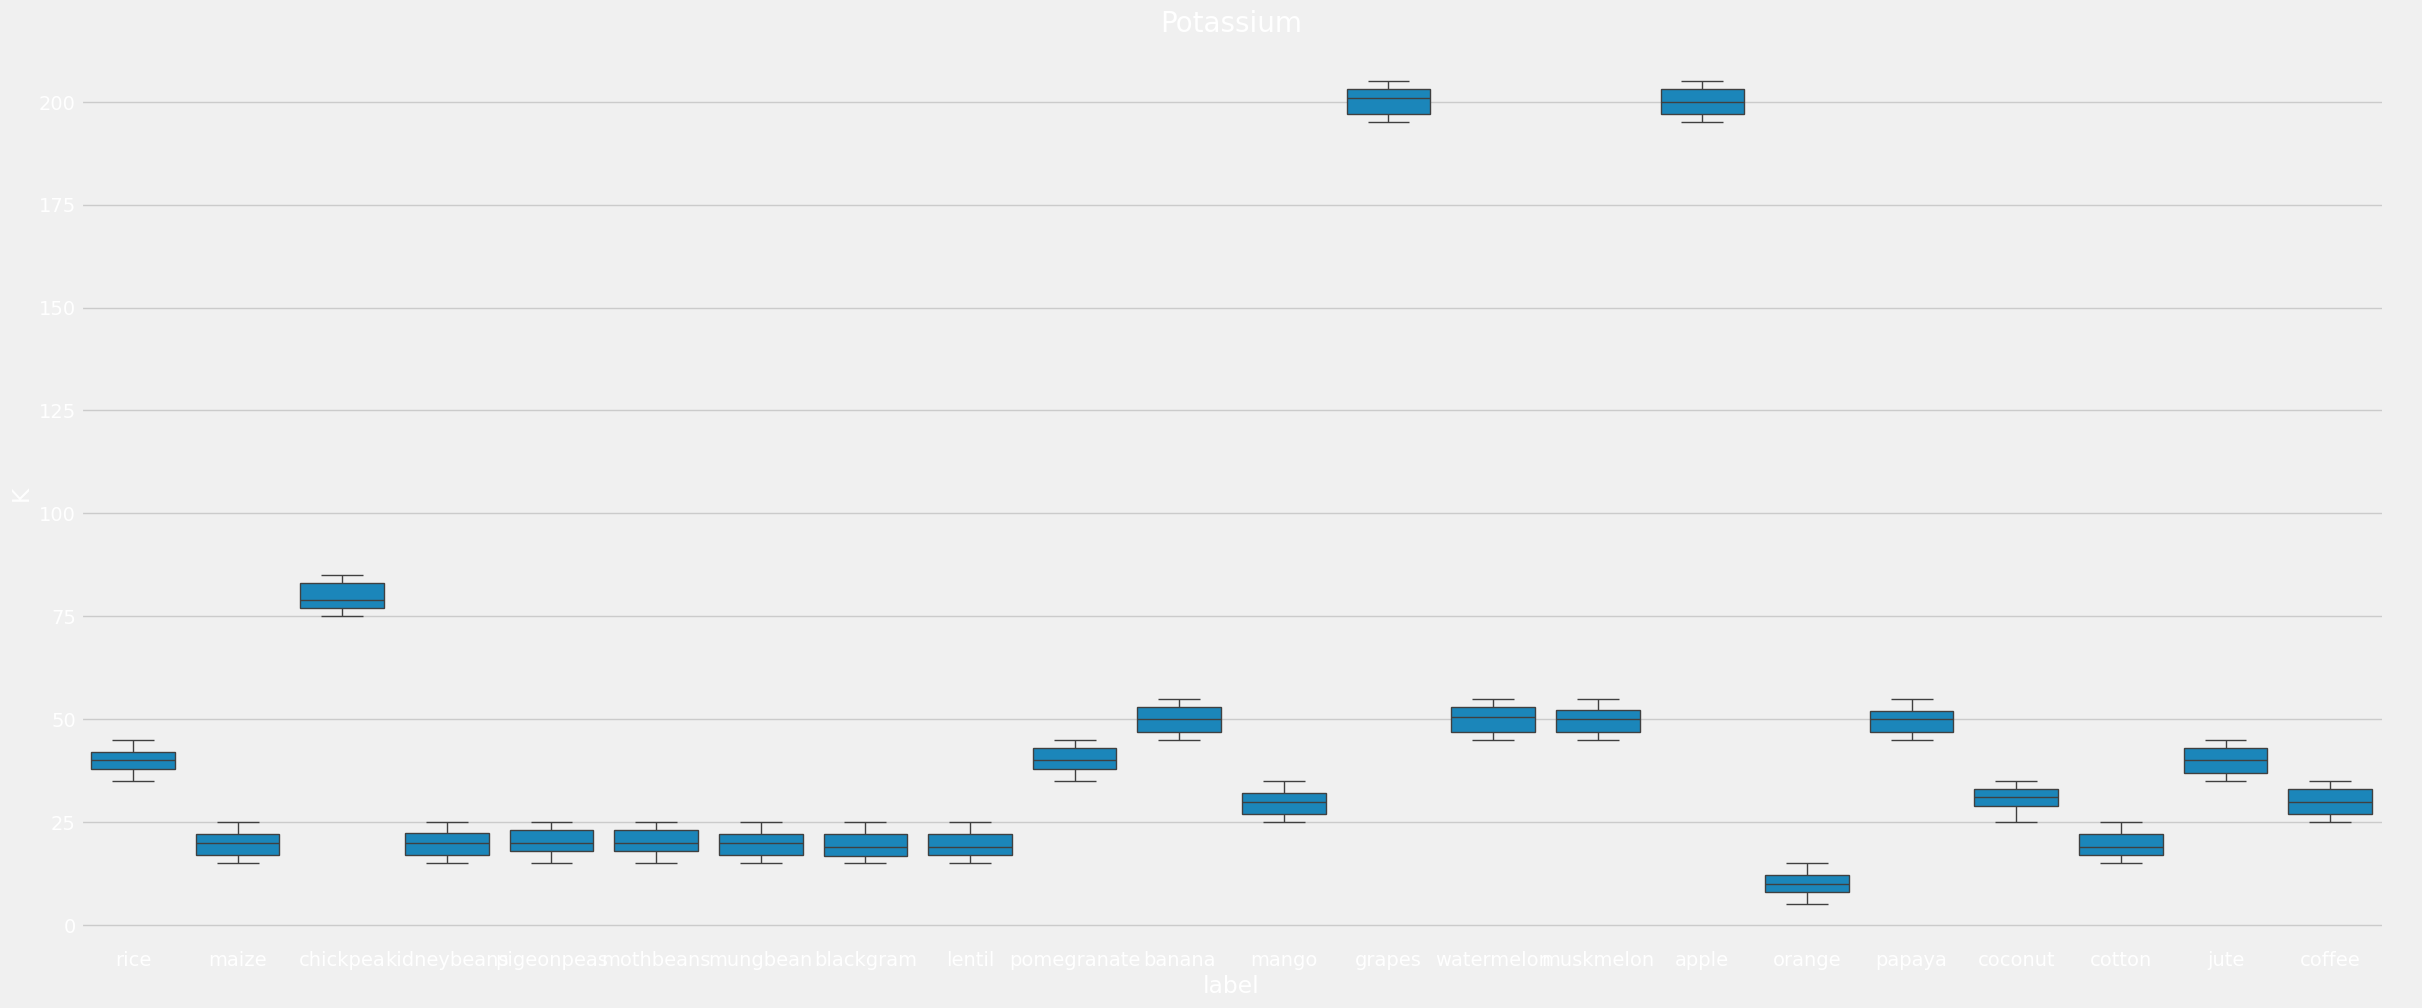

In [106]:
sns.catplot(data=data, x='label', y='K', kind='box', height=10, aspect=20/8.27)
# plt.xticks(rotation='vertical')
plt.title("Potassium",size=20)
plt.show()

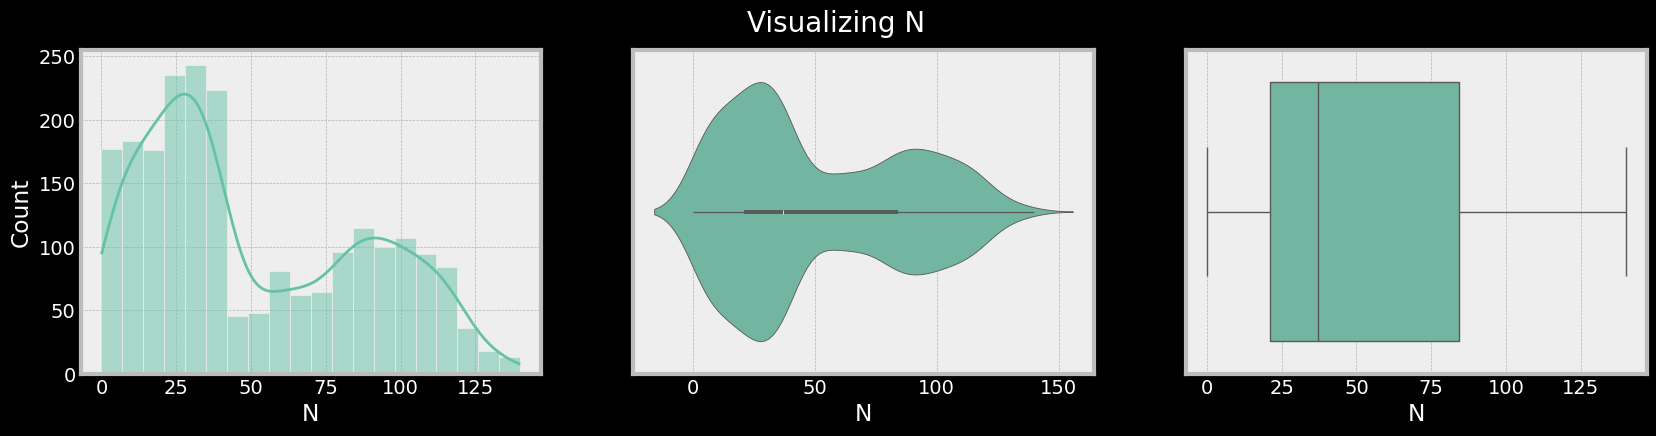

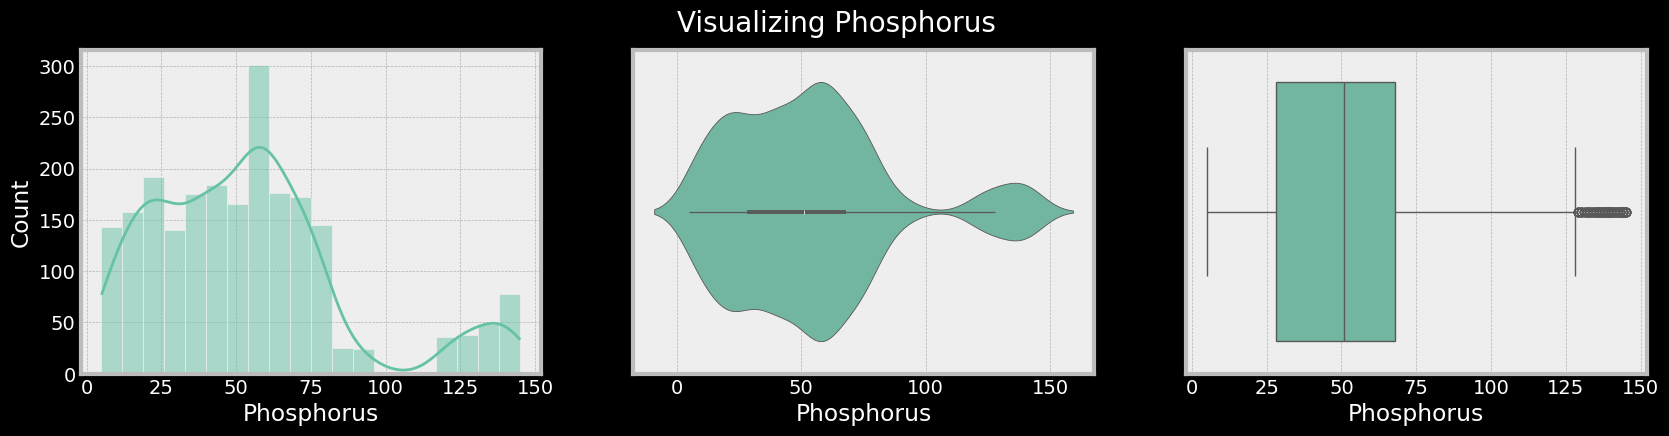

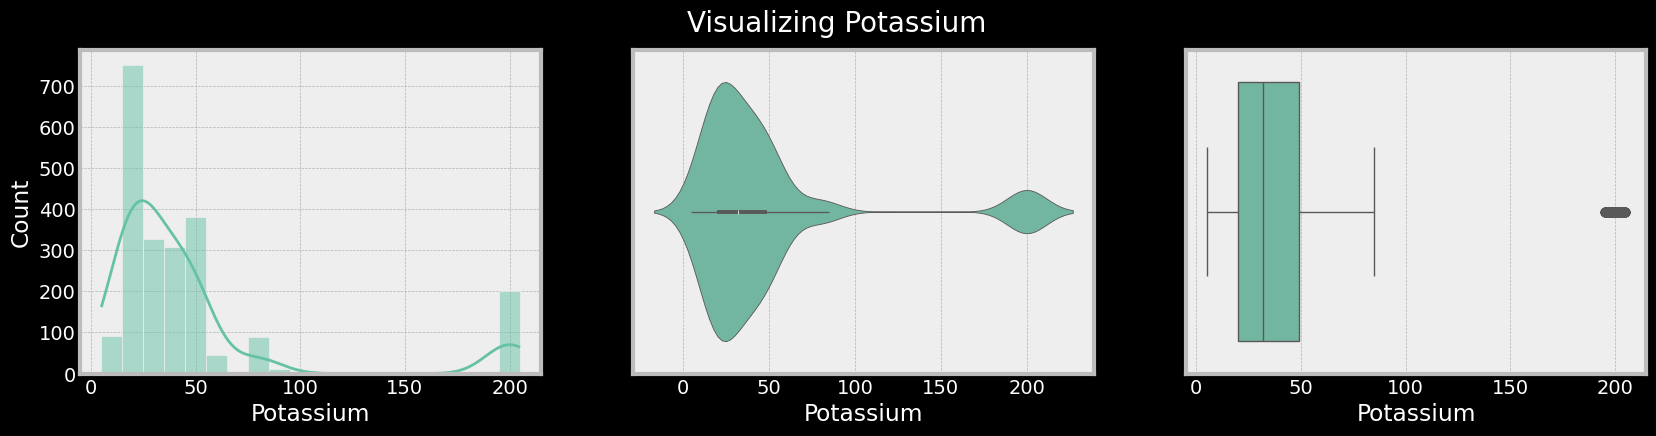

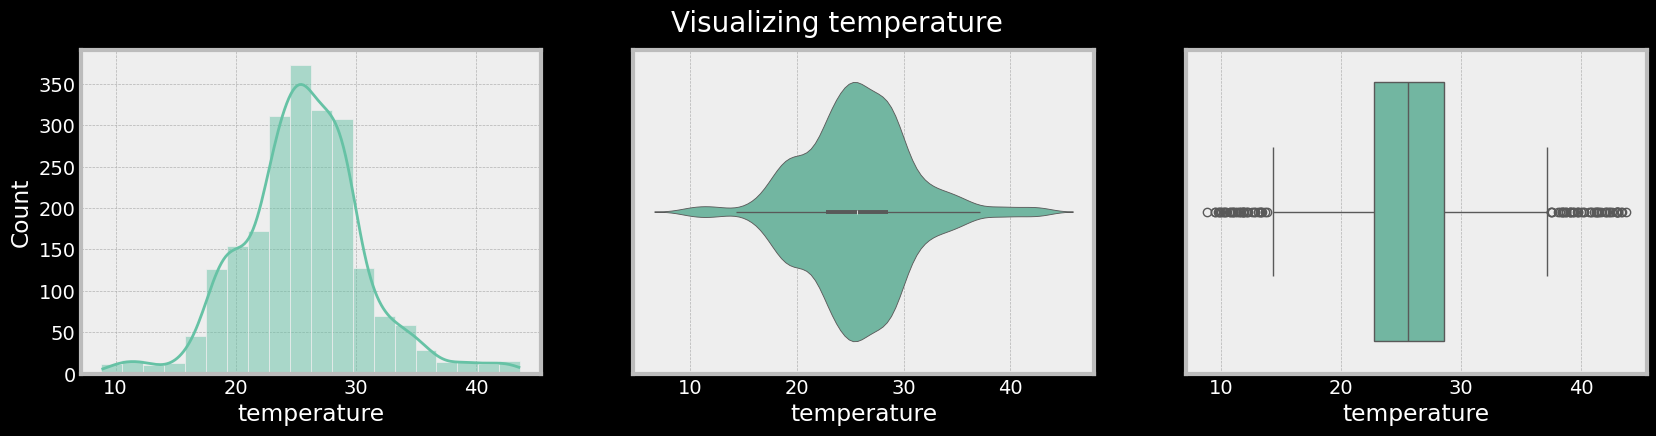

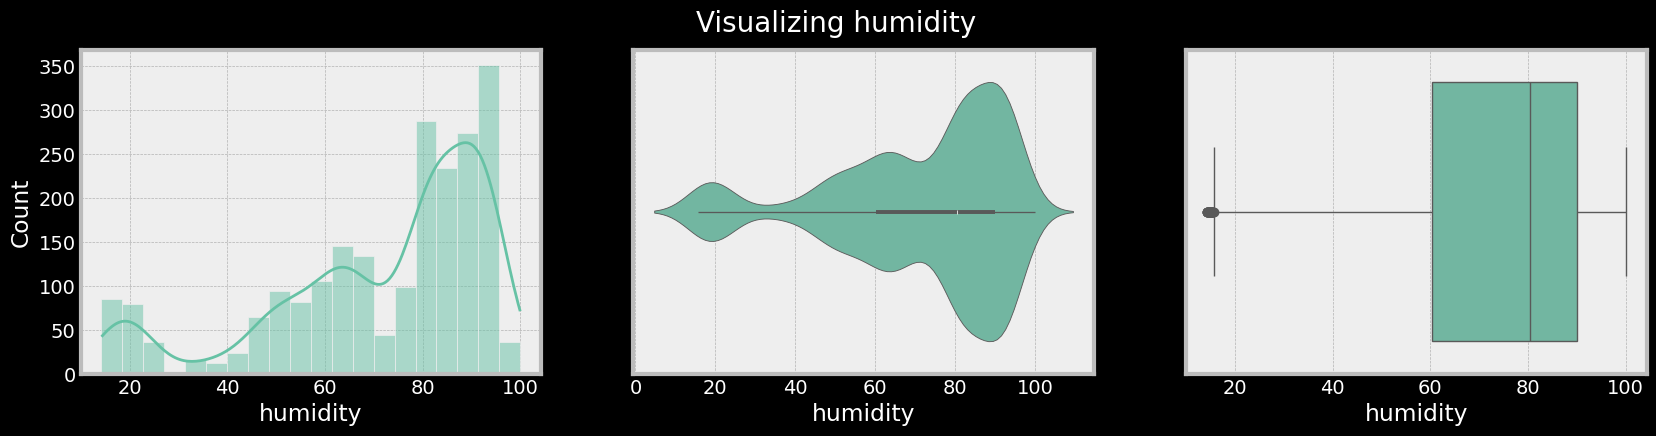

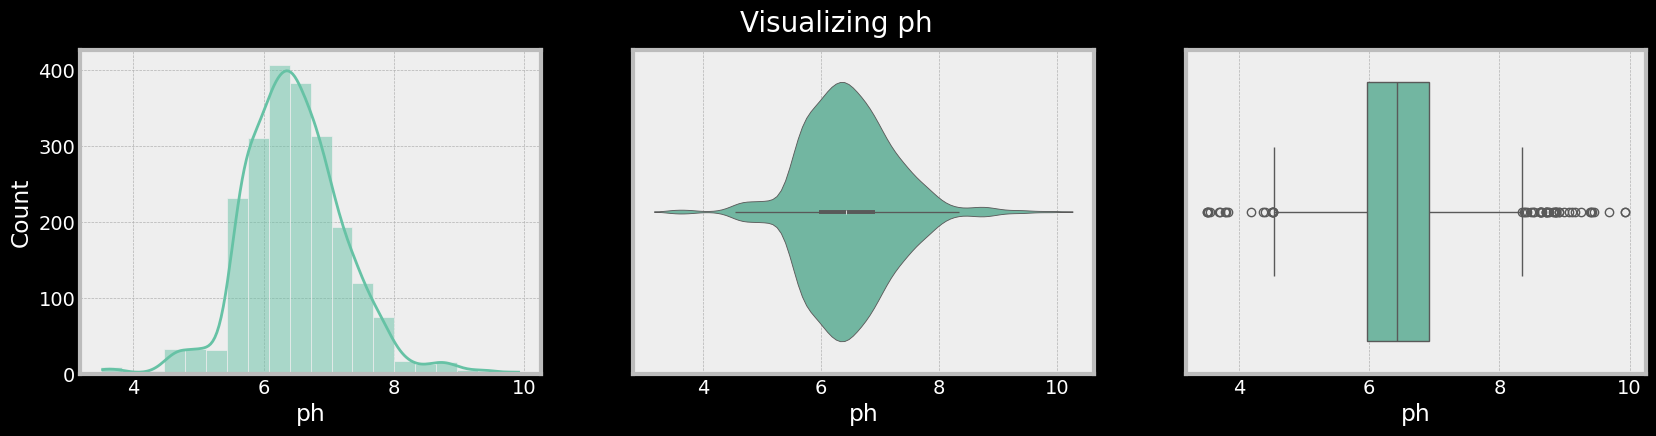

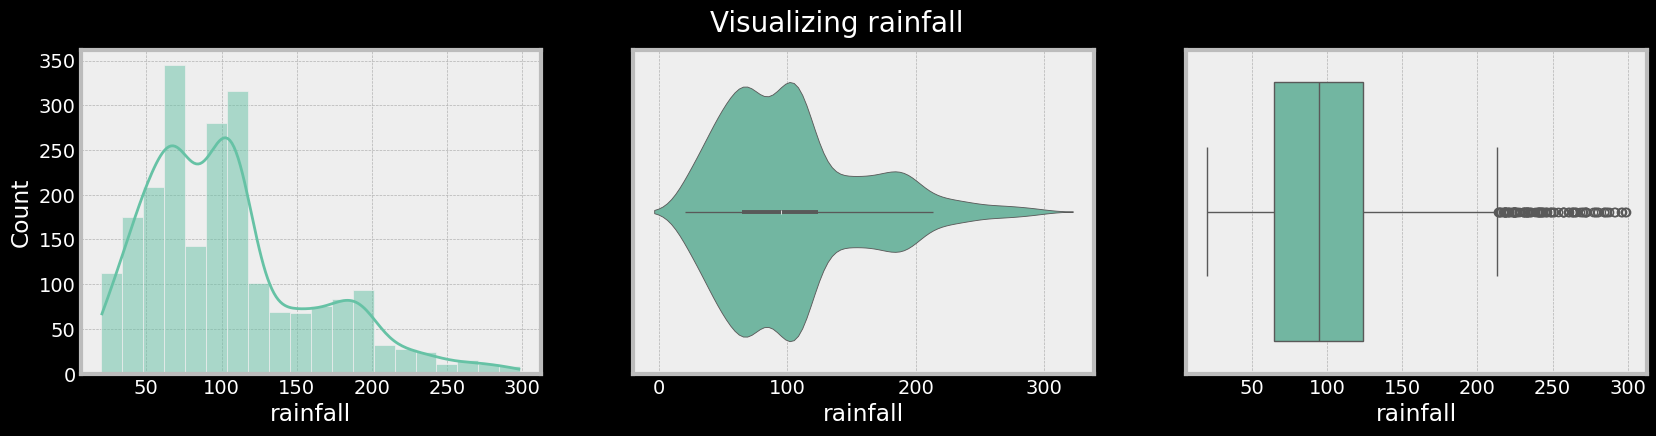

In [231]:
# plt.style.use('dark_background')
plt.style.use('bmh')
sns.set_palette("Set2")
for i in data.columns[:-1]:
    fig,ax=plt.subplots(1,3,figsize=(18,4))
    sns.histplot(data=data,x=i,kde=True,bins=20,ax=ax[0])
    sns.violinplot(data=data,x=i,ax=ax[1])
    sns.boxplot(data=data,x=i,ax=ax[2])
    plt.suptitle(f'Visualizing {i}',size=20)

In [239]:
pip install pandas_profiling

In [244]:
!pip install pydantic-settings

In [245]:
import pandas_profiling
from pydantic_settings import BaseSettings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

PydanticImportError: `BaseSettings` has been moved to the `pydantic-settings` package. See https://docs.pydantic.dev/2.7/migration/#basesettings-has-moved-to-pydantic-settings for more details.

For further information visit https://errors.pydantic.dev/2.7/u/import-error

In [240]:
import pandas_profiling

PydanticImportError: `BaseSettings` has been moved to the `pydantic-settings` package. See https://docs.pydantic.dev/2.7/migration/#basesettings-has-moved-to-pydantic-settings for more details.

For further information visit https://errors.pydantic.dev/2.7/u/import-error

In [243]:
!pip install pandas_profiling
import pandas_profiling
data = pandas_profiling.ProfileReport(df)
data.convert_objects(convert_numeric=True)
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True)
plt.show()

PydanticImportError: `BaseSettings` has been moved to the `pydantic-settings` package. See https://docs.pydantic.dev/2.7/migration/#basesettings-has-moved-to-pydantic-settings for more details.

For further information visit https://errors.pydantic.dev/2.7/u/import-error

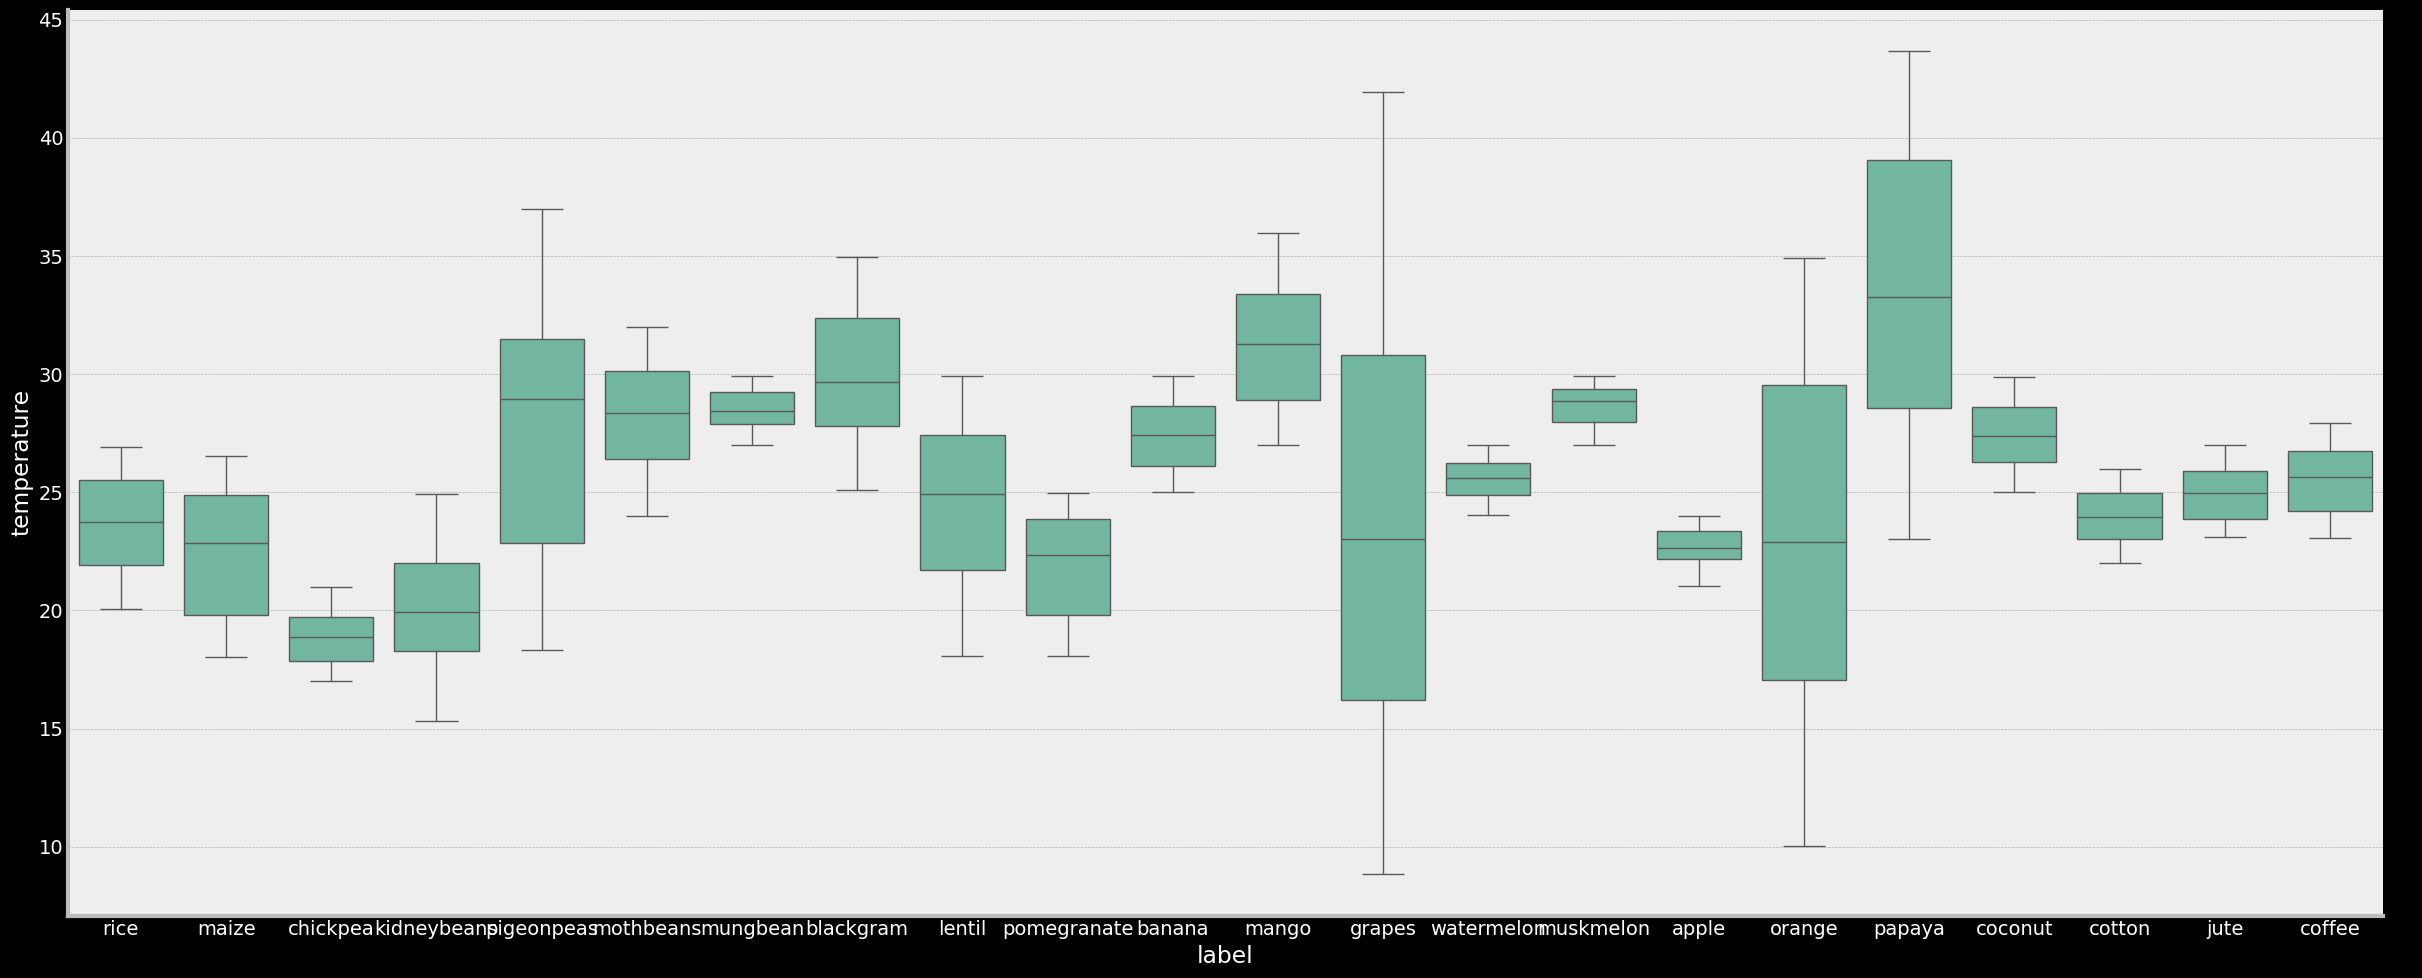

In [232]:
sns.catplot(data=data, x='label', y='temperature', kind='box', height=10, aspect=20/8.27)
# plt.xticks(rotation='vertical')
# plt.title("Temperature", size=20)
plt.show()

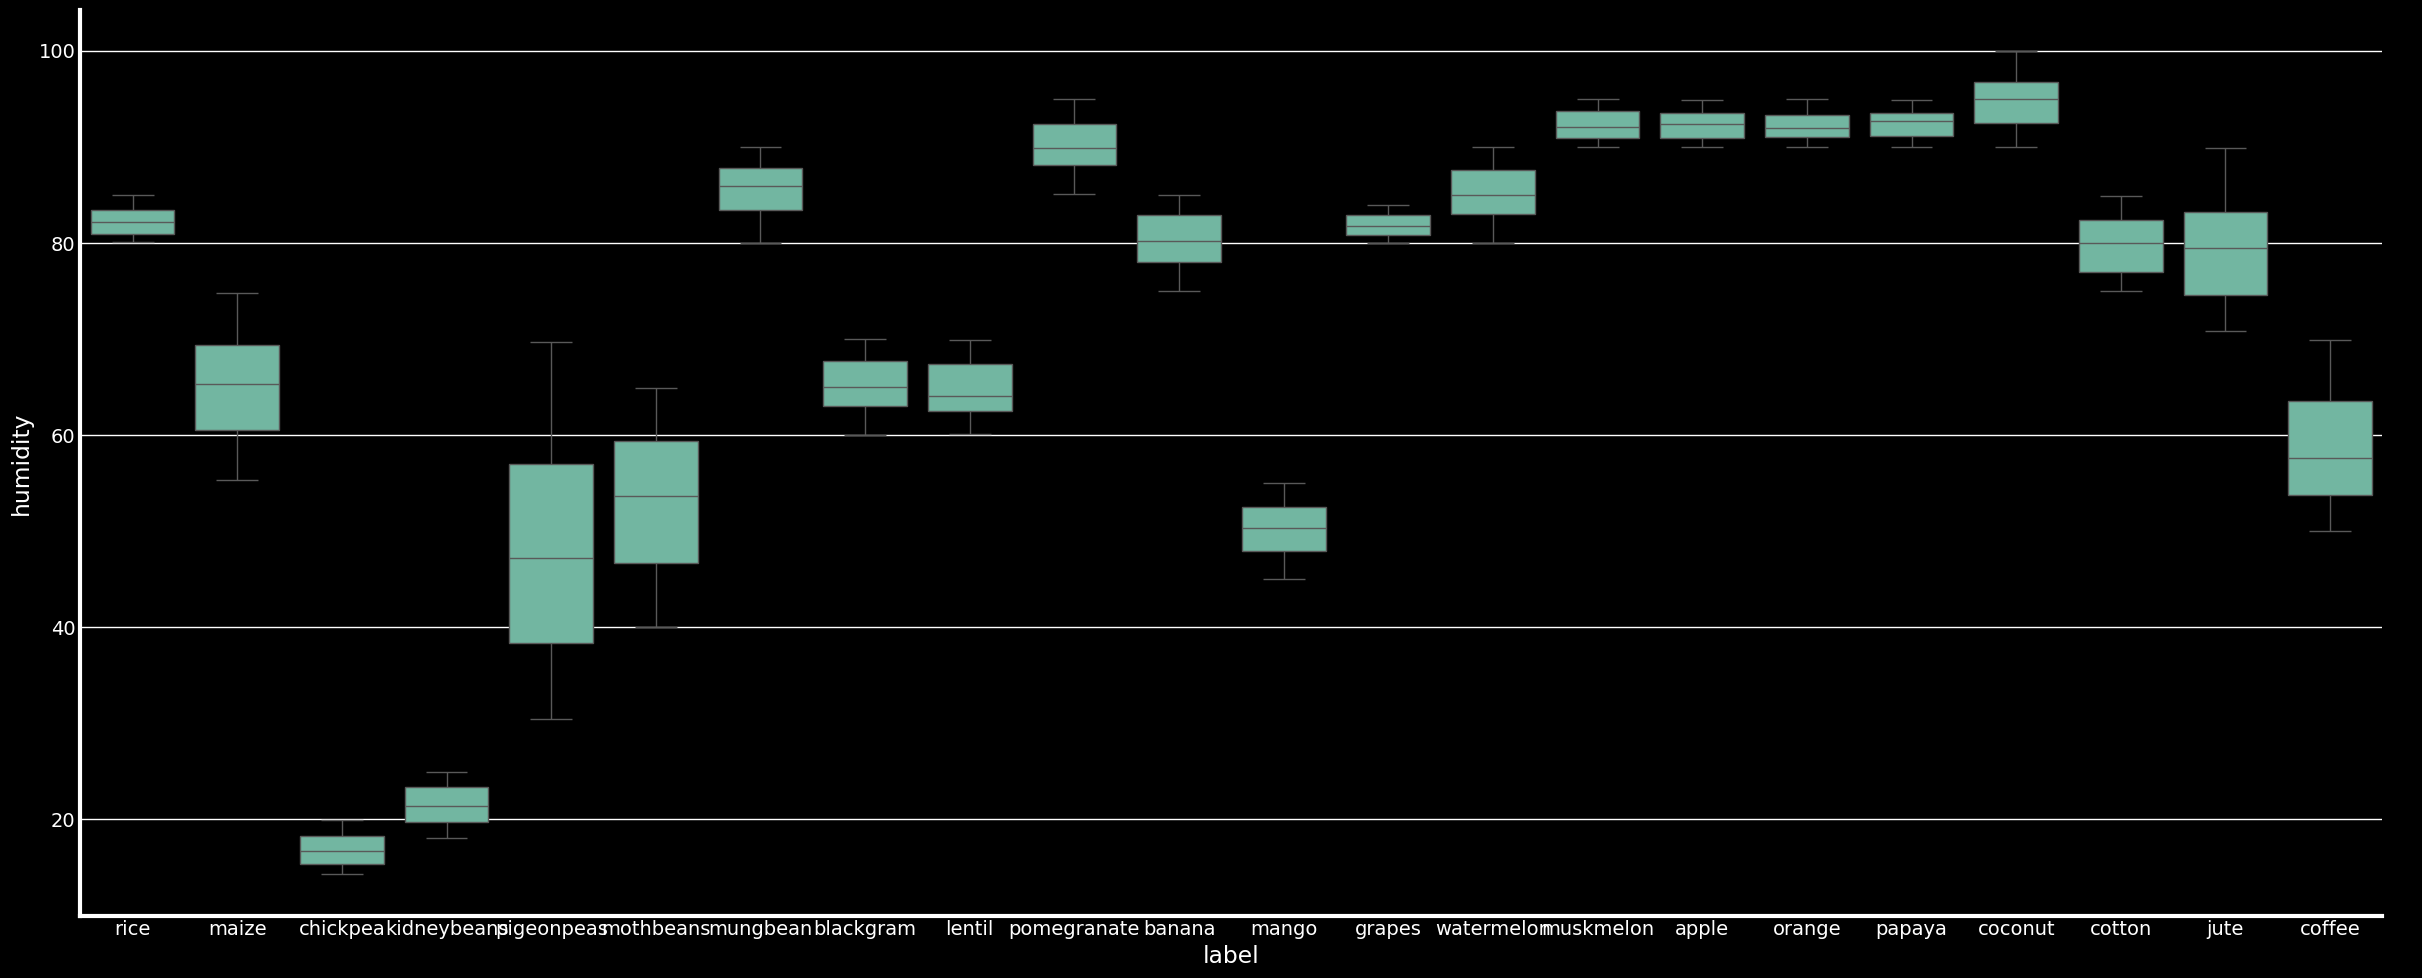

In [109]:
sns.catplot(data=data, x='label', y='humidity', kind='box', height=10, aspect=20/8.27)
# plt.xticks(rotation='vertical')
# plt.title("Humidity", size=20)
plt.show()

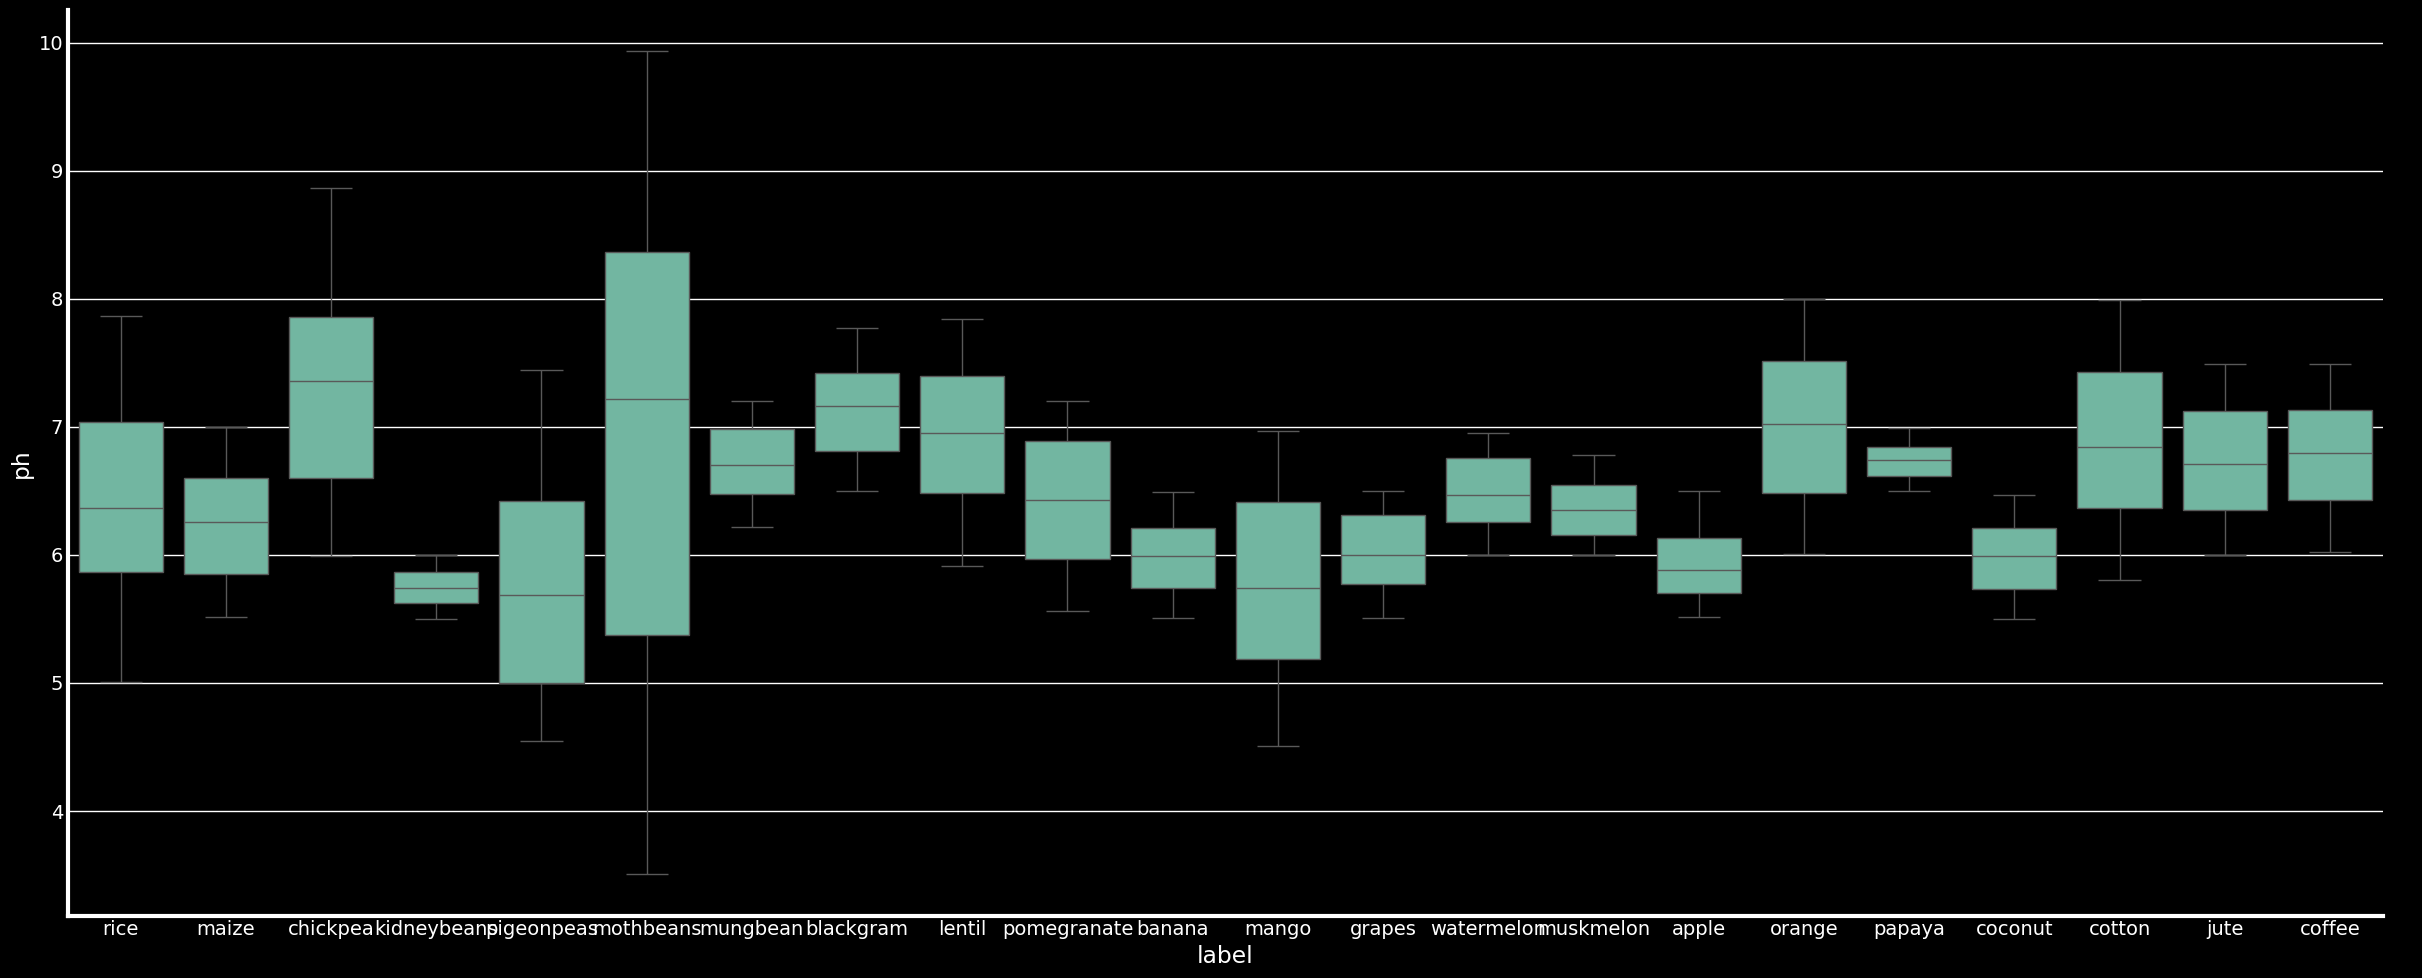

In [110]:
sns.catplot(data=data, x='label', y='ph', kind='box', height=10, aspect=20/8.27)
# plt.xticks(rotation='vertical')
# plt.title("ph", size=20)
plt.show()

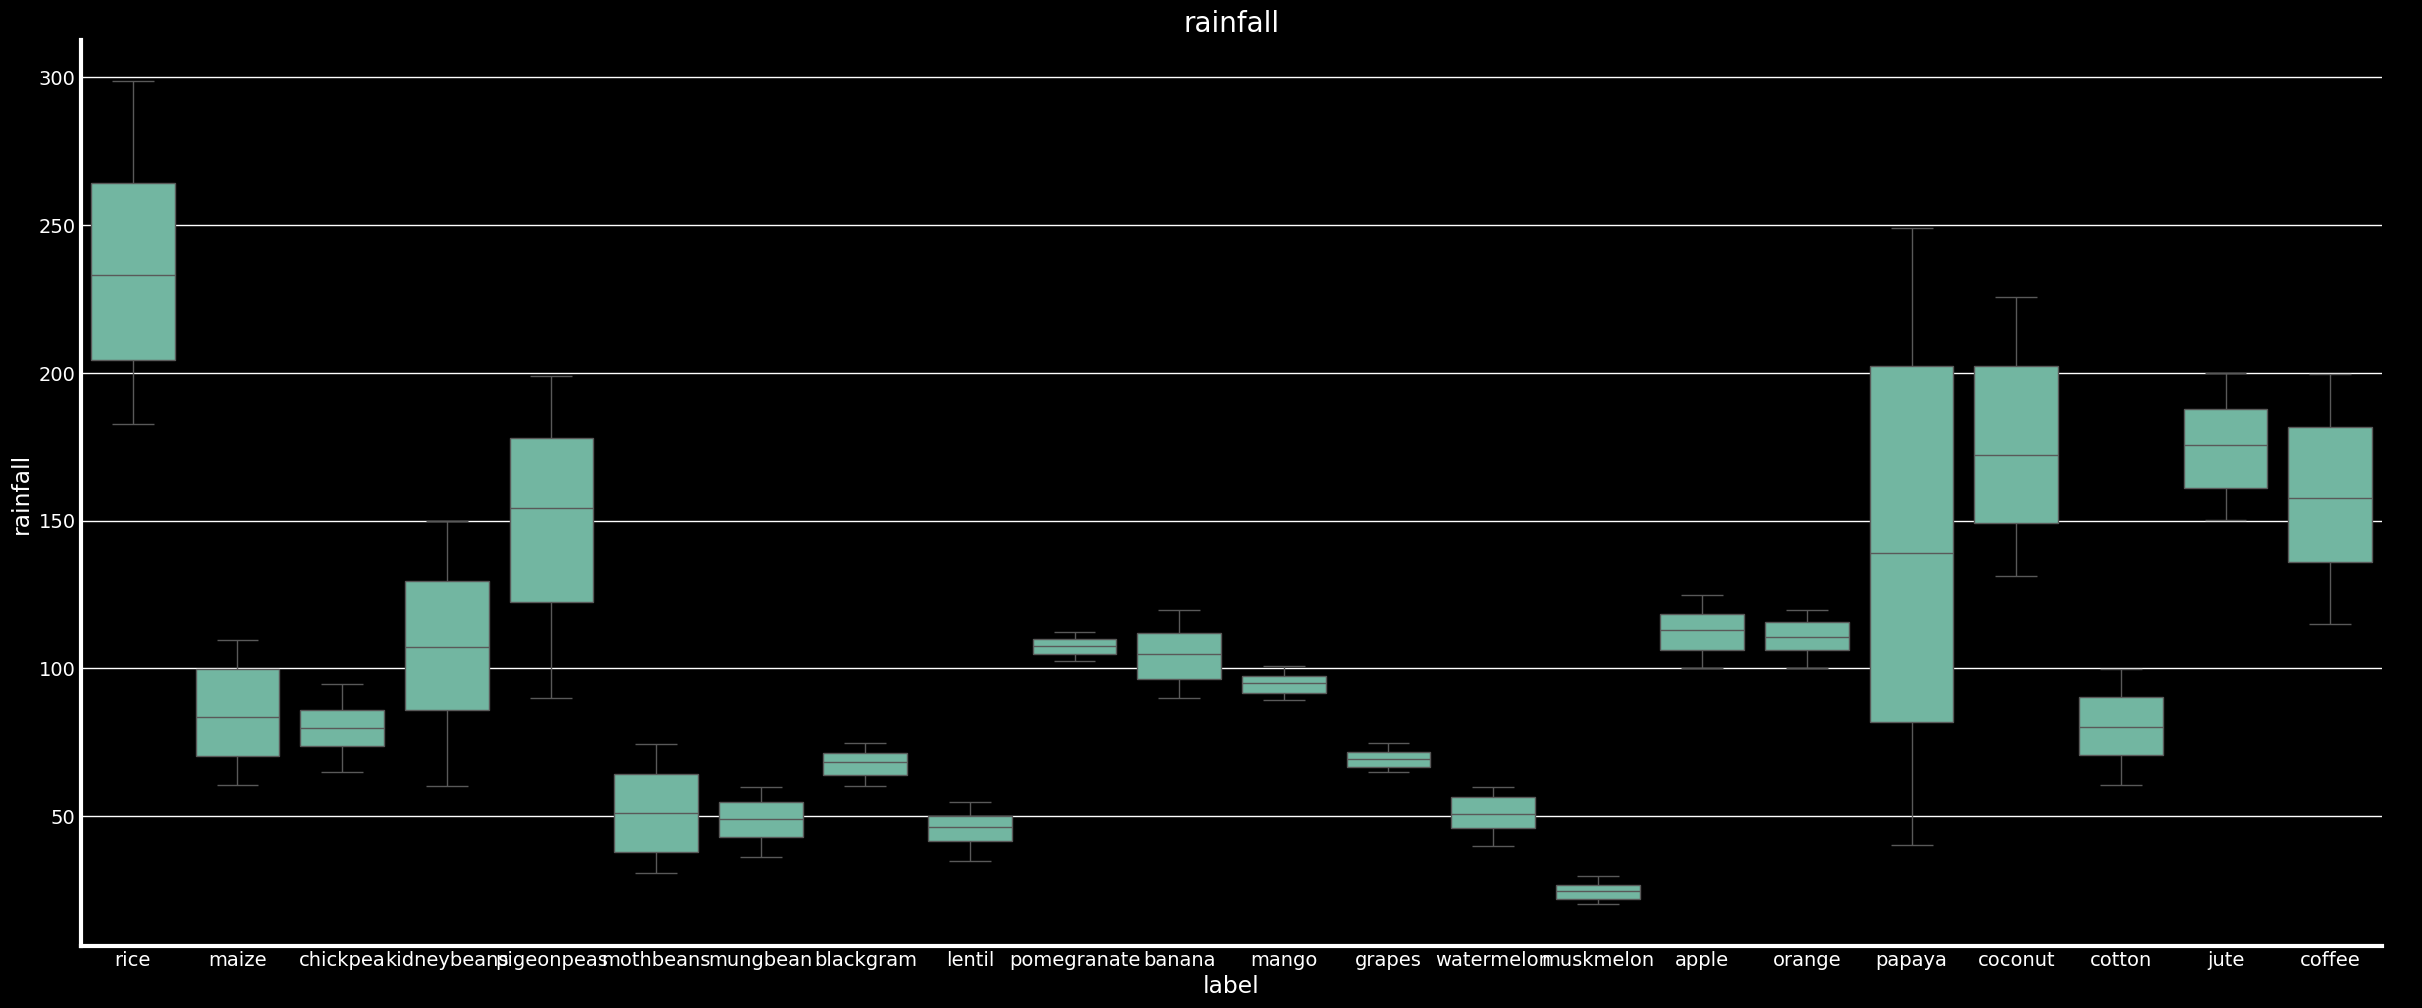

In [111]:
sns.catplot(data=data, x='label', y='rainfall', kind='box', height=10, aspect=20/8.27)
# plt.xticks(rotation='vertical')
plt.title("rainfall", size=20)
plt.show()

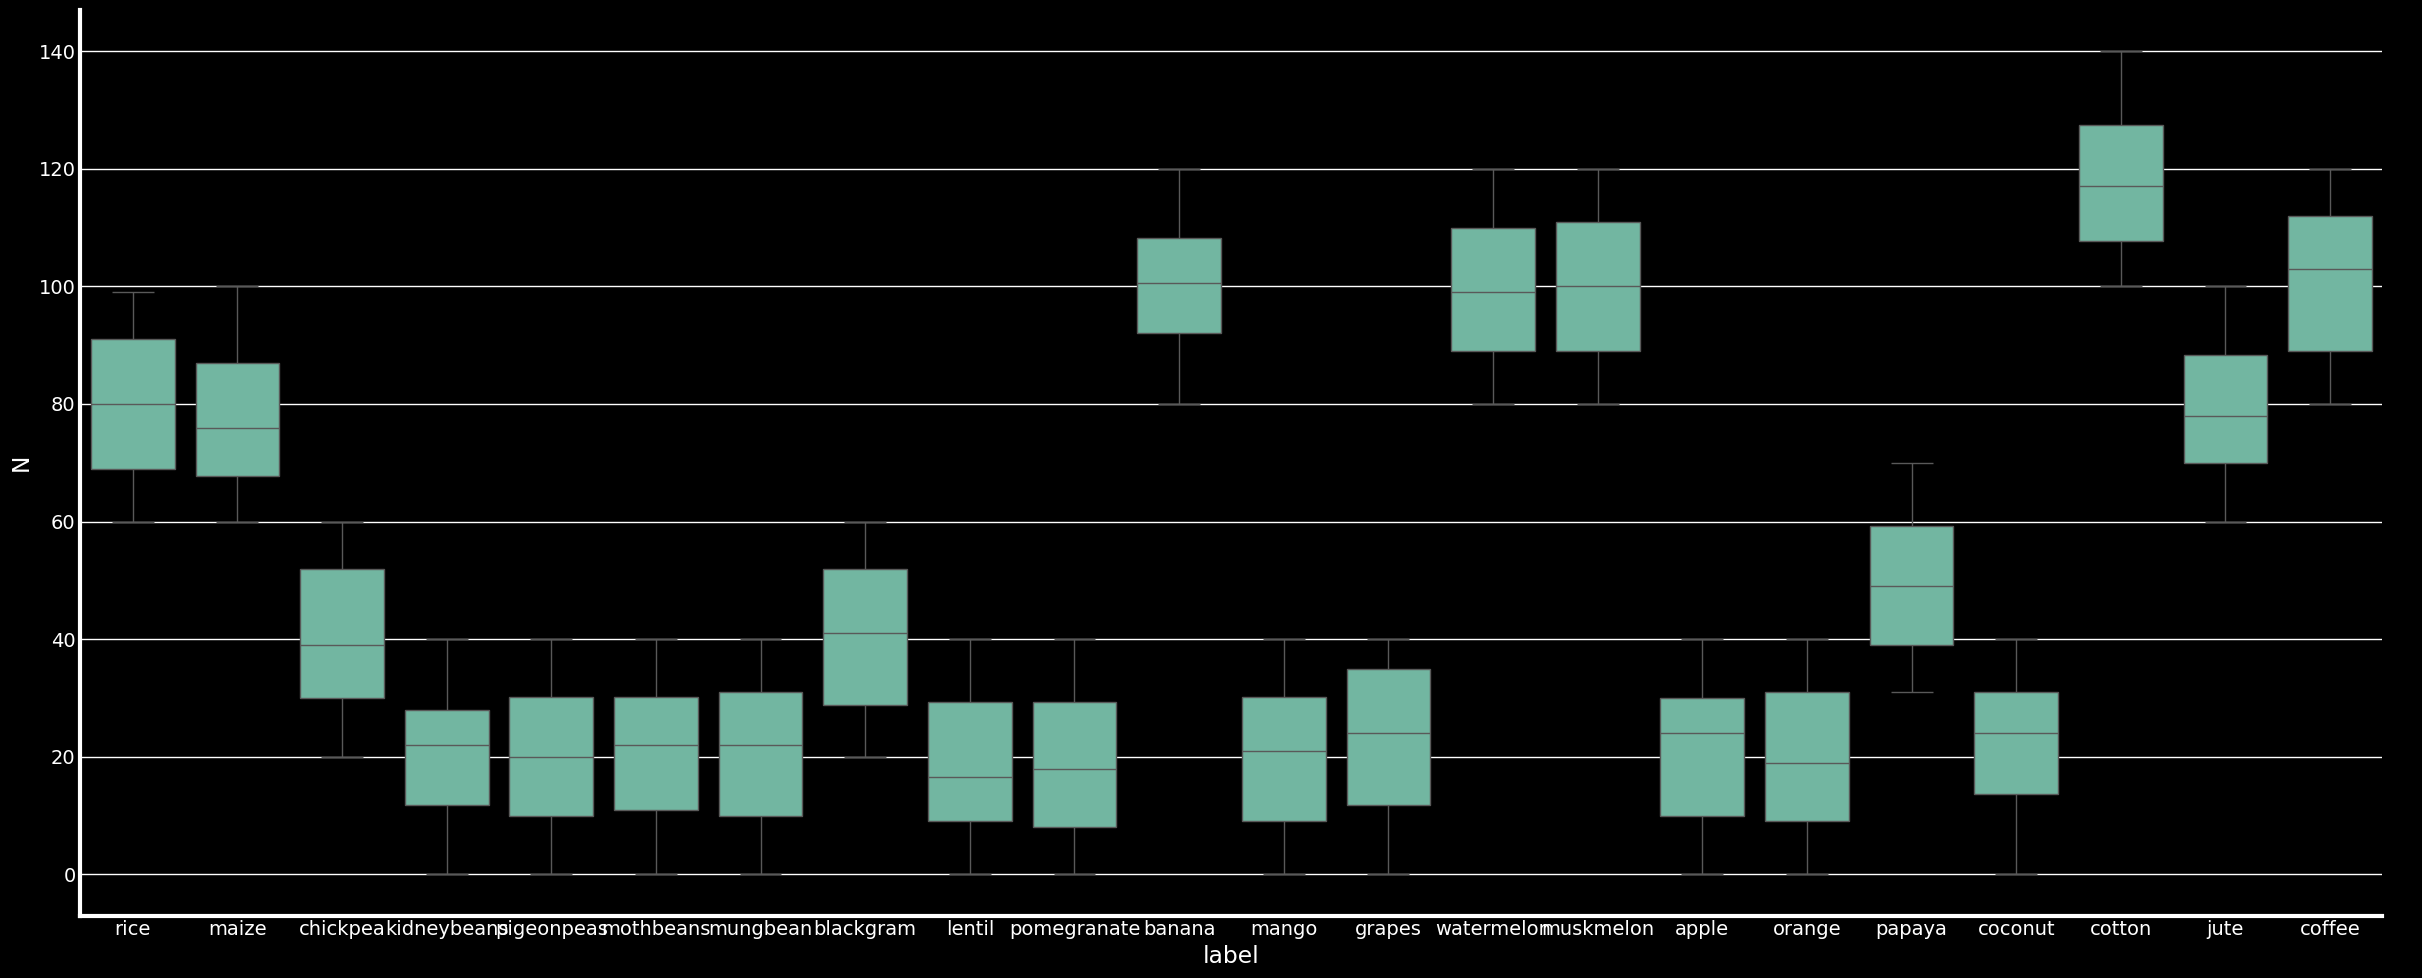

In [112]:
sns.catplot(data=data, x='label', y='N', kind='box', height=10, aspect=20/8.27)
# plt.xticks(rotation='vertical')
plt.show()

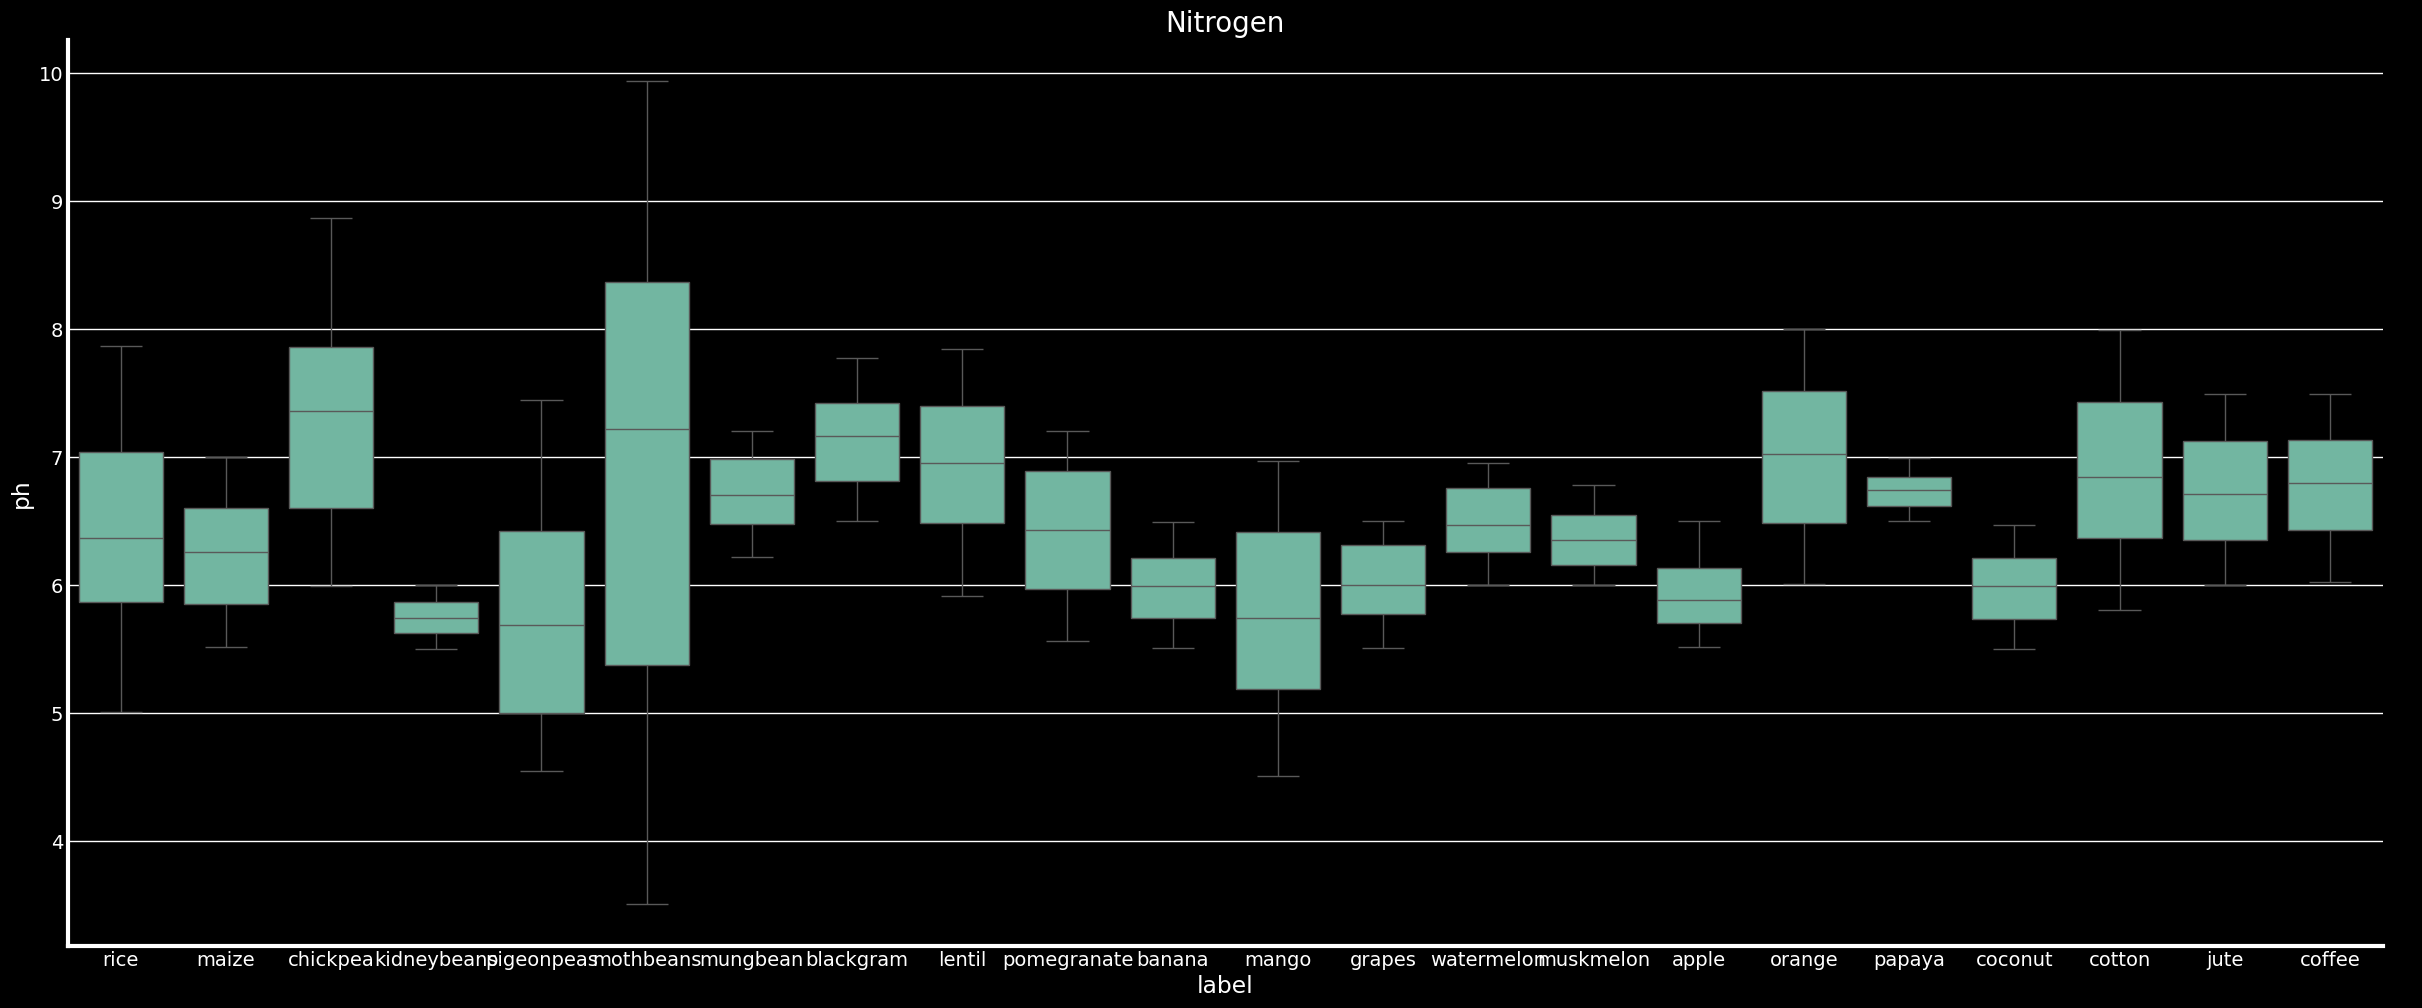

In [113]:
sns.catplot(data=data, x='label', y='ph', kind='box', height=10, aspect=20/8.27)
# plt.xticks(rotation='vertical')
plt.title("Nitrogen",size=20)
plt.show()


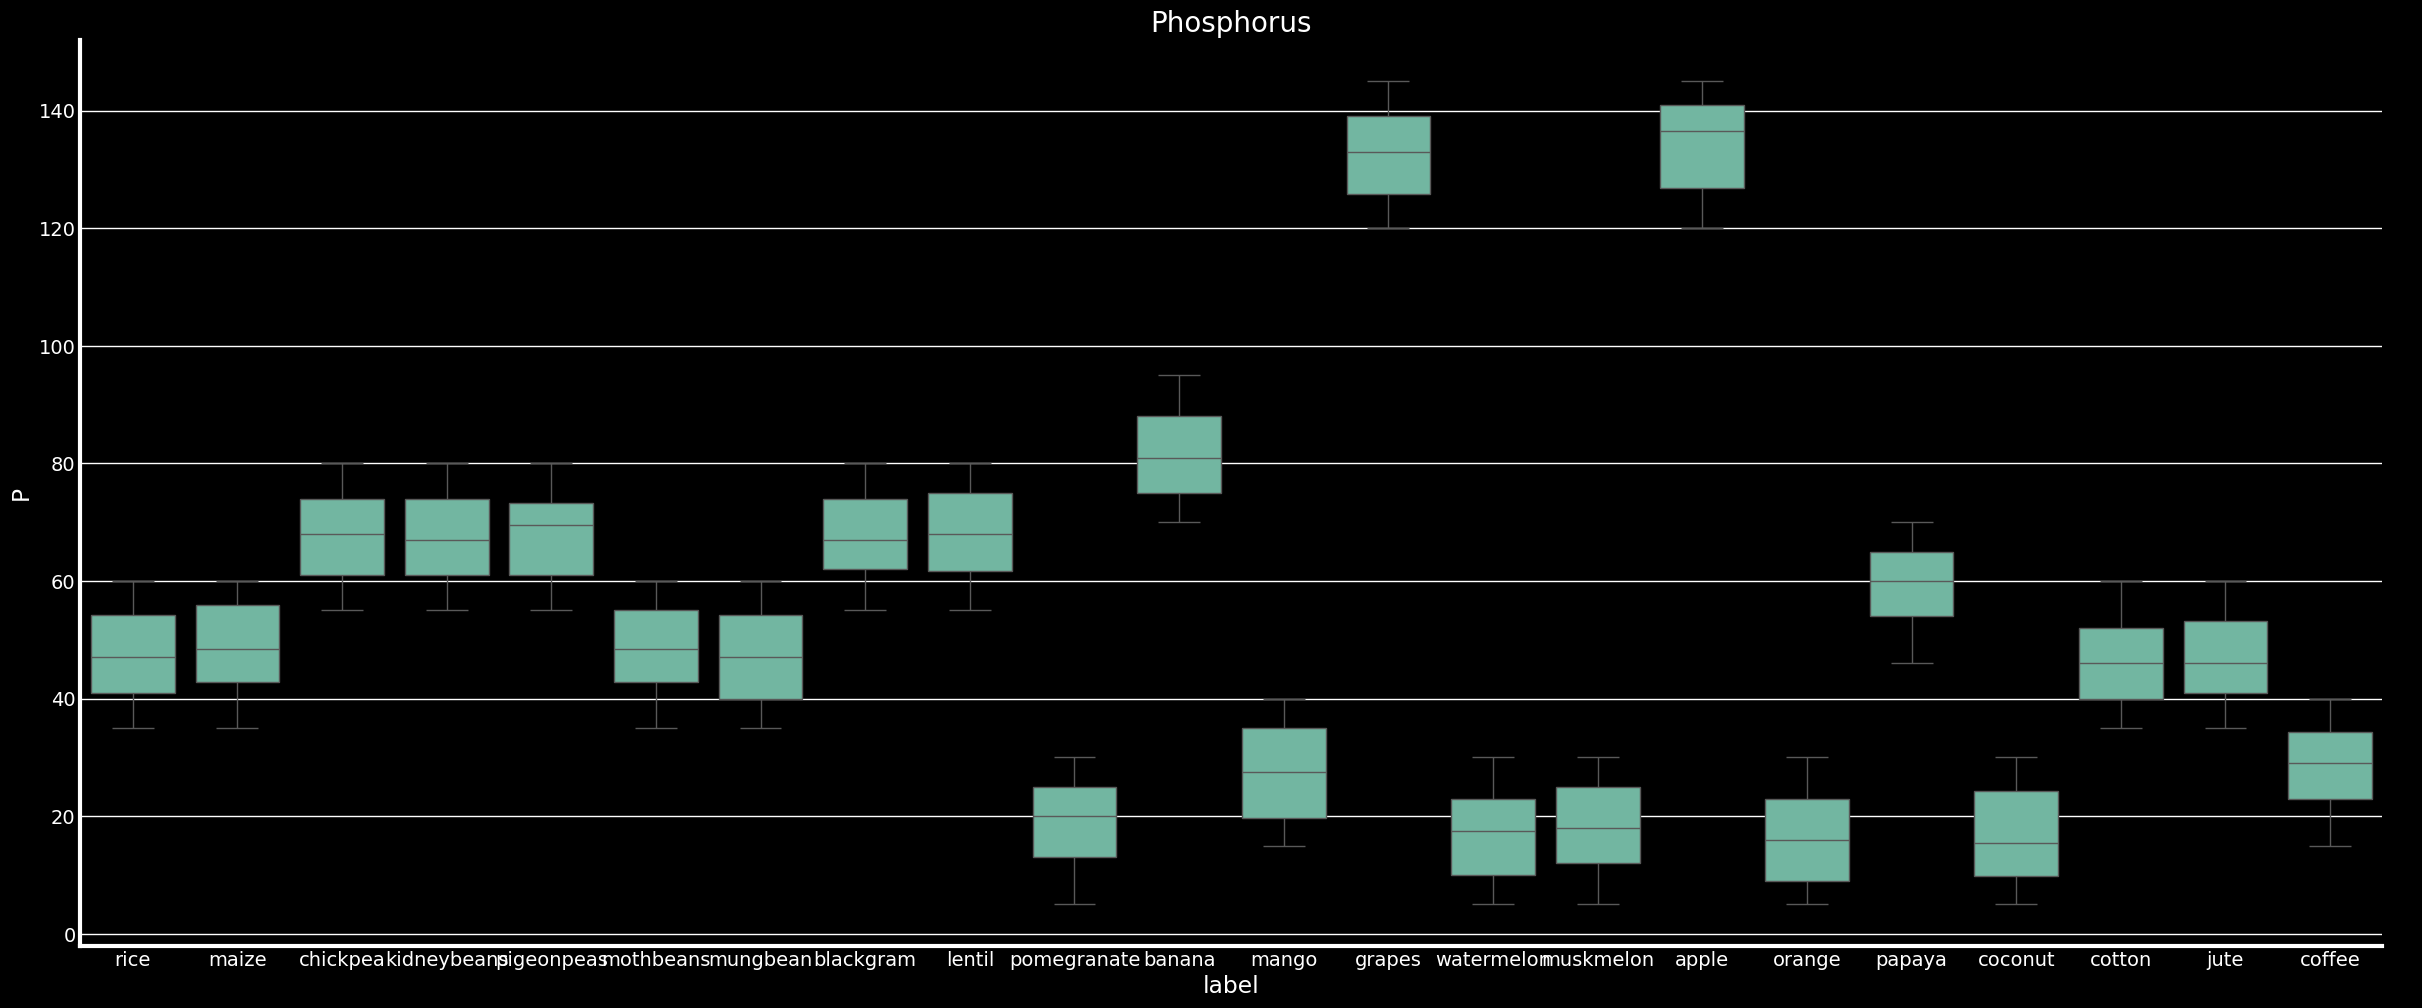

In [114]:
sns.catplot(data=data, x='label', y='P', kind='box', height=10, aspect=20/8.27)
# plt.xticks(rotation='vertical')
plt.title("Phosphorus",size=20)
plt.show()

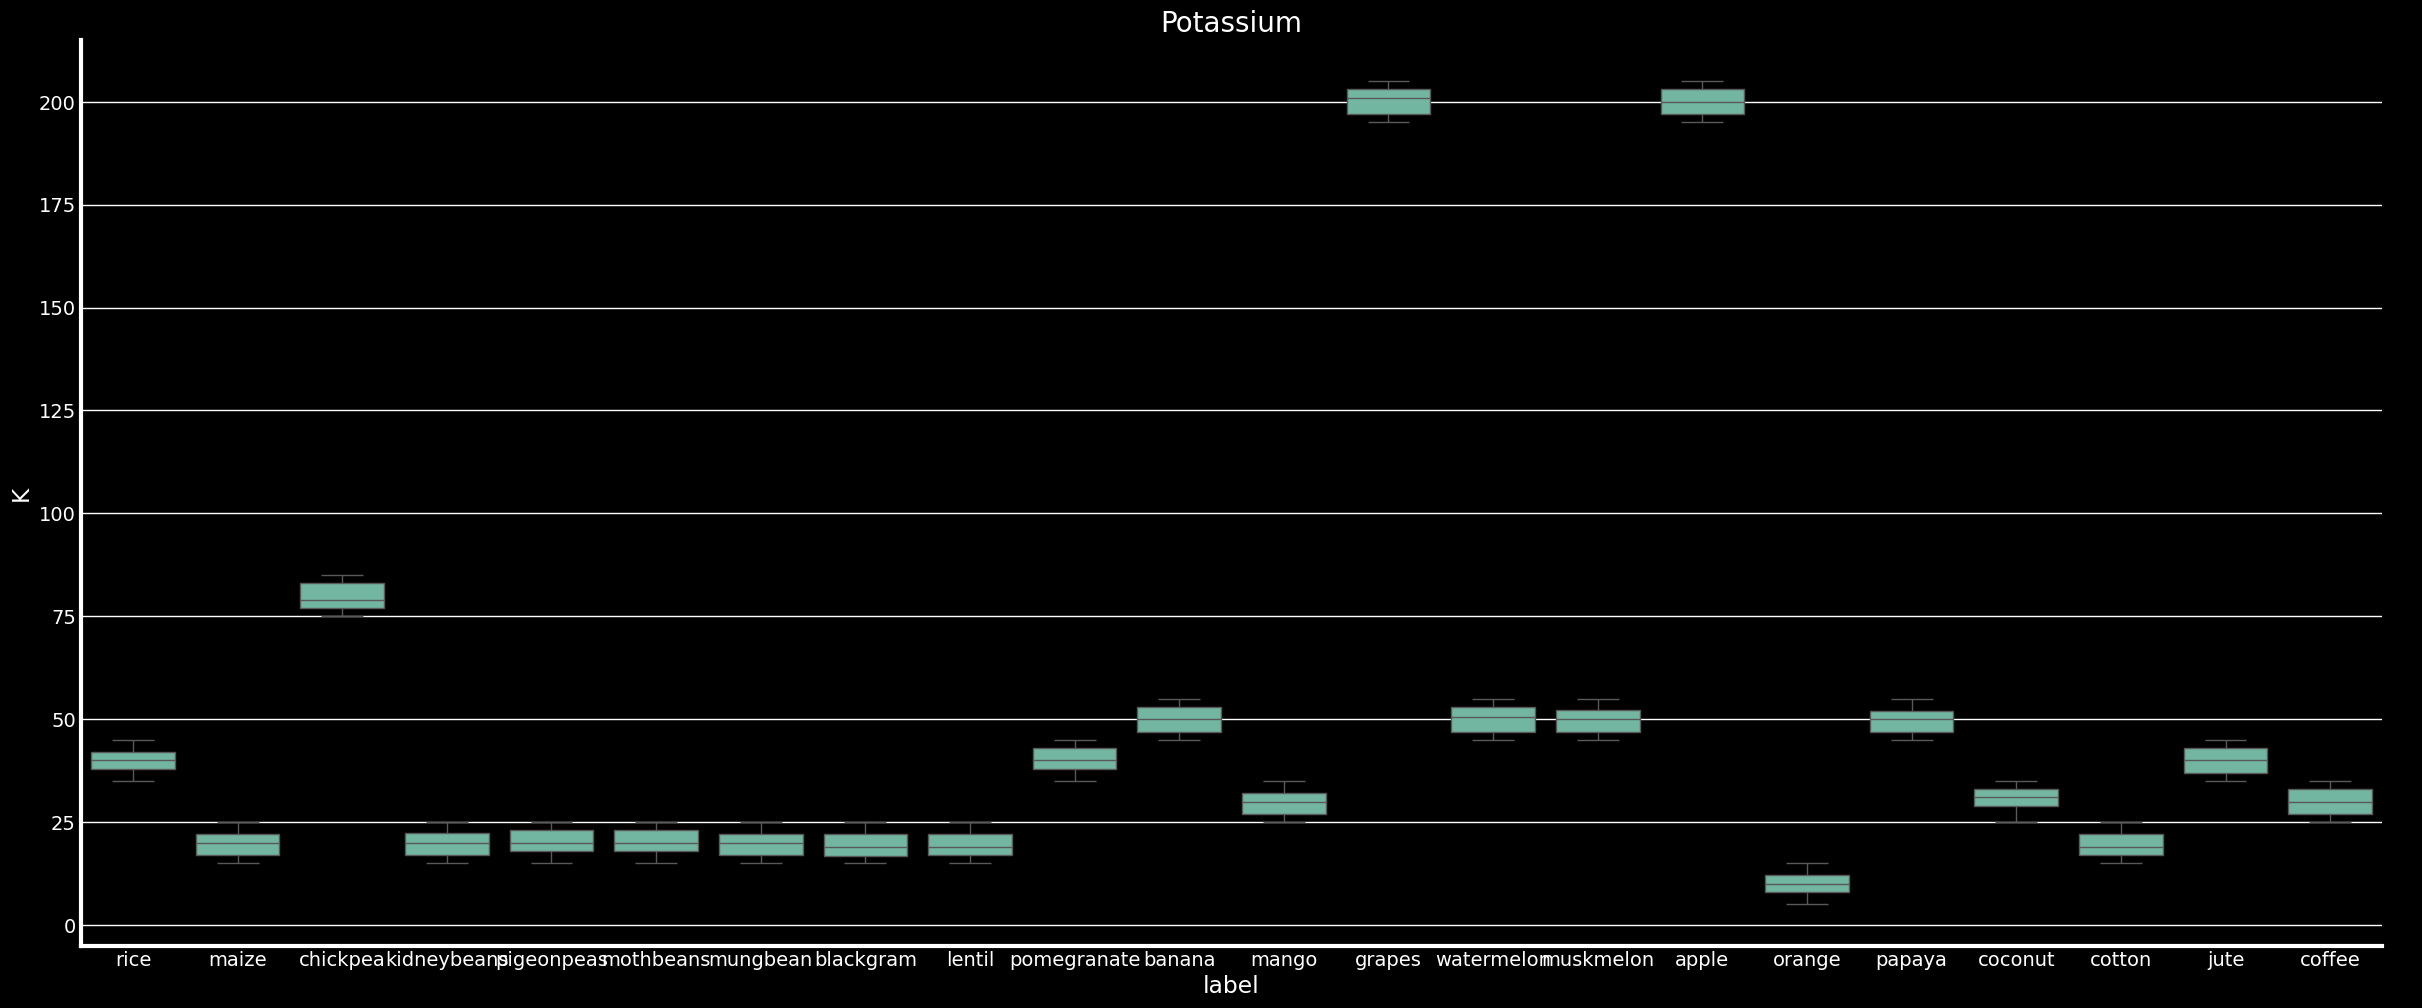

In [115]:
sns.catplot(data=data, x='label', y='K', kind='box', height=10, aspect=20/8.27)
# plt.xticks(rotation='vertical')
plt.title("Potassium",size=20)
plt.show()

In [116]:
def detect_outlier(x):
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    IQR = q3-q1
    lower_limit = q1 - (1.5*IQR)
    upper_limit = q3 + (1.5*IQR)
    print(f"Lower limit: {lower_limit} Upper limit: {upper_limit}")
    print(f"Minimum value: {x.min()}   MAximum Value: {x.max()}")
    for i in [x.min(),x.max()]:
        if i == x.min():
            if lower_limit > x.min():
                print("Lower limit failed - Need to remove minimum value")
            elif lower_limit < x.min():
                print("Lower limit passed - No need to remove outlier")
        elif i == x.max():
            if upper_limit > x.max():
                print("Upper limit passed - No need to remove outlier")
            elif upper_limit < x.max():
                print("Upper limit failed - Need to remove maximum value")
detect_outlier(data['K'][data['label']=='grapes'])

Lower limit: 188.0 Upper limit: 212.0
Minimum value: 195   MAximum Value: 205
Lower limit passed - No need to remove outlier
Upper limit passed - No need to remove outlier


In [117]:
for i in data['label'].unique():
    detect_outlier(data['K'][data['label']==i])
    print('---------------------------------------------')

Lower limit: 32.0 Upper limit: 48.0
Minimum value: 35   MAximum Value: 45
Lower limit passed - No need to remove outlier
Upper limit passed - No need to remove outlier
---------------------------------------------
Lower limit: 9.5 Upper limit: 29.5
Minimum value: 15   MAximum Value: 25
Lower limit passed - No need to remove outlier
Upper limit passed - No need to remove outlier
---------------------------------------------
Lower limit: 68.0 Upper limit: 92.0
Minimum value: 75   MAximum Value: 85
Lower limit passed - No need to remove outlier
Upper limit passed - No need to remove outlier
---------------------------------------------
Lower limit: 9.125 Upper limit: 30.125
Minimum value: 15   MAximum Value: 25
Lower limit passed - No need to remove outlier
Upper limit passed - No need to remove outlier
---------------------------------------------
Lower limit: 10.5 Upper limit: 30.5
Minimum value: 15   MAximum Value: 25
Lower limit passed - No need to remove outlier
Upper limit passed - 

In [118]:
x = data.drop(['label'], axis=1)
x.head()

N   P   K  temperature   humidity        ph    rainfall
0  90  42  43    20.879744  82.002744  6.502985  202.935536
1  85  58  41    21.770462  80.319644  7.038096  226.655537
2  60  55  44    23.004459  82.320763  7.840207  263.964248
3  74  35  40    26.491096  80.158363  6.980401  242.864034
4  78  42  42    20.130175  81.604873  7.628473  262.717340

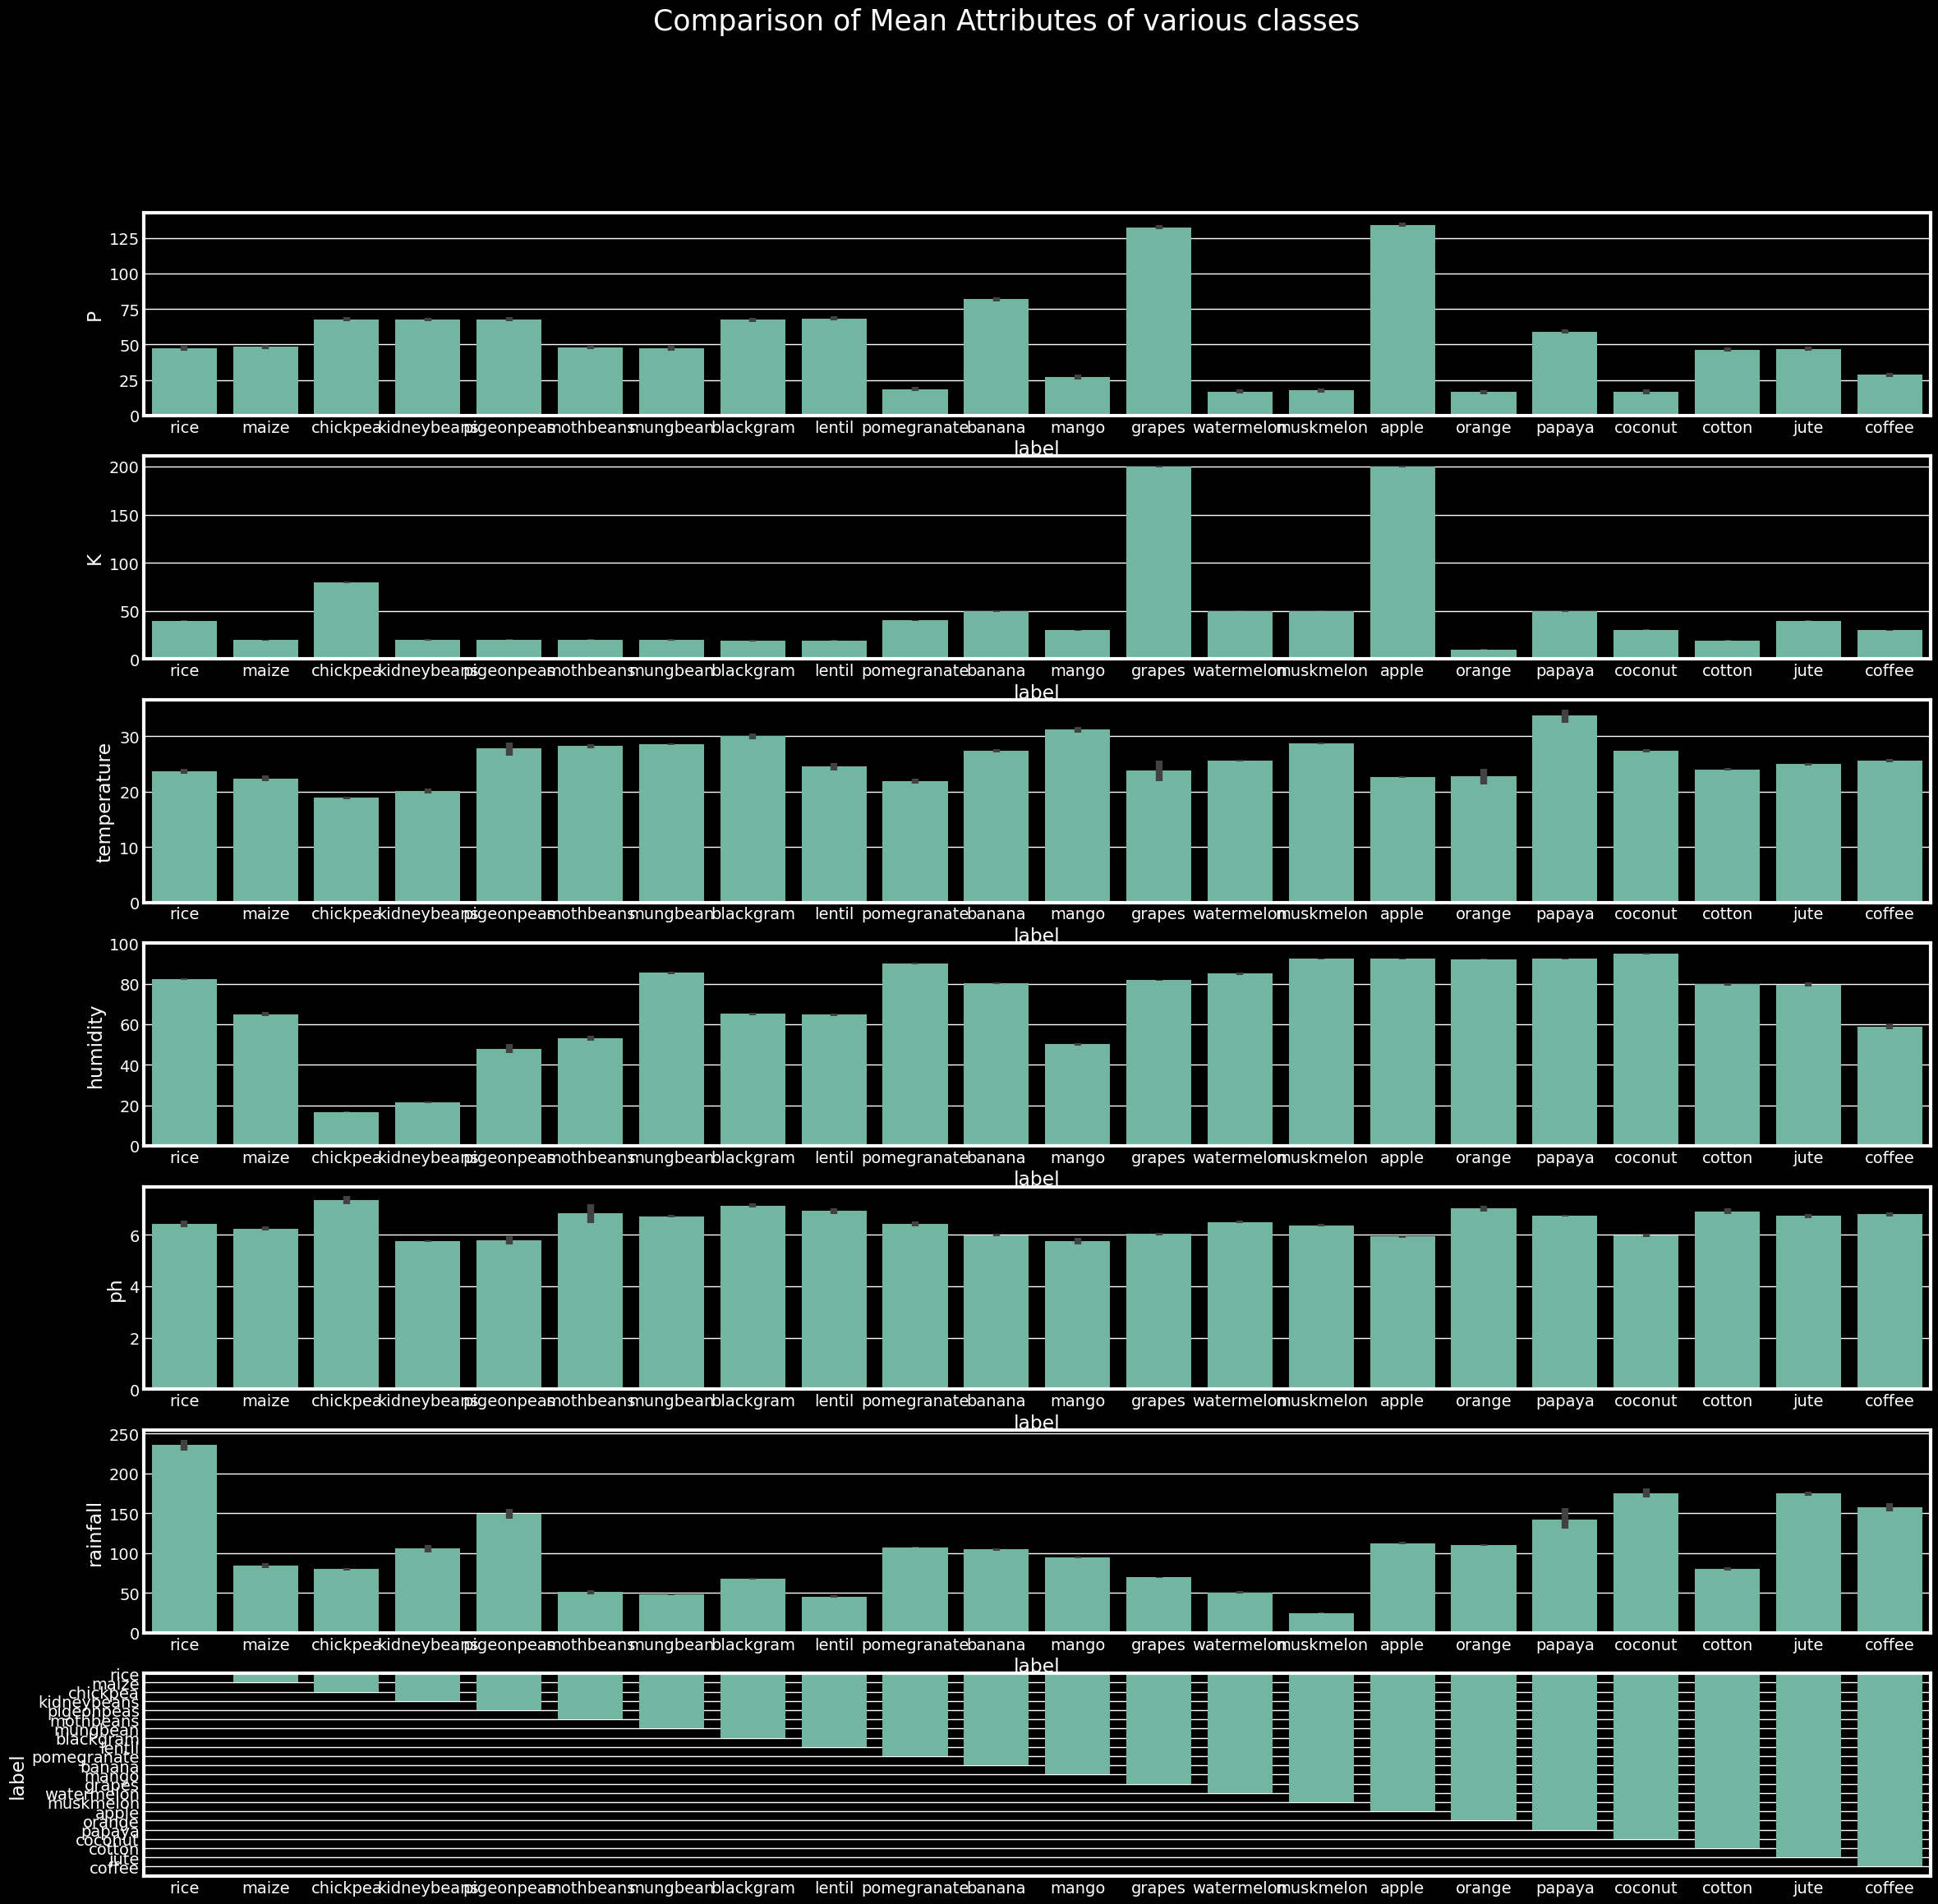

In [122]:
fig, ax = plt.subplots(7, 1, figsize=(25, 25))
for index, i in enumerate(data.columns[1:]):
    sns.barplot(data=data, x='label', y=i, ax=ax[index])
    plt.suptitle("Comparison of Mean Attributes of various classes", size=25)
    plt.xlabel("")

In [124]:
print(f'--------------------------------')
for i in data.columns[1:]:
    print(f'Top 5 Most {i} requiring crops:')
    print(f'--------------------------------')
    for j ,k in data.sort_values(by=i,ascending=False)[:5][['label',i]].values:
        print(f'{j} --> {k}')
    print(f'-------------------------------')


--------------------------------
Top 5 Most P requiring crops:
--------------------------------
grapes --> 145
grapes --> 145
grapes --> 145
grapes --> 145
apple --> 145
-------------------------------
Top 5 Most K requiring crops:
--------------------------------
grapes --> 205
apple --> 205
apple --> 205
grapes --> 205
apple --> 205
-------------------------------
Top 5 Most temperature requiring crops:
--------------------------------
papaya --> 43.67549305
papaya --> 43.36051537
papaya --> 43.30204933
papaya --> 43.08022702
papaya --> 43.03714283
-------------------------------
Top 5 Most humidity requiring crops:
--------------------------------
coconut --> 99.98187601
coconut --> 99.96906006
coconut --> 99.84671638
coconut --> 99.7240104
coconut --> 99.65809151
-------------------------------
Top 5 Most ph requiring crops:
--------------------------------
mothbeans --> 9.93509073
mothbeans --> 9.926212291
mothbeans --> 9.679240873
mothbeans --> 9.45949344
mothbeans --> 9.41600310

In [126]:
print(f'--------------------------------')
for i in data.columns[1:]:
    print(f'Top 5 Least {i} requiring crops:')
    print(f'--------------------------------')
    for j ,k in data.sort_values(by=i)[:5][['label',i]].values:
        print(f'{j} --> {k}')
    print(f'-------------------------------')


--------------------------------
Top 5 Least P requiring crops:
--------------------------------
pomegranate --> 5
pomegranate --> 5
watermelon --> 5
watermelon --> 5
watermelon --> 5
-------------------------------
Top 5 Least K requiring crops:
--------------------------------
orange --> 5
orange --> 5
orange --> 5
orange --> 5
orange --> 5
-------------------------------
Top 5 Least temperature requiring crops:
--------------------------------
grapes --> 8.825674745
grapes --> 9.467960445
grapes --> 9.535585543
grapes --> 9.724457611
grapes --> 9.851242629
-------------------------------
Top 5 Least humidity requiring crops:
--------------------------------
chickpea --> 14.25803981
chickpea --> 14.27327988
chickpea --> 14.2804191
chickpea --> 14.32313811
chickpea --> 14.33847406
-------------------------------
Top 5 Least ph requiring crops:
--------------------------------
mothbeans --> 3.504752314
mothbeans --> 3.510404312
mothbeans --> 3.5253661
mothbeans --> 3.532008668
mothbean

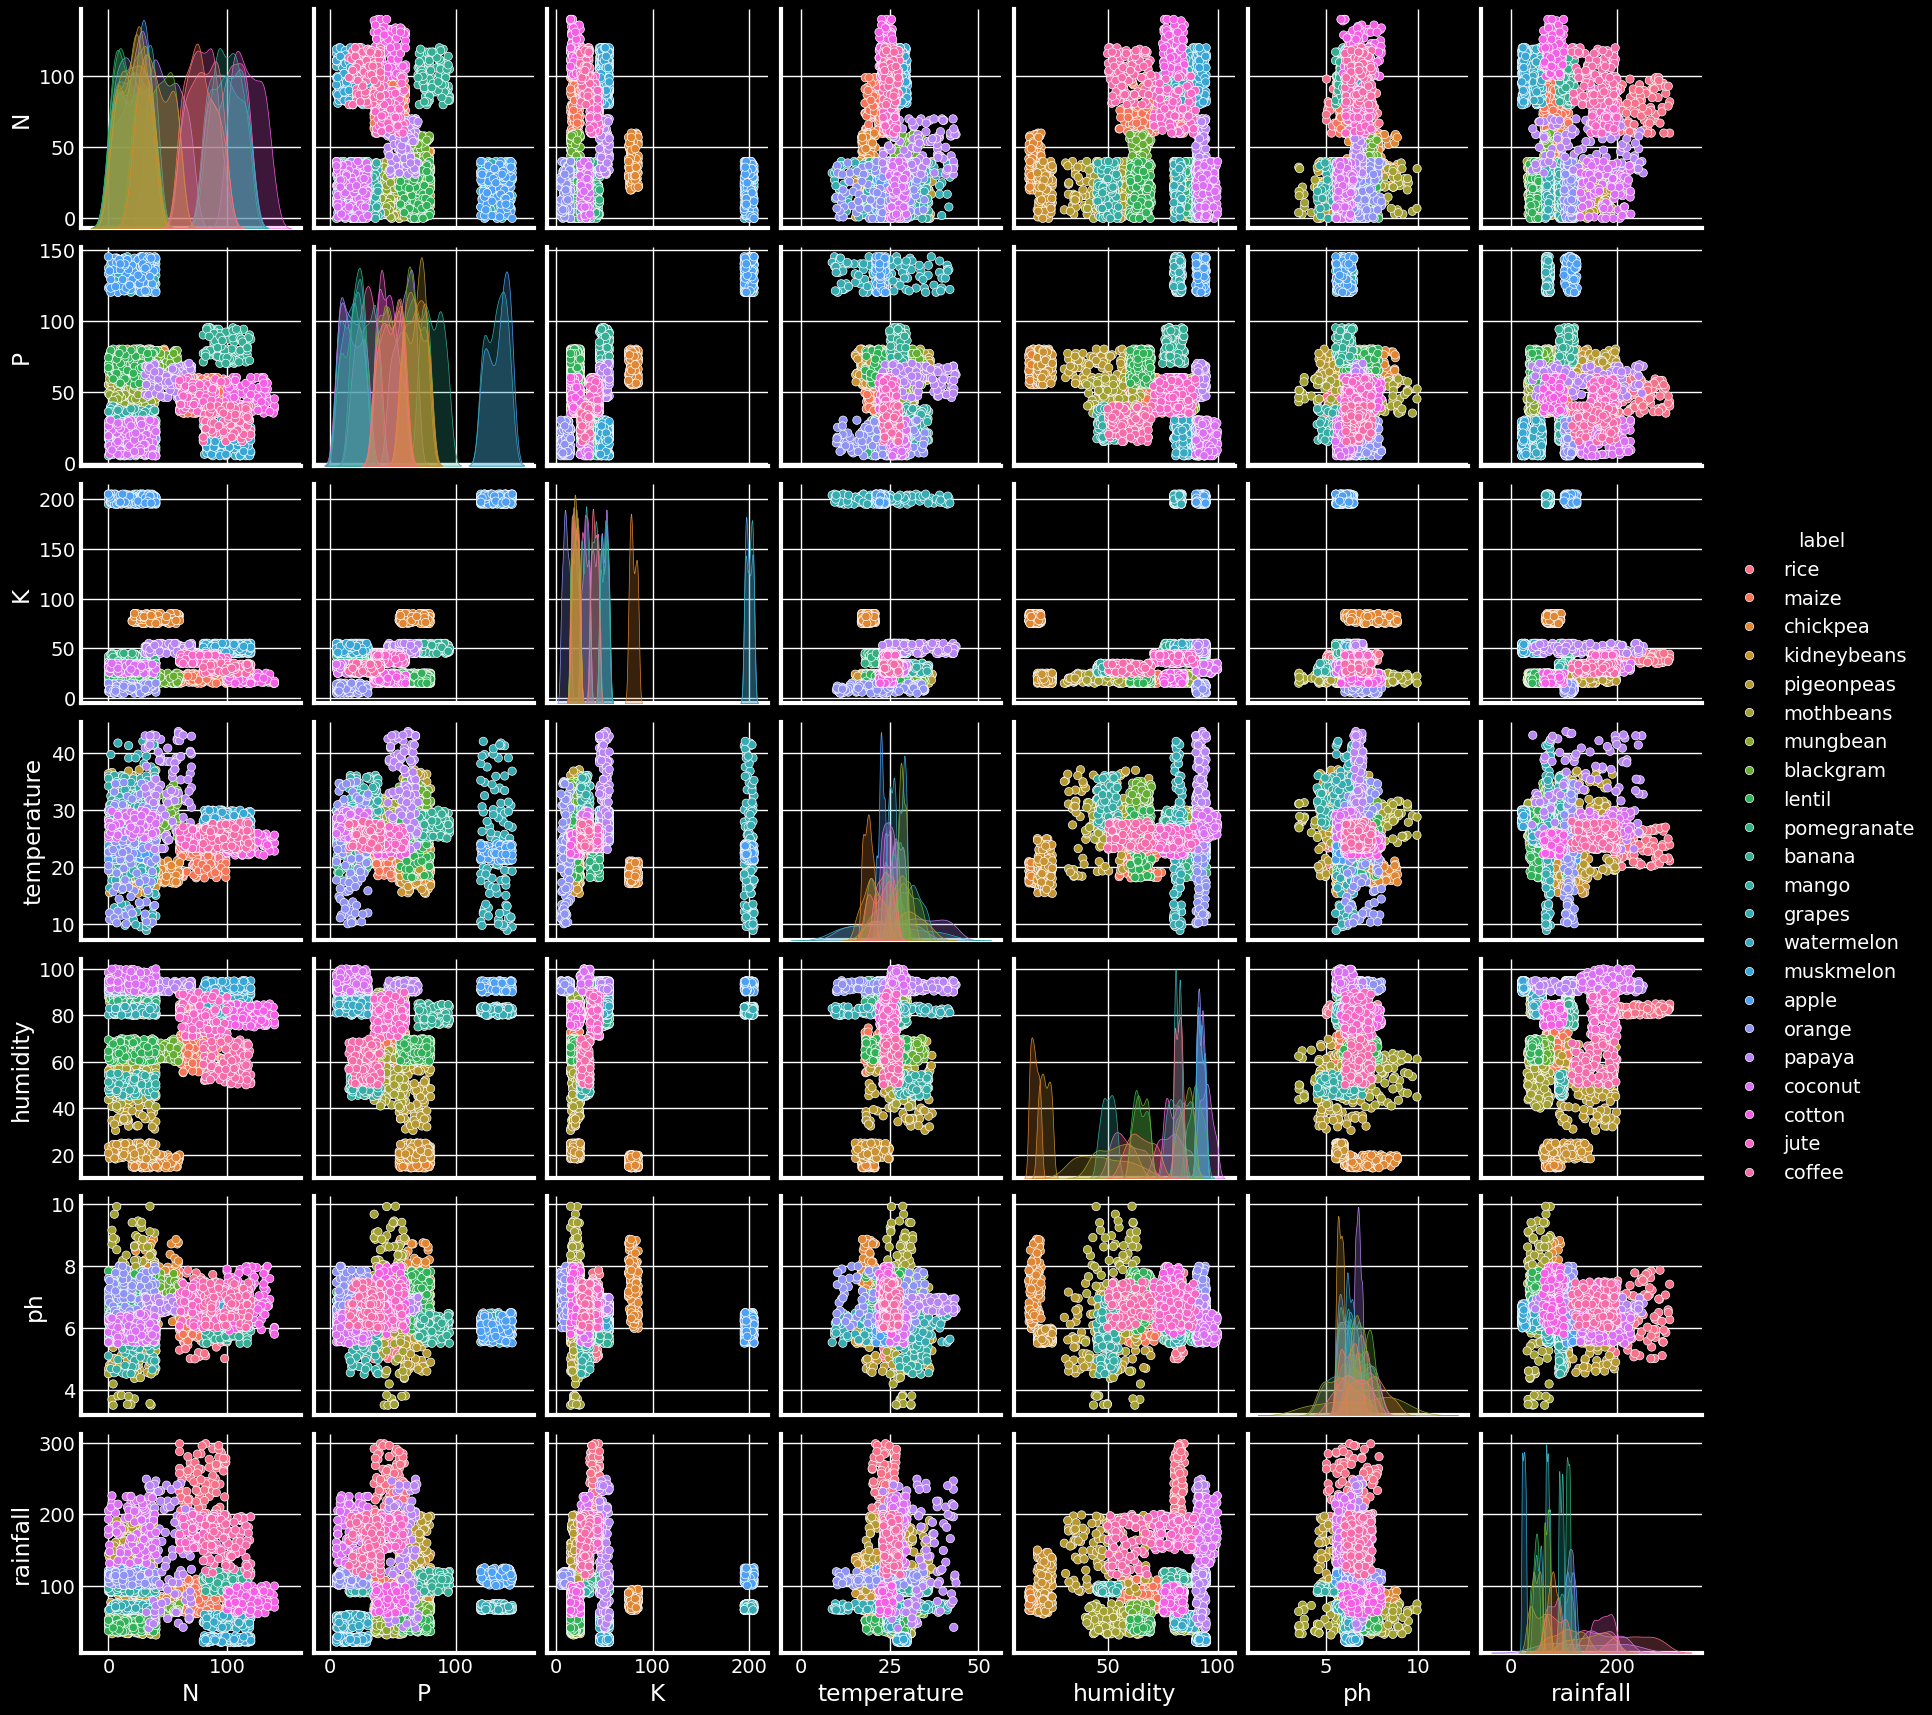

In [127]:
sns.pairplot(data=data,hue='label')
plt.show()

In [138]:
import pandas as pd
import seaborn as sns

In [139]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB
None


In [141]:
data = data.convert_objects(convert_numeric=True)
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True)
plt.show()

AttributeError: 'DataFrame' object has no attribute 'convert_objects'

In [143]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True)
plt.show()

ValueError: could not convert string to float: 'rice'

<Figure size 1000x1000 with 0 Axes>

In [134]:
import plotly.express as px

In [137]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
df_pca=pca.fit_transform(data.drop(['label'],axis=1))
df_pca=pd.DataFrame(df_pca)
fig = px.scatter(x=df_pca[0],y=df_pca[1],color=data['label'],title="Decomposed using PCA")
fig.show()


In [146]:
pca3=PCA(n_components=3)
df_pca3=pca3.fit_transform(data.drop(['label'],axis=1))
df_pca3=pd.DataFrame(df_pca3)
fig = px.scatter_3d(x=df_pca3[0],y=df_pca3[1],z=df_pca3[2],color=data['label'],title=f"Variance Explained : {pca3.explained_variance_ratio_.sum() * 100}%")
fig.show()

In [149]:
import pandas as pd

In [150]:
data = pd.read_csv("/content/Crop_recommendation (2).csv")

In [151]:
data = data.rename(columns={"Nitrogen": "nitrogen", "Phosphorus": "phosphorus"})

In [227]:
fig = px.scatter(x=data['N'], y=data['Phosphorus'], color=data['label'], title="Nitrogen VS Phosphorus")
fig.show()

In [223]:
fig = px.scatter(x=data['N'],y=data['Phosphorus'],color=data['label'],title="Nitrogen VS Phosphorus")
fig.show()

In [213]:
import pandas as pd
import plotly.express as px

In [215]:
print(data.columns)

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')


In [216]:
data = data.rename(columns={"P": "Phosphorus", "K": "Potassium"})

In [217]:
fig = px.scatter(x=data["Phosphorus"], y=data["Potassium"], color=data["label"], title="Phosphorus VS Potassium")
fig.show()

In [218]:
#would be required in future to get the names of crops back from encoded form
names = data['label'].unique()

In [219]:
X=data.drop(['label'],axis=1)
y=data['label']

In [220]:
#Splitting into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,shuffle = True, random_state = 42,stratify=y)

In [221]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_train=pd.DataFrame(X_train,columns=X.columns)
X_train.head()

N  Phosphorus  Potassium  temperature  humidity        ph  rainfall
0 -1.335936    0.417499  -0.535091     0.378274 -0.489416  0.105457 -1.006138
1  1.797538    0.874355  -0.061709    -0.056432  0.352421 -1.102431  0.037615
2 -1.308923    0.234757  -0.554816    -0.672000 -2.173304 -0.662710 -0.486121
3 -0.282441    0.752527  -0.554816    -1.248506 -2.271540 -1.031842 -0.422218
4 -1.173860   -1.013983  -0.712610    -1.765899  1.047107  0.007107  0.121738

In [169]:
X_test=scaler.transform(X_test)
X_test=pd.DataFrame(X_test,columns=X.columns)
X_test.head()

N         P         K  temperature  humidity        ph  rainfall
0 -1.065809  0.752527 -0.515367    -0.328943 -2.185815 -0.682134  0.169358
1 -1.038796 -0.435299 -0.535091     0.665518 -0.385148  2.209376 -0.598399
2 -0.741657  0.112928 -0.574540     1.416190 -0.154494  1.006982 -0.545022
3  0.257813  0.143385 -0.219503     0.108439  0.344686 -0.518753  1.239871
4  0.446902 -0.374384 -0.160330     0.051858  0.735100  1.112860  0.896488

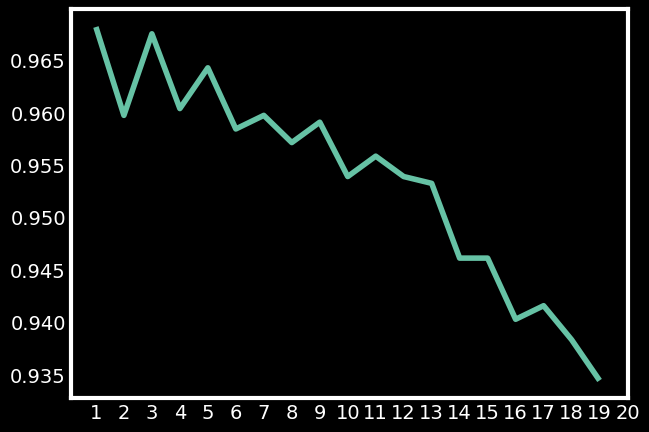

In [170]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
knn_scores=[]
for k in range(1,20):
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,X_train,y_train,cv=5)
    knn_scores.append(scores.mean())

x_ticks = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
x_labels = x_ticks

plt.plot([k for k in range(1,20)],knn_scores)
plt.xticks(ticks=x_ticks, labels=x_labels)
plt.grid()

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        30
      banana       1.00      1.00      1.00        30
   blackgram       0.93      0.93      0.93        30
    chickpea       1.00      1.00      1.00        30
     coconut       1.00      1.00      1.00        30
      coffee       1.00      1.00      1.00        30
      cotton       0.94      1.00      0.97        30
      grapes       1.00      1.00      1.00        30
        jute       0.86      1.00      0.92        30
 kidneybeans       0.97      1.00      0.98        30
      lentil       0.90      0.90      0.90        30
       maize       1.00      0.93      0.97        30
       mango       0.97      1.00      0.98        30
   mothbeans       0.97      0.93      0.95        30
    mungbean       1.00      1.00      1.00        30
   muskmelon       1.00      1.00      1.00        30
      orange       1.00      1.00      1.00        30
      papaya       1.00    

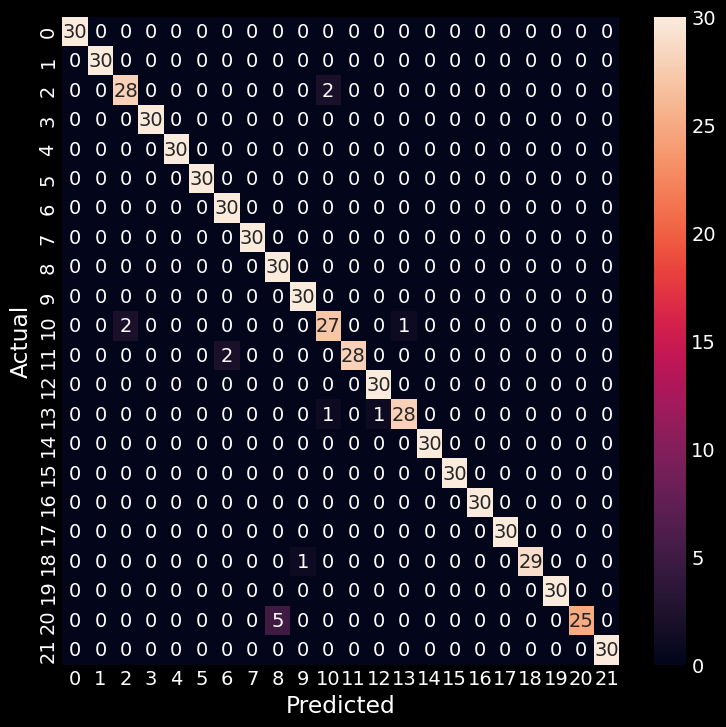

In [171]:
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
from sklearn.metrics import confusion_matrix
confusion_knn=confusion_matrix(y_test,knn.predict(X_test))
plt.figure(figsize=(8,8))
sns.heatmap(confusion_knn,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
from sklearn.metrics import classification_report
print(classification_report(y_test,knn.predict(X_test)))


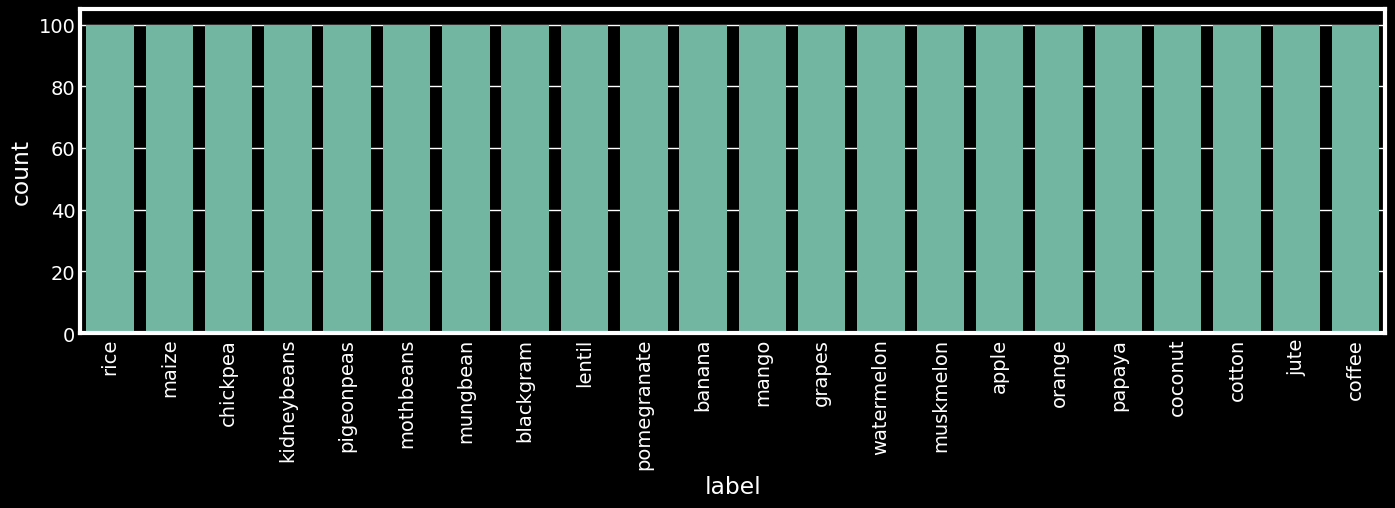

In [173]:
plt.figure(figsize=(15,4))
sns.countplot(data=data,x='label')
plt.xticks(rotation = 90)
plt.show()

In [174]:
y = data['label']
# encode = preprocessing.LabelEncoder()
# y = encode.fit_transform(Y)
print("Label length: ",len(y))

Label length:  2200


### Descriptive Statistics

In [175]:
# lets check the Summary for all the crops

print("Average Ratio of Nitrogen in the Soil : {0:.2f}".format(data['N'].mean()))
print("Average Ratio of Phosphorous in the Soil : {0:.2f}".format(data['P'].mean()))
print("Average Ratio of Potassium in the Soil : {0:.2f}".format(data['K'].mean()))
print("Average Tempature in Celsius : {0:.2f}".format(data['temperature'].mean()))
print("Average Relative Humidity in % : {0:.2f}".format(data['humidity'].mean()))
print("Average PH Value of the soil : {0:.2f}".format(data['ph'].mean()))
print("Average Rainfall in mm : {0:.2f}".format(data['rainfall'].mean()))

Average Ratio of Nitrogen in the Soil : 50.55
Average Ratio of Phosphorous in the Soil : 53.36
Average Ratio of Potassium in the Soil : 48.15
Average Tempature in Celsius : 25.62
Average Relative Humidity in % : 71.48
Average PH Value of the soil : 6.47
Average Rainfall in mm : 103.46


In [176]:
y = data['label']
y.head()

0    rice
1    rice
2    rice
3    rice
4    rice
Name: label, dtype: object

array([[<Axes: title={'center': 'N'}>, <Axes: title={'center': 'P'}>,
        <Axes: title={'center': 'K'}>,
        <Axes: title={'center': 'temperature'}>],
       [<Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'ph'}>,
        <Axes: title={'center': 'rainfall'}>, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >, <Axes: >]], dtype=object)

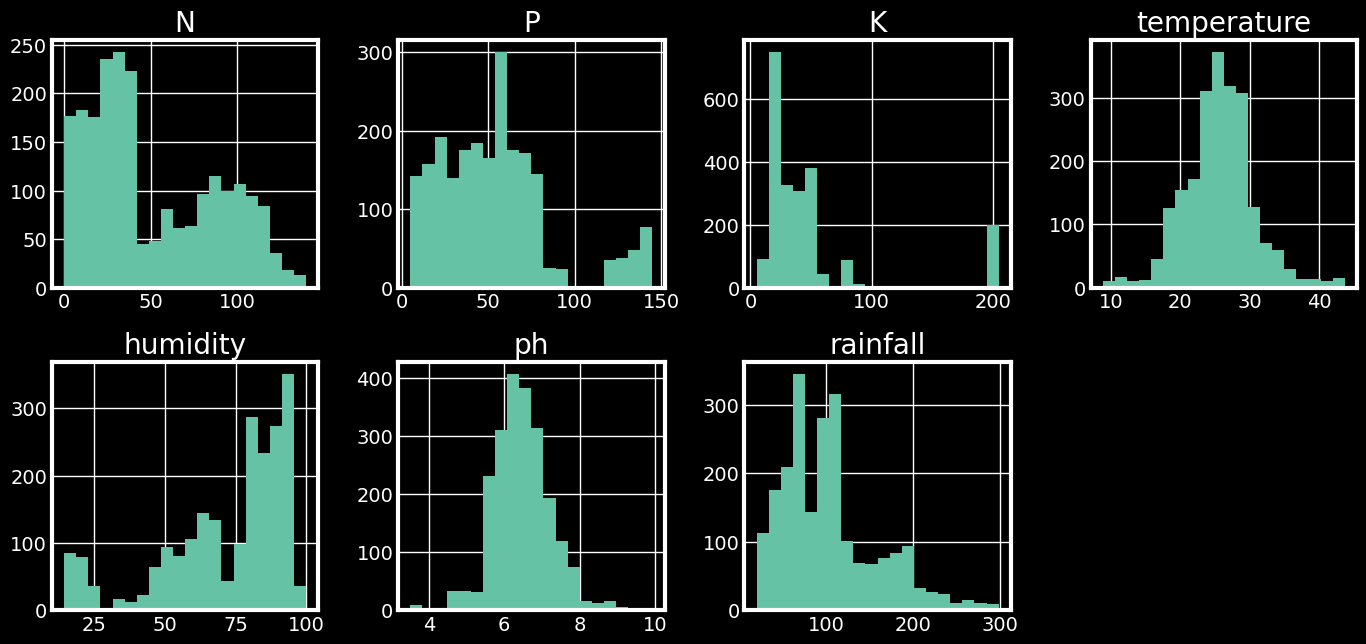

In [177]:
data.hist(figsize=(15,15), layout=(4,4), bins=20)

In [179]:
# lets check the Summary Statistics for each of the Crops

@interact
def summary(crops = list(data['label'].value_counts().index)):
    x = data[data['label'] == crops]
    print("---------------------------------------------")
    print("Statistics for Nitrogen")
    print("Minimum Nitrigen required :", x['N'].min())
    print("Average Nitrogen required :", x['N'].mean())
    print("Maximum Nitrogen required :", x['N'].max())
    print("---------------------------------------------")
    print("Statistics for Phosphorous")
    print("Minimum Phosphorous required :", x['P'].min())
    print("Average Phosphorous required :", x['P'].mean())
    print("Maximum Phosphorous required :", x['P'].max())
    print("---------------------------------------------")
    print("Statistics for Potassium")
    print("Minimum Potassium required :", x['K'].min())
    print("Average Potassium required :", x['K'].mean())
    print("Maximum Potassium required :", x['K'].max())
    print("---------------------------------------------")
    print("Statistics for Temperature")
    print("Minimum Temperature required : {0:.2f}".format(x['temperature'].min()))
    print("Average Temperature required : {0:.2f}".format(x['temperature'].mean()))
    print("Maximum Temperature required : {0:.2f}".format(x['temperature'].max()))
    print("---------------------------------------------")
    print("Statistics for Humidity")
    print("Minimum Humidity required : {0:.2f}".format(x['humidity'].min()))
    print("Average Humidity required : {0:.2f}".format(x['humidity'].mean()))
    print("Maximum Humidity required : {0:.2f}".format(x['humidity'].max()))
    print("---------------------------------------------")
    print("Statistics for PH")
    print("Minimum PH required : {0:.2f}".format(x['ph'].min()))
    print("Average PH required : {0:.2f}".format(x['ph'].mean()))
    print("Maximum PH required : {0:.2f}".format(x['ph'].max()))
    print("---------------------------------------------")
    print("Statistics for Rainfall")
    print("Minimum Rainfall required : {0:.2f}".format(x['rainfall'].min()))
    print("Average Rainfall required : {0:.2f}".format(x['rainfall'].mean()))
    print("Maximum Rainfall required : {0:.2f}".format(x['rainfall'].max()))

interactive(children=(Dropdown(description='crops', options=('rice', 'maize', 'jute', 'cotton', 'coconut', 'pa…

In [180]:
## Lets compare the Average Requirement for each crops with average conditions

@interact
def compare(conditions = ['N','P','K','temperature','ph','humidity','rainfall']):
    print("Average Value for", conditions,"is {0:.2f}".format(data[conditions].mean()))
    print("----------------------------------------------")
    print("Rice : {0:.2f}".format(data[(data['label'] == 'rice')][conditions].mean()))
    print("Black Grams : {0:.2f}".format(data[data['label'] == 'blackgram'][conditions].mean()))
    print("Banana : {0:.2f}".format(data[(data['label'] == 'banana')][conditions].mean()))
    print("Jute : {0:.2f}".format(data[data['label'] == 'jute'][conditions].mean()))
    print("Coconut : {0:.2f}".format(data[(data['label'] == 'coconut')][conditions].mean()))
    print("Apple : {0:.2f}".format(data[data['label'] == 'apple'][conditions].mean()))
    print("Papaya : {0:.2f}".format(data[(data['label'] == 'papaya')][conditions].mean()))
    print("Muskmelon : {0:.2f}".format(data[data['label'] == 'muskmelon'][conditions].mean()))
    print("Grapes : {0:.2f}".format(data[(data['label'] == 'grapes')][conditions].mean()))
    print("Watermelon : {0:.2f}".format(data[data['label'] == 'watermelon'][conditions].mean()))
    print("Kidney Beans: {0:.2f}".format(data[(data['label'] == 'kidneybeans')][conditions].mean()))
    print("Mung Beans : {0:.2f}".format(data[data['label'] == 'mungbean'][conditions].mean()))
    print("Oranges : {0:.2f}".format(data[(data['label'] == 'orange')][conditions].mean()))
    print("Chick Peas : {0:.2f}".format(data[data['label'] == 'chickpea'][conditions].mean()))
    print("Lentils : {0:.2f}".format(data[(data['label'] == 'lentil')][conditions].mean()))
    print("Cotton : {0:.2f}".format(data[data['label'] == 'cotton'][conditions].mean()))
    print("Maize : {0:.2f}".format(data[(data['label'] == 'maize')][conditions].mean()))
    print("Moth Beans : {0:.2f}".format(data[data['label'] == 'mothbeans'][conditions].mean()))
    print("Pigeon Peas : {0:.2f}".format(data[(data['label'] == 'pigeonpeas')][conditions].mean()))
    print("Mango : {0:.2f}".format(data[data['label'] == 'mango'][conditions].mean()))
    print("Pomegranate : {0:.2f}".format(data[(data['label'] == 'pomegranate')][conditions].mean()))
    print("Coffee : {0:.2f}".format(data[data['label'] == 'coffee'][conditions].mean()))

interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'ph', 'humidit…

In [181]:
# lets make this funtion more Intuitive

@interact
def compare(conditions = ['N','P','K','temperature','ph','humidity','rainfall']):
    print("Crops which require greater than average", conditions,'\n')
    print(data[data[conditions] > data[conditions].mean()]['label'].unique())
    print("----------------------------------------------")
    print("Crops which require less than average", conditions,'\n')
    print(data[data[conditions] <= data[conditions].mean()]['label'].unique())

interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'ph', 'humidit…

### Analyzing Agricultural Conditions

<ipython-input-182-7c71b0c27016>:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-182-7c71b0c27016>:11: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-182-7c71b0c27016>:16: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to u

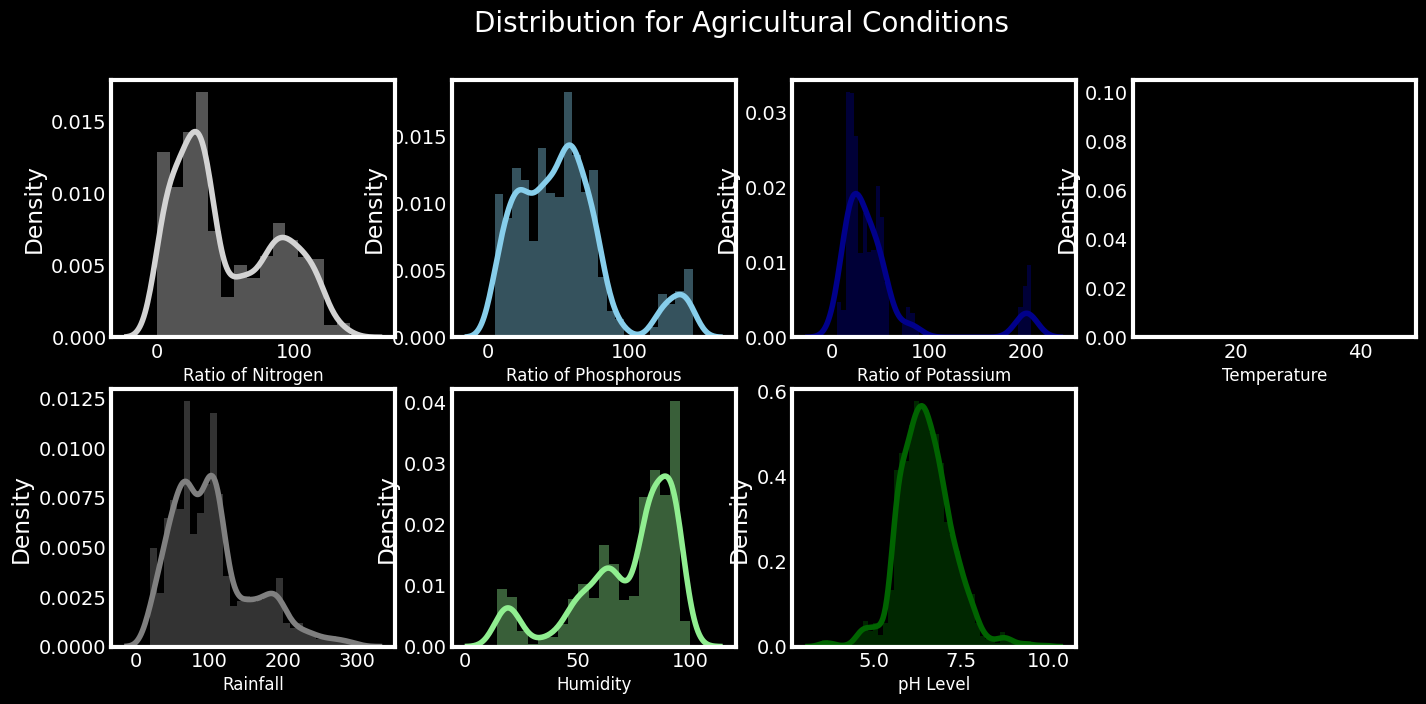

In [182]:
### Lets check the distribution of Agricultural Conditions

plt.rcParams['figure.figsize'] = (15, 7)

plt.subplot(2, 4, 1)
sns.distplot(data['N'], color = 'lightgrey')
plt.xlabel('Ratio of Nitrogen', fontsize = 12)
plt.grid()

plt.subplot(2, 4, 2)
sns.distplot(data['P'], color = 'skyblue')
plt.xlabel('Ratio of Phosphorous', fontsize = 12)
plt.grid()

plt.subplot(2, 4, 3)
sns.distplot(data['K'], color ='darkblue')
plt.xlabel('Ratio of Potassium', fontsize = 12)
plt.grid()

plt.subplot(2, 4, 4)
sns.distplot(data['temperature'], color = 'black')
plt.xlabel('Temperature', fontsize = 12)
plt.grid()

plt.subplot(2, 4, 5)
sns.distplot(data['rainfall'], color = 'grey')
plt.xlabel('Rainfall', fontsize = 12)
plt.grid()

plt.subplot(2, 4, 6)
sns.distplot(data['humidity'], color = 'lightgreen')
plt.xlabel('Humidity', fontsize = 12)
plt.grid()

plt.subplot(2, 4, 7)
sns.distplot(data['ph'], color = 'darkgreen')
plt.xlabel('pH Level', fontsize = 12)
plt.grid()

plt.suptitle('Distribution for Agricultural Conditions', fontsize = 20)
plt.show()


In [183]:
## Lets find out some Interesting Facts

print("Some Interesting Patterns")
print("---------------------------------")
print("Crops which requires very High Ratio of Nitrogen Content in Soil:", data[data['N'] > 120]['label'].unique())
print("Crops which requires very High Ratio of Phosphorous Content in Soil:", data[data['P'] > 100]['label'].unique())
print("Crops which requires very High Ratio of Potassium Content in Soil:", data[data['K'] > 200]['label'].unique())
print("Crops which requires very High Rainfall:", data[data['rainfall'] > 200]['label'].unique())
print("Crops which requires very Low Temperature :", data[data['temperature'] < 10]['label'].unique())
print("Crops which requires very High Temperature :", data[data['temperature'] > 40]['label'].unique())
print("Crops which requires very Low Humidity:", data[data['humidity'] < 20]['label'].unique())
print("Crops which requires very Low pH:", data[data['ph'] < 4]['label'].unique())
print("Crops which requires very High pH:", data[data['ph'] > 9]['label'].unique())

Some Interesting Patterns
---------------------------------
Crops which requires very High Ratio of Nitrogen Content in Soil: ['cotton']
Crops which requires very High Ratio of Phosphorous Content in Soil: ['grapes' 'apple']
Crops which requires very High Ratio of Potassium Content in Soil: ['grapes' 'apple']
Crops which requires very High Rainfall: ['rice' 'papaya' 'coconut']
Crops which requires very Low Temperature : ['grapes']
Crops which requires very High Temperature : ['grapes' 'papaya']
Crops which requires very Low Humidity: ['chickpea' 'kidneybeans']
Crops which requires very Low pH: ['mothbeans']
Crops which requires very High pH: ['mothbeans']


In [184]:
### Lets understand which crops can only be Grown in Summer Season, Winter Season and Rainy Season

print("Summer Crops")
print(data[(data['temperature'] > 30) & (data['humidity'] > 50)]['label'].unique())
print("-----------------------------------")
print("Winter Crops")
print(data[(data['temperature'] < 20) & (data['humidity'] > 30)]['label'].unique())
print("-----------------------------------")
print("Rainy Crops")
print(data[(data['rainfall'] > 200) & (data['humidity'] > 30)]['label'].unique())

Summer Crops
['pigeonpeas' 'mothbeans' 'blackgram' 'mango' 'grapes' 'orange' 'papaya']
-----------------------------------
Winter Crops
['maize' 'pigeonpeas' 'lentil' 'pomegranate' 'grapes' 'orange']
-----------------------------------
Rainy Crops
['rice' 'papaya' 'coconut']


In [185]:
from sklearn.cluster import KMeans #similar type of data using same group

# removing the label columns
x = data.drop(['label'], axis = 1)

# selecting all the values of the data
x = x.values

# checking the shape
print(x.shape)

print("shape of x", x.shape)
print("shape of y", y.shape)

(2200, 7)
shape of x (2200, 7)
shape of y (2200,)


### Clustering Similar Crops

In [186]:
### Lets try to Cluster these Crops

# lets import the warnings library so that we can avoid warnings
import warnings
warnings.filterwarnings('ignore')

# Lets select the Spending score, and Annual Income Columns from the Data
x = data.loc[:, ['N','P','K','temperature','ph','humidity','rainfall']].values

# let's check the shape of x
print(x.shape)

# lets convert this data into a dataframe
x_data  = pd.DataFrame(x)
x_data.head()

(2200, 7)


0     1     2          3         4          5           6
0  90.0  42.0  43.0  20.879744  6.502985  82.002744  202.935536
1  85.0  58.0  41.0  21.770462  7.038096  80.319644  226.655537
2  60.0  55.0  44.0  23.004459  7.840207  82.320763  263.964248
3  74.0  35.0  40.0  26.491096  6.980401  80.158363  242.864034
4  78.0  42.0  42.0  20.130175  7.628473  81.604873  262.717340

In [187]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [188]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [189]:
from sklearn.neighbors import KNeighborsClassifier
clf_knn = KNeighborsClassifier(n_neighbors=3)
clf_knn.fit(x_train,y_train)
y_pred1 = clf_knn.predict(x_test)
print("Accuracy Score of KNN:",accuracy_score(y_test,y_pred1))

from sklearn.svm import SVC
clf_svc = SVC()
clf_svc.fit(x_train,y_train)
y_pred2 = clf_svc.predict(x_test)
print("Accuracy Score of SVC:",accuracy_score(y_test,y_pred2))

from sklearn.tree import DecisionTreeClassifier
clf_dtc = DecisionTreeClassifier(criterion='entropy',random_state=7)
clf_dtc.fit(x_train,y_train)
y_pred3 = clf_dtc.predict(x_test)
print("Accuracy Score of decision tree:",accuracy_score(y_test,y_pred3))

from sklearn.ensemble import RandomForestClassifier
clf_rfc = RandomForestClassifier(random_state=1)
clf_rfc.fit(x_train, y_train)
y_pred4 = clf_rfc.predict(x_test)
print("Accuracy Score of Random Forest:",accuracy_score(y_test,y_pred4))

Accuracy Score of KNN: 0.9772727272727273
Accuracy Score of SVC: 0.9772727272727273
Accuracy Score of decision tree: 0.9931818181818182
Accuracy Score of Random Forest: 0.9977272727272727


In [190]:
y_train_pred = clf_rfc.predict(x_train)
print("Accuracy Score of Random Forest:",accuracy_score(y_train,y_train_pred))

Accuracy Score of Random Forest: 1.0


In [191]:
output = pd.DataFrame({'Real_class': y_test, 'Predicted_class': y_pred4})
output.head()

Real_class Predicted_class
1320  watermelon      watermelon
1367  watermelon      watermelon
1291      grapes          grapes
264     chickpea        chickpea
728    blackgram       blackgram

In [192]:
input = np.array([[90,42,43,20.879744,82.002744,6.502985,202.935536]])
clf_rfc.predict(input)

array(['coffee'], dtype=object)

In [193]:
output.to_csv('Optimizing Agricultural Production.csv', index=False)
print("Submission was successfully saved!")

Submission was successfully saved!


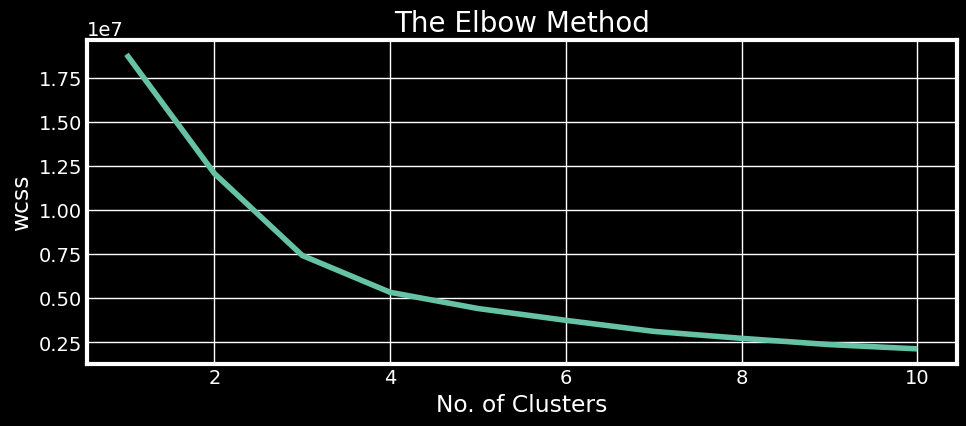

In [194]:
# lets determine the Optimum Number of Clusters within the Dataset

from sklearn.cluster import KMeans
plt.rcParams['figure.figsize'] = (10, 4)

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x)
    wcss.append(km.inertia_)

# lets plot the results
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

In [195]:
# lets implement the K Means algorithm to perform Clustering analysis
km = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

# lets find out the Results
a = data['label']
y_means = pd.DataFrame(y_means)
z = pd.concat([y_means, a], axis = 1)
z = z.rename(columns = {0: 'cluster'})

# lets check the Clusters of each Crops
print("Lets check the Results After Applying the K Means Clustering Analysis \n")
print("Crops in First Cluster:", z[z['cluster'] == 0]['label'].unique())
print("---------------------------------------------------------------")
print("Crops in Second Cluster:", z[z['cluster'] == 1]['label'].unique())
print("---------------------------------------------------------------")
print("Crops in Third Cluster:", z[z['cluster'] == 2]['label'].unique())
print("---------------------------------------------------------------")
print("Crops in Forth Cluster:", z[z['cluster'] == 3]['label'].unique())

Lets check the Results After Applying the K Means Clustering Analysis 

Crops in First Cluster: ['maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans' 'mungbean'
 'blackgram' 'lentil' 'pomegranate' 'mango' 'orange' 'papaya' 'coconut']
---------------------------------------------------------------
Crops in Second Cluster: ['maize' 'banana' 'watermelon' 'muskmelon' 'papaya' 'cotton' 'coffee']
---------------------------------------------------------------
Crops in Third Cluster: ['grapes' 'apple']
---------------------------------------------------------------
Crops in Forth Cluster: ['rice' 'pigeonpeas' 'papaya' 'coconut' 'jute' 'coffee']


In [196]:
# Hard Clustering

print("Results for Hard Clustering\n")
counts = z[z['cluster'] == 0]['label'].value_counts()
d = z.loc[z['label'].isin(counts.index[counts >= 50])]
d = d['label'].value_counts()
print("Crops in Cluster 1:", list(d.index))
print("--------------------------------------------------")
counts = z[z['cluster'] == 1]['label'].value_counts()
d = z.loc[z['label'].isin(counts.index[counts >= 50])]
d = d['label'].value_counts()
print("Crops in Cluster 2:", list(d.index))
print("--------------------------------------------------")
counts = z[z['cluster'] == 2]['label'].value_counts()
d = z.loc[z['label'].isin(counts.index[counts >= 50])]
d = d['label'].value_counts()
print("Crops in Cluster 3:", list(d.index))
print("--------------------------------------------------")
counts = z[z['cluster'] == 3]['label'].value_counts()
d = z.loc[z['label'].isin(counts.index[counts >= 50])]
d = d['label'].value_counts()
print("Crops in Cluster 4:", list(d.index))

Results for Hard Clustering

Crops in Cluster 1: ['chickpea', 'kidneybeans', 'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate', 'mango', 'orange']
--------------------------------------------------
Crops in Cluster 2: ['maize', 'banana', 'watermelon', 'muskmelon', 'cotton']
--------------------------------------------------
Crops in Cluster 3: ['grapes', 'apple']
--------------------------------------------------
Crops in Cluster 4: ['rice', 'pigeonpeas', 'papaya', 'coconut', 'jute', 'coffee']


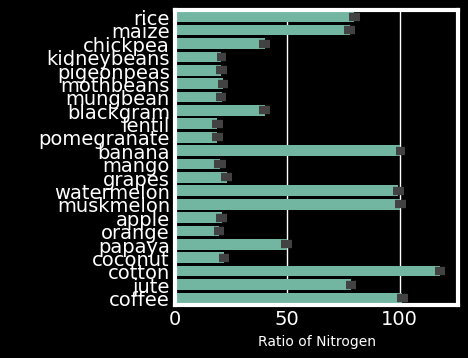

In [197]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
plt.rcParams['figure.figsize'] = (15, 8)

# Create a subplot
plt.subplot(2, 4, 1)

# Specify x and y parameters for the barplot
sns.barplot(x='N', y='label', data=data)

# Add labels
plt.ylabel(' ')
plt.xlabel('Ratio of Nitrogen', fontsize=10)

# Show the plot
plt.show()


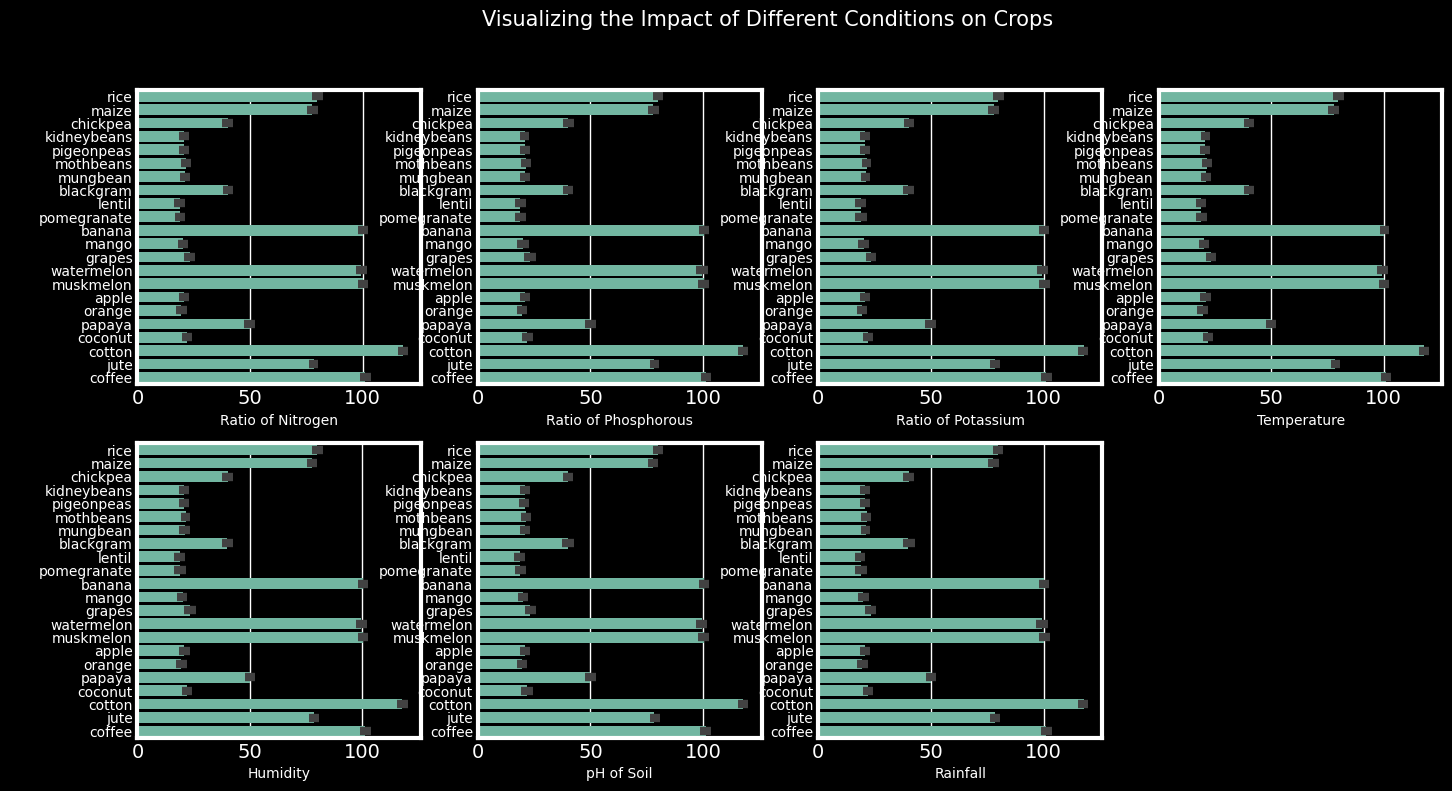

In [198]:
### Data Visualizations

plt.rcParams['figure.figsize'] = (15, 8)

plt.subplot(2, 4, 1)
sns.barplot(x='N', y='label', data=data)
plt.ylabel(' ')
plt.xlabel('Ratio of Nitrogen', fontsize = 10)
plt.yticks(fontsize = 10)

plt.subplot(2, 4, 2)
sns.barplot(x='N', y='label', data=data)
plt.ylabel(' ')
plt.xlabel('Ratio of Phosphorous', fontsize = 10)
plt.yticks(fontsize = 10)

plt.subplot(2, 4, 3)
sns.barplot(x='N', y='label', data=data)
plt.ylabel(' ')
plt.xlabel('Ratio of Potassium', fontsize = 10)
plt.yticks(fontsize = 10)

plt.subplot(2, 4, 4)
sns.barplot(x='N', y='label', data=data)
plt.ylabel(' ')
plt.xlabel('Temperature', fontsize = 10)
plt.yticks(fontsize = 10)

plt.subplot(2, 4, 5)
sns.barplot(x='N', y='label', data=data)
plt.ylabel(' ')
plt.xlabel('Humidity', fontsize = 10)
plt.yticks(fontsize = 10)

plt.subplot(2, 4, 6)
sns.barplot(x='N', y='label', data=data)
plt.ylabel(' ')
plt.xlabel('pH of Soil', fontsize = 10)
plt.yticks(fontsize = 10)

plt.subplot(2, 4, 7)
sns.barplot(x='N', y='label', data=data)
plt.ylabel(' ')
plt.xlabel('Rainfall', fontsize = 10)
plt.yticks(fontsize = 10)

plt.suptitle('Visualizing the Impact of Different Conditions on Crops', fontsize = 15)
plt.show()

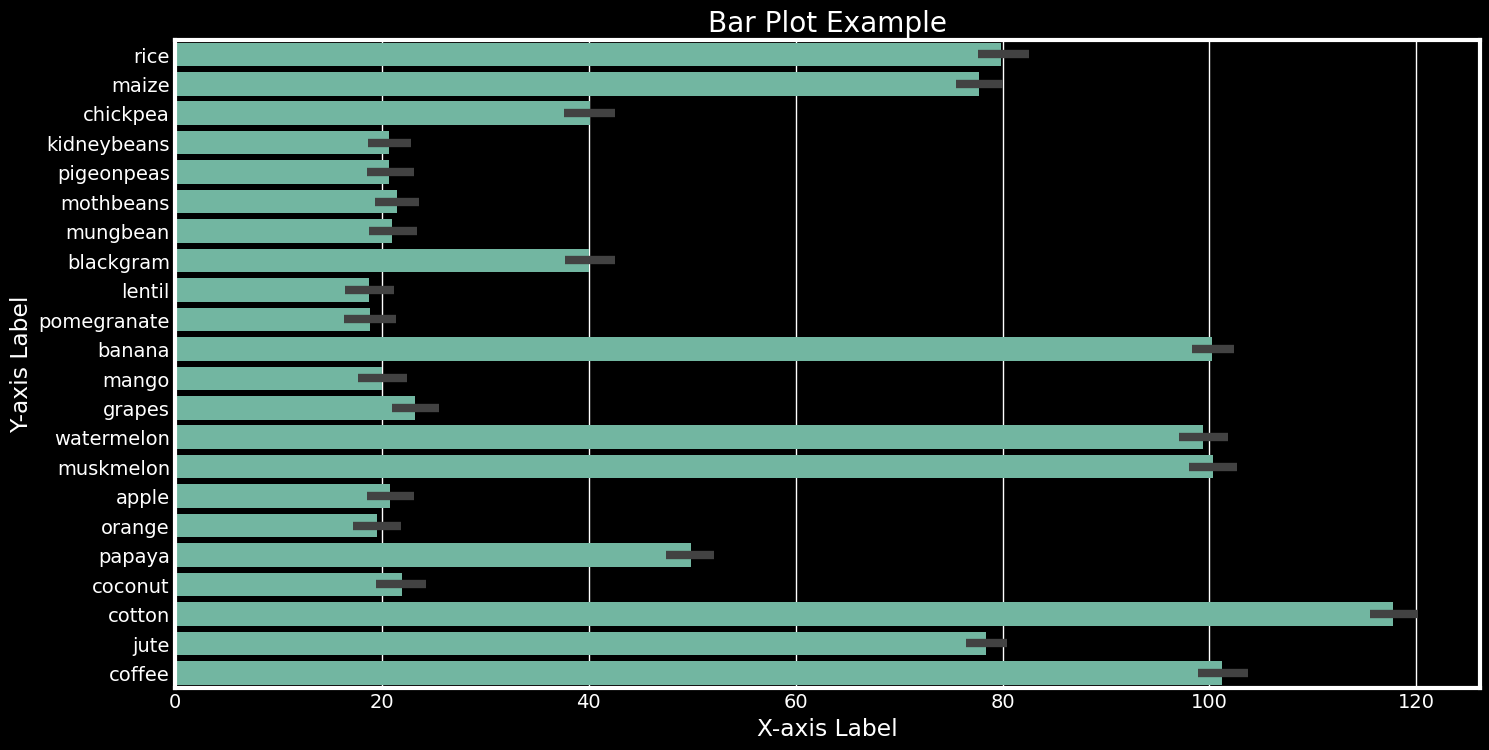

In [199]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
sns.barplot(x=data['N'], y=data['label'])

# Adding labels and title
plt.xlabel('X-axis Label')  # Replace 'X-axis Label' with your desired label
plt.ylabel('Y-axis Label')  # Replace 'Y-axis Label' with your desired label
plt.title('Bar Plot Example')  # Replace 'Bar Plot Example' with your desired title

# Show the plot
plt.show()


### visualizing the Hidden Patterns

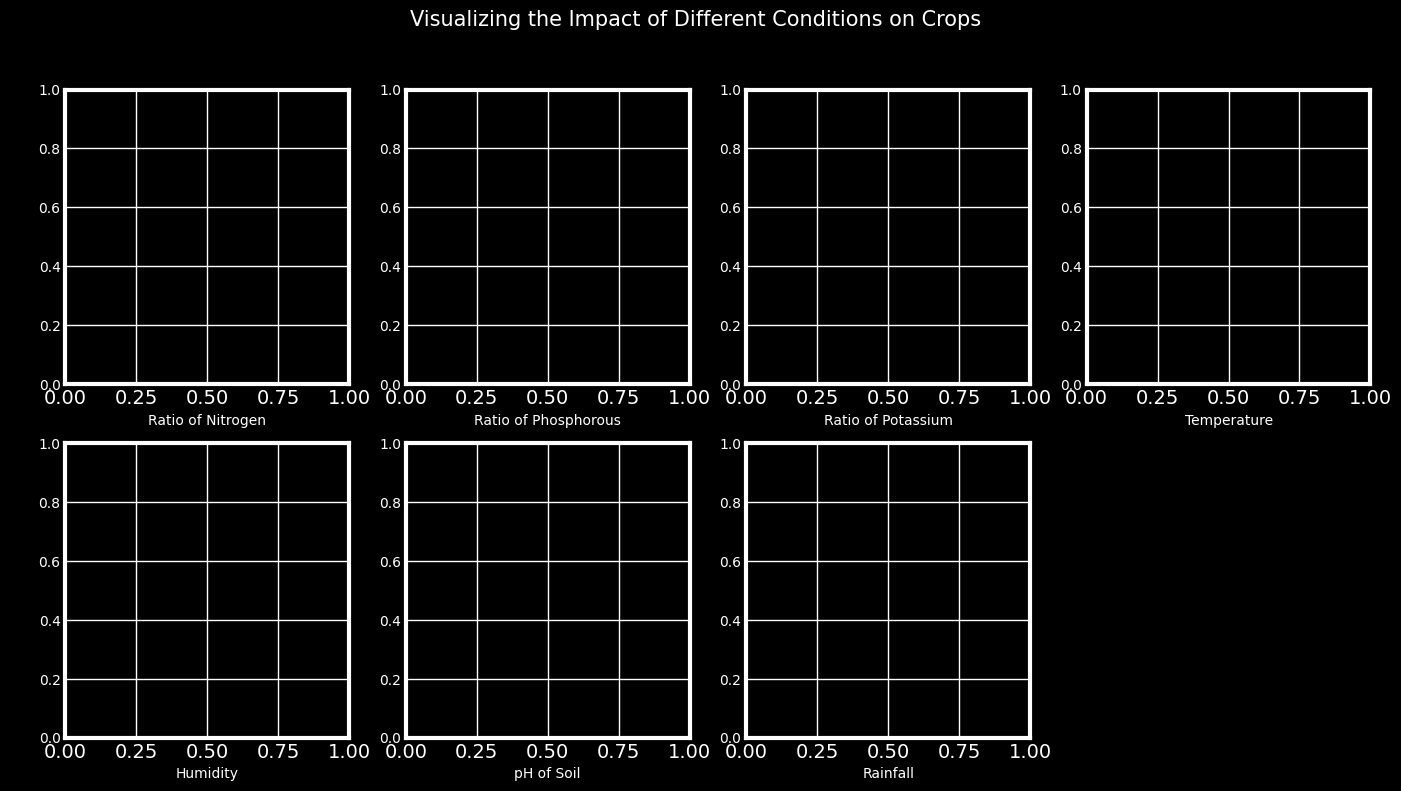

In [200]:
### Data Visualizations
import seaborn as sns
plt.rcParams['figure.figsize'] = (15, 8)

plt.subplot(2, 4, 1)
# sns.barplot(data['N'], data['label'])
plt.ylabel(' ')
plt.xlabel('Ratio of Nitrogen', fontsize = 10)
plt.yticks(fontsize = 10)

plt.subplot(2, 4, 2)
# sns.barplot(data['P'], data['label'])
plt.ylabel(' ')
plt.xlabel('Ratio of Phosphorous', fontsize = 10)
plt.yticks(fontsize = 10)

plt.subplot(2, 4, 3)
# sns.barplot(data['K'], data['label'])
plt.ylabel(' ')
plt.xlabel('Ratio of Potassium', fontsize = 10)
plt.yticks(fontsize = 10)

plt.subplot(2, 4, 4)
# sns.barplot(data['temperature'], data['label'])
plt.ylabel(' ')
plt.xlabel('Temperature', fontsize = 10)
plt.yticks(fontsize = 10)

plt.subplot(2, 4, 5)
# sns.barplot(data['humidity'], data['label'])
plt.ylabel(' ')
plt.xlabel('Humidity', fontsize = 10)
plt.yticks(fontsize = 10)

plt.subplot(2, 4, 6)
# sns.barplot(data['ph'], data['label'])
plt.ylabel(' ')
plt.xlabel('pH of Soil', fontsize = 10)
plt.yticks(fontsize = 10)

plt.subplot(2, 4, 7)
# sns.barplot(data['rainfall'], data['label'])
plt.ylabel(' ')
plt.xlabel('Rainfall', fontsize = 10)
plt.yticks(fontsize = 10)

plt.suptitle('Visualizing the Impact of Different Conditions on Crops', fontsize = 15)
plt.show()

Text(0.5, 0, 'rainfall')

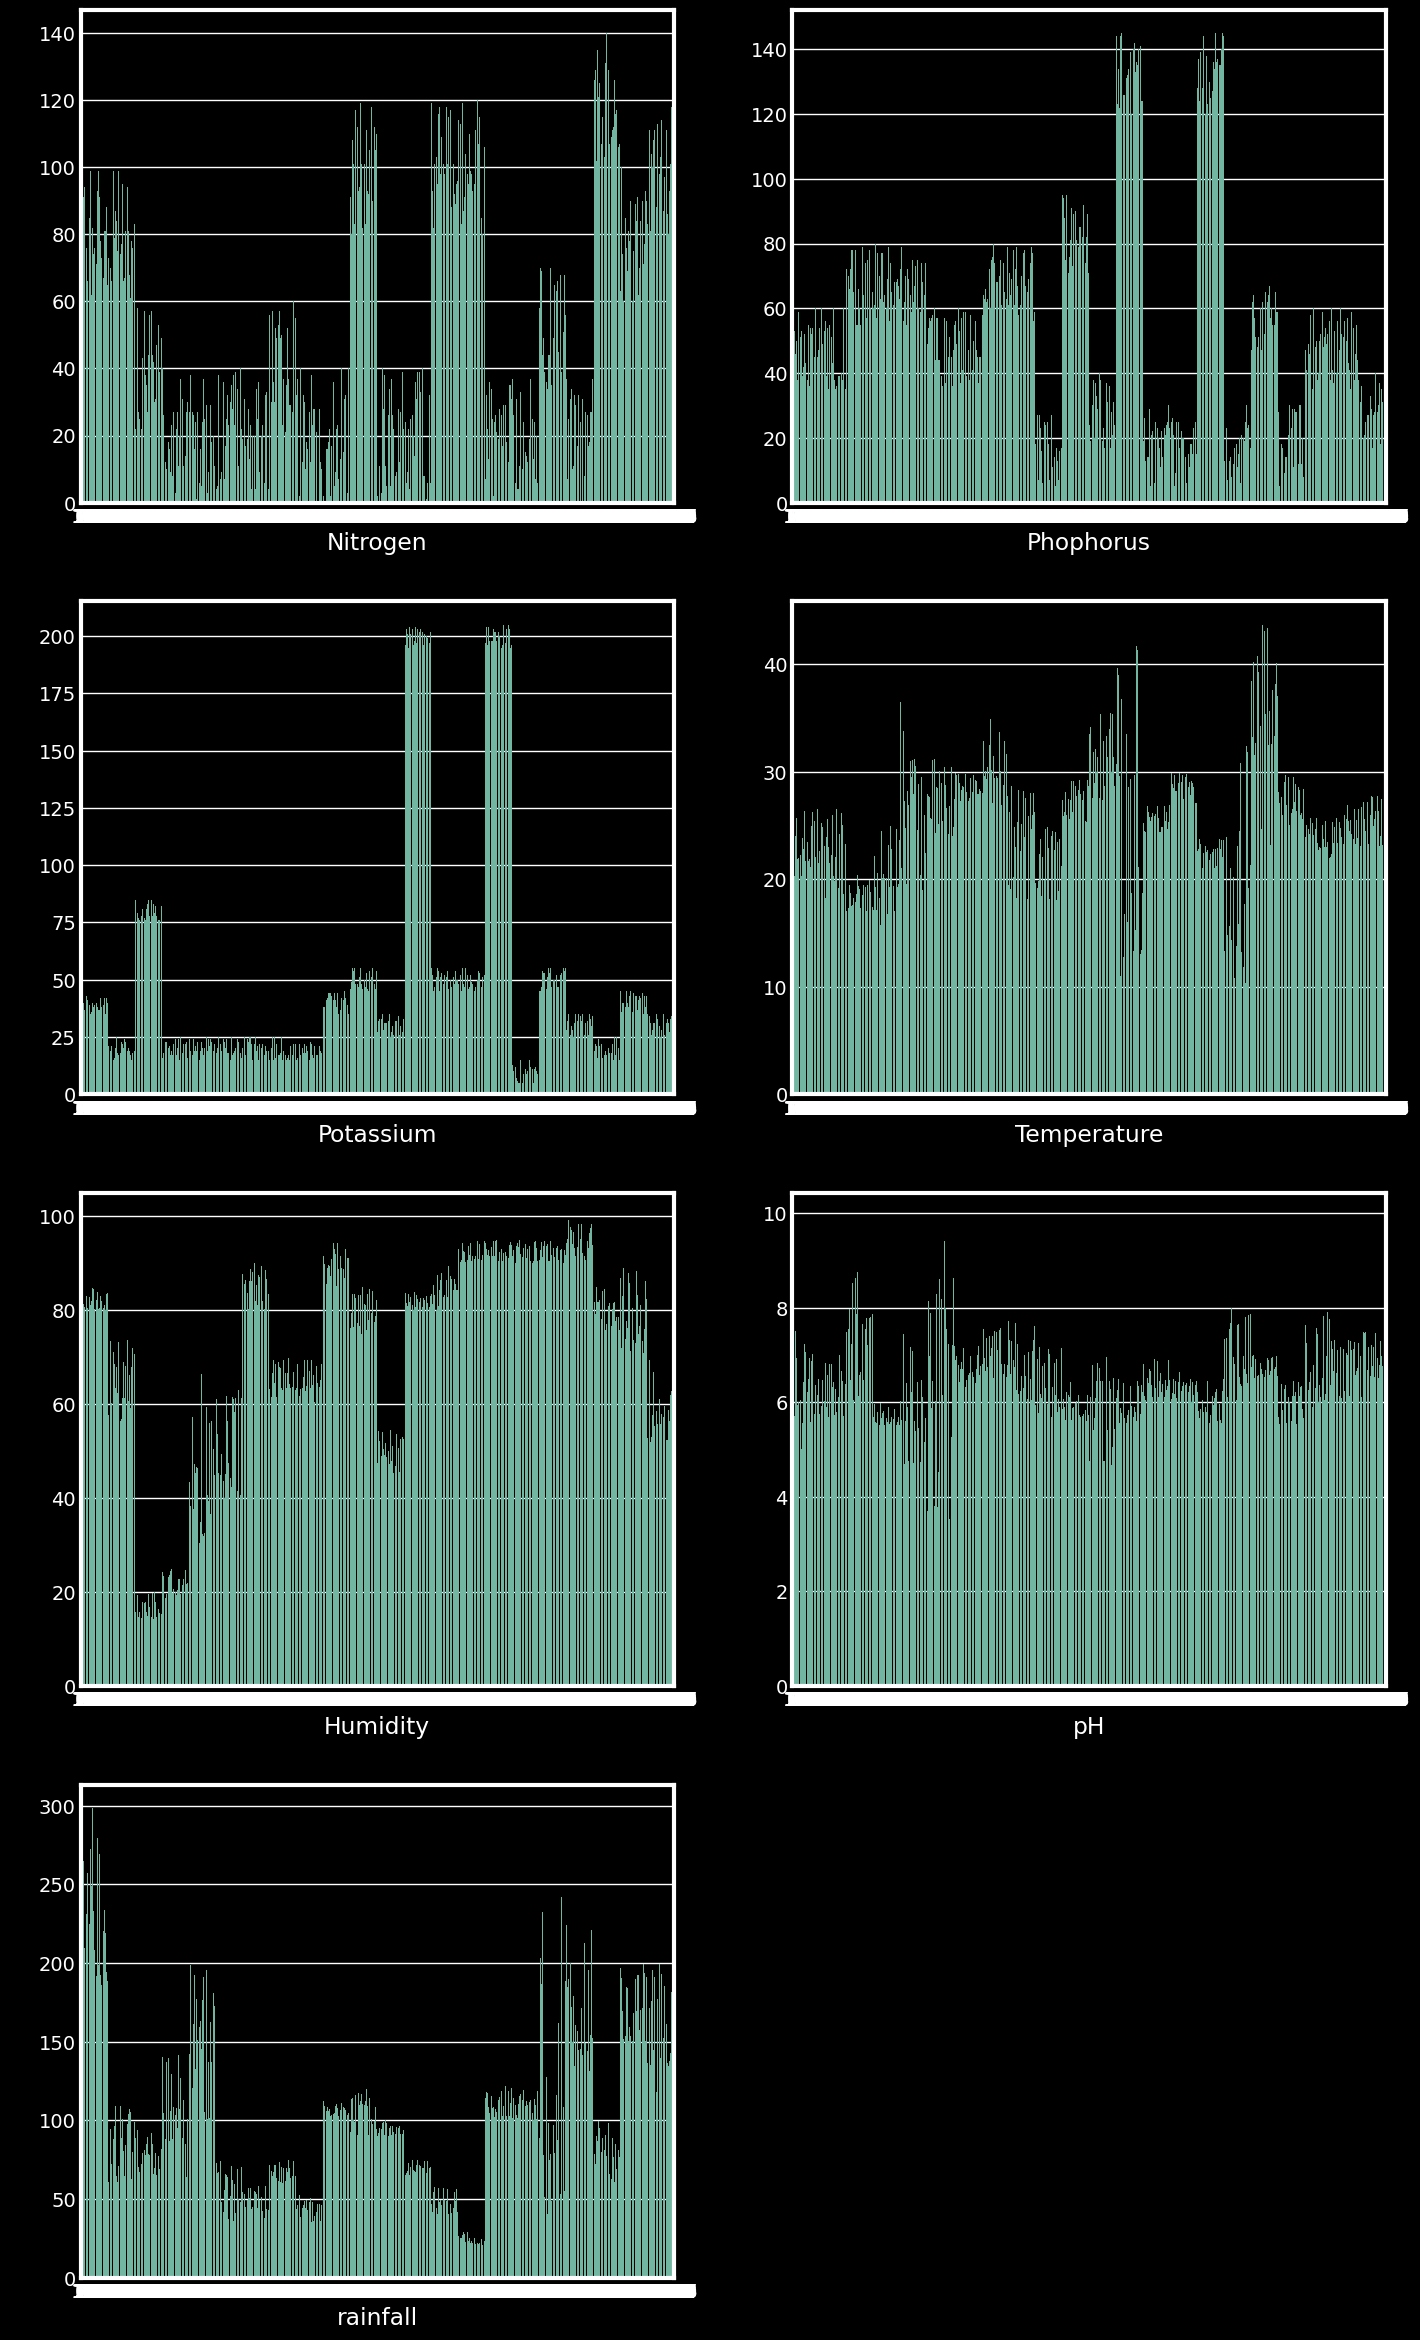

In [201]:
plt.figure(figsize=(15, 28))
plt.subplot(4,2,1)
sns.barplot(data['N'])#, data['label'])
plt.ylabel(' ')
plt.xlabel('Nitrogen')
plt.subplot(4,2,2)
sns.barplot(data['P'])#, data['label'])
plt.ylabel(' ')
plt.xlabel('Phophorus')
plt.subplot(4,2,3)
sns.barplot(data['K'])#, data['label'])
plt.ylabel(' ')
plt.xlabel('Potassium')
plt.subplot(4,2,4)
sns.barplot(data['temperature'])#, data['label'])
plt.ylabel(' ')
plt.xlabel('Temperature')
plt.subplot(4,2,5)
sns.barplot(data['humidity'])#, data['label'])
plt.ylabel(' ')
plt.xlabel('Humidity')
plt.subplot(4,2,6)
sns.barplot(data['ph'])#, data['label'])
plt.ylabel(' ')
plt.xlabel('pH')
plt.subplot(4,2,7)
sns.barplot(data['rainfall'])#, data['label'])
plt.ylabel(' ')
plt.xlabel('rainfall')
#apply for loop

### Predictive Modelling

In [202]:
# lets split the Dataset for Predictive Modelling

y = data['label']
x = data.drop(['label'], axis = 1)

print("Shape of x:", x.shape)
print("Shape of y:", y.shape)

Shape of x: (2200, 7)
Shape of y: (2200,)


In [203]:
# lets create Training and Testing Sets for Validation of Results
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

print("The Shape of x train:", x_train.shape)
print("The Shape of x test:", x_test.shape)
print("The Shape of y train:", y_train.shape)
print("The Shape of y test:", y_test.shape)

The Shape of x train: (1760, 7)
The Shape of x test: (440, 7)
The Shape of y train: (1760,)
The Shape of y test: (440,)


In [204]:
# lets create a Predictive Model

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [205]:
predict = model.predict(x_test)

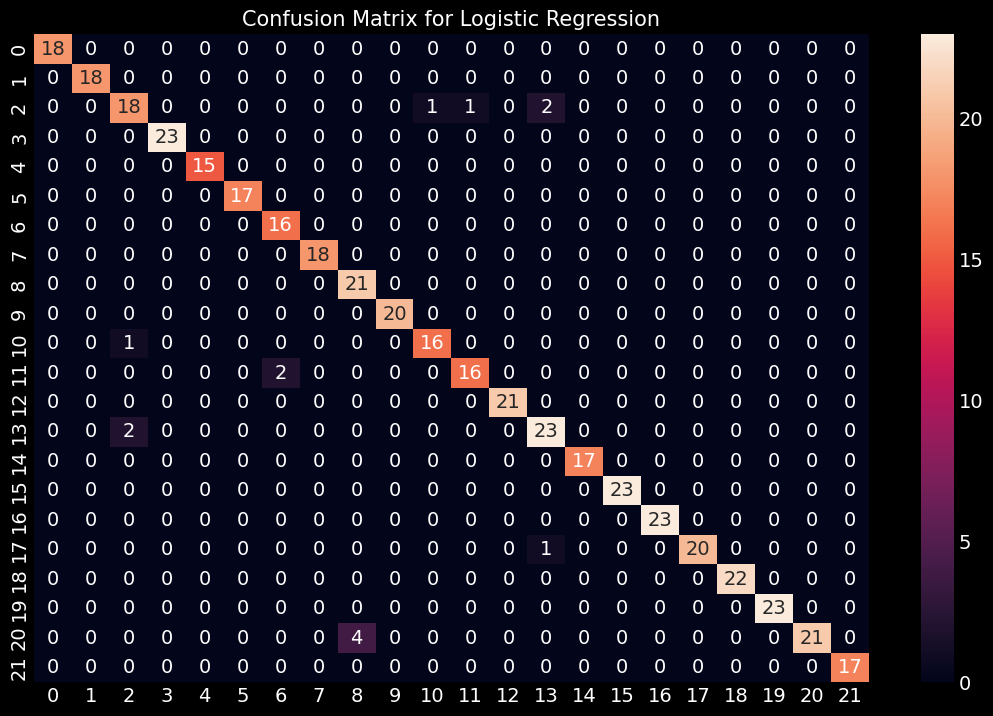

In [206]:
plt.figure(figsize=(12,8))
sns.heatmap(confusion_matrix(y_test,predict),annot=True)
plt.title('Confusion Matrix for Logistic Regression', fontsize = 15)
plt.show()

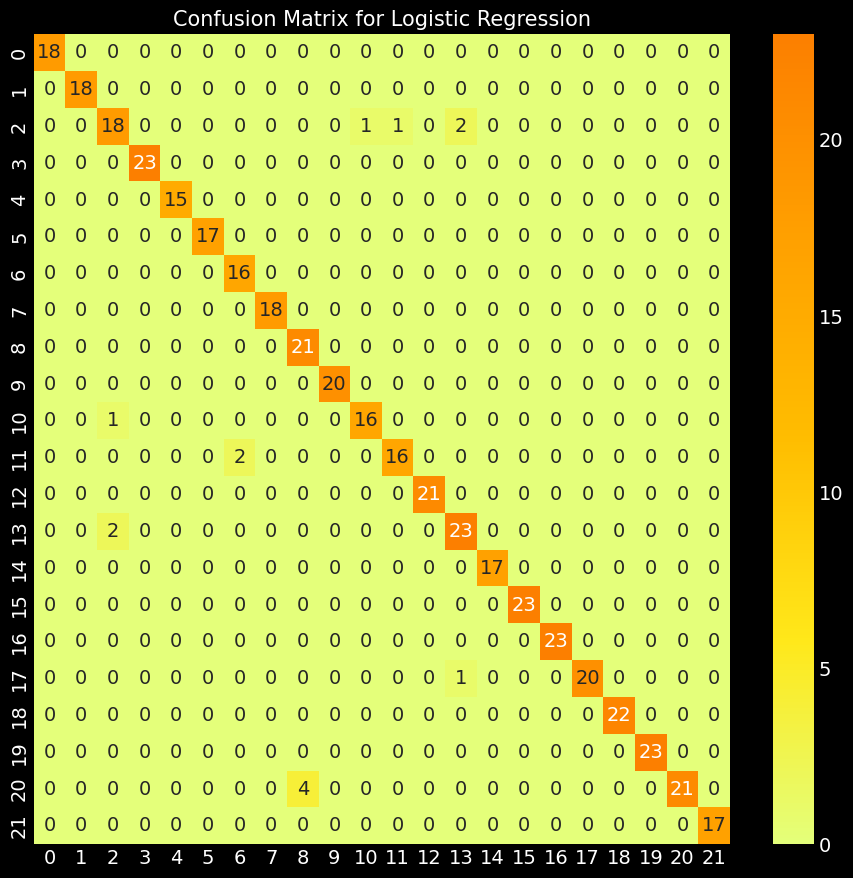

In [207]:
# lets evaluate the Model Performance
from sklearn.metrics import classification_report, confusion_matrix

# lets print the Confusion matrix first
plt.rcParams['figure.figsize'] = (10, 10)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, cmap = 'Wistia')
plt.title('Confusion Matrix for Logistic Regression', fontsize = 15)
plt.show()


In [208]:
# lets print the Classification Report also
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      1.00      1.00        18
   blackgram       0.86      0.82      0.84        22
    chickpea       1.00      1.00      1.00        23
     coconut       1.00      1.00      1.00        15
      coffee       1.00      1.00      1.00        17
      cotton       0.89      1.00      0.94        16
      grapes       1.00      1.00      1.00        18
        jute       0.84      1.00      0.91        21
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.94      0.94      0.94        17
       maize       0.94      0.89      0.91        18
       mango       1.00      1.00      1.00        21
   mothbeans       0.88      0.92      0.90        25
    mungbean       1.00      1.00      1.00        17
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        23
      papaya       1.00    

### Real time Predictions

In [209]:
# lets chech the Head of the Dataset
data.head()

N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice

In [210]:
prediction = model.predict((np.array([[90,
                                       40,
                                       40,
                                       20,
                                       80,
                                       7,
                                       200]])))
print("The Suggested Crop for Given Climatic Condition is :", prediction)

The Suggested Crop for Given Climatic Condition is : ['rice']


In [211]:
# lets check the Model for Oranges also
data[data['label'] == 'orange'].head()

N   P   K  temperature   humidity        ph    rainfall   label
1600  22  30  12    15.781442  92.510777  6.354007  119.035002  orange
1601  37   6  13    26.030973  91.508193  7.511755  101.284774  orange
1602  27  13   6    13.360506  91.356082  7.335158  111.226688  orange
1603   7  16   9    18.879577  92.043045  7.813917  114.665951  orange
1604  20   7   9    29.477417  91.578029  7.129137  111.172750  orange

In [212]:
# lets do some Real time Predictions
prediction = model.predict((np.array([[20,
                                       30,
                                       10,
                                       15,
                                       90,
                                       7.5,
                                       100]])))
print("The Suggested Crop for Given Climatic Condition is :", prediction)

The Suggested Crop for Given Climatic Condition is : ['orange']
